Download the latest data from the numerai website

In [1]:
import numerox as nx

nx.data.TRAIN_FILE = 'numerai_training_data.csv'
nx.data.TOURNAMENT_FILE = 'numerai_tournament_data.csv' 
 
data = nx.download('nr.zip')

nr.zip: 154MB [00:08, 18.1MB/s]                                                                                                                      


This has downloaded the data into this variable called data

In [15]:
data

region    train, validation, test, live
rows      836704
era       181, [era1, eraX]
x         50, min 0.0000, mean 0.5026, max 1.0000
y         mean 0.499616, fraction missing 0.3321

Import the libs that we need for this 

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from pipe import *
from scipy import stats
from matplotlib import pyplot
from sklearn.metrics import log_loss

* Transform the eras into ints i.e. 'era12' -> 12 for each samople in the train region
* compute 1-hot encoding for each sample in the training region which we can predict from a model

In [17]:
eras = list( data.era[data.region=='train'] ) | select( lambda e: int( e.replace('era','') ) ) | as_list

eras_y = to_categorical(eras)

Plotting function to visualise the results from a keras model i.e. the training and validation accuracy

In [25]:
import matplotlib.pyplot as plt

def plot(history, val=True, train=True, title='Bernie', metric='loss'):
    if train:
        plt.plot(history.history[metric][2:])
    if val:
        plt.plot(history.history['val_%s' % (metric) ][2:])
        
    plt.title('model %s on %s!' %(metric, title))
    plt.ylabel(metric)
    plt.xlabel('epoch')
    
    labels = []
    if train: 
        labels.append('train')
    if val: 
        labels.append('validation')
        
    plt.legend(labels, loc='upper left')
    plt.show()

Let's build a very simple model to predict which era is being used for each sample

In [26]:
%%time

from keras.callbacks import EarlyStopping

Xtrain, Xtest, Ytrain, Ytest = train_test_split( data.x[ data.region=='train' ], eras_y, test_size=0.5 )

model_dense = Sequential([
    Dense(32, input_shape=(50,)),
    Activation('relu'),
    Dropout(0.3),
    Dense(100),
    Activation('relu'),
    Dense(100),
    Activation('relu'),
    Dropout(0.3),
    Dense(100),
    Dropout(0.3),
    Activation('relu'),
    Dense(100),
    Activation('relu'),
    Dense(100),
    Activation('relu'),
    Dropout(0.3),
    Dense(121),
    Activation('softmax'),
])

model_dense.summary()

model_dense.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_crossentropy','acc'])

callbacks = [EarlyStopping(monitor='val_loss', 
              min_delta=0, 
              patience=100, 
              verbose=0, 
              mode='auto', 
              baseline=None, 
              restore_best_weights=True)]

history = model_dense.fit(Xtrain, 
                    Ytrain, 
                    validation_data=(Xtest,Ytest), 
                    epochs=3000, 
                    callbacks=callbacks,
                    batch_size=10000, 
                    shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1632      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               3300      
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
__________

251366/251366 [==============================] - ETA: 0s - loss: 4.7735 - categorical_crossentropy: 4.7735 - acc: 0.01 - ETA: 0s - loss: 4.7733 - categorical_crossentropy: 4.7733 - acc: 0.01 - ETA: 0s - loss: 4.7744 - categorical_crossentropy: 4.7744 - acc: 0.00 - ETA: 0s - loss: 4.7743 - categorical_crossentropy: 4.7743 - acc: 0.01 - ETA: 0s - loss: 4.7743 - categorical_crossentropy: 4.7743 - acc: 0.01 - ETA: 0s - loss: 4.7744 - categorical_crossentropy: 4.7744 - acc: 0.01 - ETA: 0s - loss: 4.7743 - categorical_crossentropy: 4.7743 - acc: 0.01 - ETA: 0s - loss: 4.7741 - categorical_crossentropy: 4.7741 - acc: 0.01 - ETA: 0s - loss: 4.7741 - categorical_crossentropy: 4.7741 - acc: 0.01 - 1s 3us/step - loss: 4.7741 - categorical_crossentropy: 4.7741 - acc: 0.0104 - val_loss: 4.7719 - val_categorical_crossentropy: 4.7719 - val_acc: 0.0106
Epoch 17/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7705 - categorical_crossentropy: 4.7705 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7685 - categorical_crossentropy: 4.7685 - acc: 0.01 - ETA: 0s - loss: 4.7687 - categorical_crossentropy: 4.7687 - acc: 0.01 - ETA: 0s - loss: 4.7674 - categorical_crossentropy: 4.7674 - acc: 0.01 - ETA: 0s - loss: 4.7679 - categorical_crossentropy: 4.7679 - acc: 0.01 - ETA: 0s - loss: 4.7677 - categorical_crossentropy: 4.7677 - acc: 0.01 - ETA: 0s - loss: 4.7673 - categorical_crossentropy: 4.7673 - acc: 0.01 - ETA: 0s - loss: 4.7671 - categorical_crossentropy: 4.7671 - acc: 0.01 - ETA: 0s - loss: 4.7670 - categorical_crossentropy: 4.7670 - acc: 0.01 - ETA: 0s - loss: 4.7669 - categorical_crossentropy: 4.7669 - acc: 0.01 - 1s 3us/step - loss: 4.7669 - categorical_crossentropy: 4.7669 - acc: 0.0109 - val_loss: 4.7668 - val_categorical_crossentropy: 4.7668 - val_acc: 0.0106
Epoch 35/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7675 - categorical_crossentropy: 4.7675 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7611 - categorical_crossentropy: 4.7611 - acc: 0.01 - ETA: 0s - loss: 4.7621 - categorical_crossentropy: 4.7621 - acc: 0.01 - ETA: 0s - loss: 4.7633 - categorical_crossentropy: 4.7633 - acc: 0.01 - ETA: 0s - loss: 4.7626 - categorical_crossentropy: 4.7626 - acc: 0.01 - ETA: 0s - loss: 4.7629 - categorical_crossentropy: 4.7629 - acc: 0.01 - ETA: 0s - loss: 4.7626 - categorical_crossentropy: 4.7626 - acc: 0.01 - ETA: 0s - loss: 4.7627 - categorical_crossentropy: 4.7627 - acc: 0.01 - ETA: 0s - loss: 4.7625 - categorical_crossentropy: 4.7625 - acc: 0.01 - ETA: 0s - loss: 4.7624 - categorical_crossentropy: 4.7624 - acc: 0.01 - 1s 3us/step - loss: 4.7625 - categorical_crossentropy: 4.7625 - acc: 0.0115 - val_loss: 4.7627 - val_categorical_crossentropy: 4.7627 - val_acc: 0.0113
Epoch 53/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7596 - categorical_crossentropy: 4.7596 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7569 - categorical_crossentropy: 4.7569 - acc: 0.01 - ETA: 0s - loss: 4.7573 - categorical_crossentropy: 4.7573 - acc: 0.01 - ETA: 0s - loss: 4.7564 - categorical_crossentropy: 4.7564 - acc: 0.01 - ETA: 0s - loss: 4.7564 - categorical_crossentropy: 4.7564 - acc: 0.01 - ETA: 0s - loss: 4.7565 - categorical_crossentropy: 4.7565 - acc: 0.01 - ETA: 0s - loss: 4.7569 - categorical_crossentropy: 4.7569 - acc: 0.01 - ETA: 0s - loss: 4.7572 - categorical_crossentropy: 4.7572 - acc: 0.01 - ETA: 0s - loss: 4.7574 - categorical_crossentropy: 4.7574 - acc: 0.01 - ETA: 0s - loss: 4.7573 - categorical_crossentropy: 4.7573 - acc: 0.01 - 1s 3us/step - loss: 4.7573 - categorical_crossentropy: 4.7573 - acc: 0.0123 - val_loss: 4.7576 - val_categorical_crossentropy: 4.7576 - val_acc: 0.0126
Epoch 71/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7600 - categorical_crossentropy: 4.7600 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7506 - categorical_crossentropy: 4.7506 - acc: 0.01 - ETA: 0s - loss: 4.7520 - categorical_crossentropy: 4.7520 - acc: 0.01 - ETA: 0s - loss: 4.7516 - categorical_crossentropy: 4.7516 - acc: 0.01 - ETA: 0s - loss: 4.7521 - categorical_crossentropy: 4.7521 - acc: 0.01 - ETA: 0s - loss: 4.7526 - categorical_crossentropy: 4.7526 - acc: 0.01 - ETA: 0s - loss: 4.7523 - categorical_crossentropy: 4.7523 - acc: 0.01 - ETA: 0s - loss: 4.7530 - categorical_crossentropy: 4.7530 - acc: 0.01 - ETA: 0s - loss: 4.7533 - categorical_crossentropy: 4.7533 - acc: 0.01 - ETA: 0s - loss: 4.7536 - categorical_crossentropy: 4.7536 - acc: 0.01 - 1s 3us/step - loss: 4.7536 - categorical_crossentropy: 4.7536 - acc: 0.0127 - val_loss: 4.7556 - val_categorical_crossentropy: 4.7556 - val_acc: 0.0130
Epoch 89/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7527 - categorical_crossentropy: 4.7527 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7525 - categorical_crossentropy: 4.7525 - acc: 0.01 - ETA: 0s - loss: 4.7513 - categorical_crossentropy: 4.7513 - acc: 0.01 - ETA: 0s - loss: 4.7515 - categorical_crossentropy: 4.7515 - acc: 0.01 - ETA: 0s - loss: 4.7517 - categorical_crossentropy: 4.7517 - acc: 0.01 - ETA: 0s - loss: 4.7509 - categorical_crossentropy: 4.7509 - acc: 0.01 - ETA: 0s - loss: 4.7507 - categorical_crossentropy: 4.7507 - acc: 0.01 - ETA: 0s - loss: 4.7506 - categorical_crossentropy: 4.7506 - acc: 0.01 - ETA: 0s - loss: 4.7508 - categorical_crossentropy: 4.7508 - acc: 0.01 - ETA: 0s - loss: 4.7513 - categorical_crossentropy: 4.7513 - acc: 0.01 - 1s 3us/step - loss: 4.7513 - categorical_crossentropy: 4.7513 - acc: 0.0128 - val_loss: 4.7550 - val_categorical_crossentropy: 4.7550 - val_acc: 0.0133
Epoch 107/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7532 - categorical_crossentropy: 4.7532 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7486 - categorical_crossentropy: 4.7486 - acc: 0.01 - ETA: 0s - loss: 4.7497 - categorical_crossentropy: 4.7497 - acc: 0.01 - ETA: 0s - loss: 4.7493 - categorical_crossentropy: 4.7493 - acc: 0.01 - ETA: 0s - loss: 4.7494 - categorical_crossentropy: 4.7494 - acc: 0.01 - ETA: 0s - loss: 4.7499 - categorical_crossentropy: 4.7499 - acc: 0.01 - ETA: 0s - loss: 4.7493 - categorical_crossentropy: 4.7493 - acc: 0.01 - ETA: 0s - loss: 4.7488 - categorical_crossentropy: 4.7488 - acc: 0.01 - ETA: 0s - loss: 4.7489 - categorical_crossentropy: 4.7489 - acc: 0.01 - ETA: 0s - loss: 4.7490 - categorical_crossentropy: 4.7490 - acc: 0.01 - 1s 3us/step - loss: 4.7490 - categorical_crossentropy: 4.7490 - acc: 0.0134 - val_loss: 4.7531 - val_categorical_crossentropy: 4.7531 - val_acc: 0.0133
Epoch 125/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7491 - categorical_crossentropy: 4.7491 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7476 - categorical_crossentropy: 4.7476 - acc: 0.01 - ETA: 0s - loss: 4.7448 - categorical_crossentropy: 4.7448 - acc: 0.01 - ETA: 0s - loss: 4.7445 - categorical_crossentropy: 4.7445 - acc: 0.01 - ETA: 0s - loss: 4.7445 - categorical_crossentropy: 4.7445 - acc: 0.01 - ETA: 0s - loss: 4.7447 - categorical_crossentropy: 4.7447 - acc: 0.01 - ETA: 0s - loss: 4.7448 - categorical_crossentropy: 4.7448 - acc: 0.01 - ETA: 0s - loss: 4.7449 - categorical_crossentropy: 4.7449 - acc: 0.01 - ETA: 0s - loss: 4.7451 - categorical_crossentropy: 4.7451 - acc: 0.01 - ETA: 0s - loss: 4.7451 - categorical_crossentropy: 4.7451 - acc: 0.01 - 1s 3us/step - loss: 4.7452 - categorical_crossentropy: 4.7452 - acc: 0.0138 - val_loss: 4.7489 - val_categorical_crossentropy: 4.7489 - val_acc: 0.0134
Epoch 143/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7401 - categorical_crossentropy: 4.7401 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7428 - categorical_crossentropy: 4.7428 - acc: 0.01 - ETA: 0s - loss: 4.7432 - categorical_crossentropy: 4.7432 - acc: 0.01 - ETA: 0s - loss: 4.7424 - categorical_crossentropy: 4.7424 - acc: 0.01 - ETA: 0s - loss: 4.7426 - categorical_crossentropy: 4.7426 - acc: 0.01 - ETA: 0s - loss: 4.7430 - categorical_crossentropy: 4.7430 - acc: 0.01 - ETA: 0s - loss: 4.7434 - categorical_crossentropy: 4.7434 - acc: 0.01 - ETA: 0s - loss: 4.7433 - categorical_crossentropy: 4.7433 - acc: 0.01 - ETA: 0s - loss: 4.7436 - categorical_crossentropy: 4.7436 - acc: 0.01 - ETA: 0s - loss: 4.7437 - categorical_crossentropy: 4.7437 - acc: 0.01 - 1s 3us/step - loss: 4.7437 - categorical_crossentropy: 4.7437 - acc: 0.0136 - val_loss: 4.7489 - val_categorical_crossentropy: 4.7489 - val_acc: 0.0132
Epoch 161/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7445 - categorical_crossentropy: 4.7445 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7442 - categorical_crossentropy: 4.7442 - acc: 0.01 - ETA: 0s - loss: 4.7423 - categorical_crossentropy: 4.7423 - acc: 0.01 - ETA: 0s - loss: 4.7415 - categorical_crossentropy: 4.7415 - acc: 0.01 - ETA: 0s - loss: 4.7415 - categorical_crossentropy: 4.7415 - acc: 0.01 - ETA: 0s - loss: 4.7416 - categorical_crossentropy: 4.7416 - acc: 0.01 - ETA: 0s - loss: 4.7413 - categorical_crossentropy: 4.7413 - acc: 0.01 - ETA: 0s - loss: 4.7416 - categorical_crossentropy: 4.7416 - acc: 0.01 - ETA: 0s - loss: 4.7417 - categorical_crossentropy: 4.7417 - acc: 0.01 - ETA: 0s - loss: 4.7413 - categorical_crossentropy: 4.7413 - acc: 0.01 - 1s 3us/step - loss: 4.7412 - categorical_crossentropy: 4.7412 - acc: 0.0140 - val_loss: 4.7451 - val_categorical_crossentropy: 4.7451 - val_acc: 0.0133
Epoch 179/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7376 - categorical_crossentropy: 4.7376 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7407 - categorical_crossentropy: 4.7407 - acc: 0.01 - ETA: 0s - loss: 4.7404 - categorical_crossentropy: 4.7404 - acc: 0.01 - ETA: 0s - loss: 4.7406 - categorical_crossentropy: 4.7406 - acc: 0.01 - ETA: 0s - loss: 4.7406 - categorical_crossentropy: 4.7406 - acc: 0.01 - ETA: 0s - loss: 4.7403 - categorical_crossentropy: 4.7403 - acc: 0.01 - ETA: 0s - loss: 4.7398 - categorical_crossentropy: 4.7398 - acc: 0.01 - ETA: 0s - loss: 4.7399 - categorical_crossentropy: 4.7399 - acc: 0.01 - ETA: 0s - loss: 4.7402 - categorical_crossentropy: 4.7402 - acc: 0.01 - ETA: 0s - loss: 4.7399 - categorical_crossentropy: 4.7399 - acc: 0.01 - 1s 3us/step - loss: 4.7399 - categorical_crossentropy: 4.7399 - acc: 0.0143 - val_loss: 4.7433 - val_categorical_crossentropy: 4.7433 - val_acc: 0.0136
Epoch 197/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7452 - categorical_crossentropy: 4.7452 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7388 - categorical_crossentropy: 4.7388 - acc: 0.01 - ETA: 0s - loss: 4.7363 - categorical_crossentropy: 4.7363 - acc: 0.01 - ETA: 0s - loss: 4.7375 - categorical_crossentropy: 4.7375 - acc: 0.01 - ETA: 0s - loss: 4.7389 - categorical_crossentropy: 4.7389 - acc: 0.01 - ETA: 0s - loss: 4.7386 - categorical_crossentropy: 4.7386 - acc: 0.01 - ETA: 0s - loss: 4.7385 - categorical_crossentropy: 4.7385 - acc: 0.01 - ETA: 0s - loss: 4.7383 - categorical_crossentropy: 4.7383 - acc: 0.01 - ETA: 0s - loss: 4.7385 - categorical_crossentropy: 4.7385 - acc: 0.01 - ETA: 0s - loss: 4.7384 - categorical_crossentropy: 4.7384 - acc: 0.01 - 1s 3us/step - loss: 4.7384 - categorical_crossentropy: 4.7384 - acc: 0.0143 - val_loss: 4.7430 - val_categorical_crossentropy: 4.7430 - val_acc: 0.0134
Epoch 215/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7412 - categorical_crossentropy: 4.7412 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7348 - categorical_crossentropy: 4.7348 - acc: 0.01 - ETA: 0s - loss: 4.7348 - categorical_crossentropy: 4.7348 - acc: 0.01 - ETA: 0s - loss: 4.7353 - categorical_crossentropy: 4.7353 - acc: 0.01 - ETA: 0s - loss: 4.7355 - categorical_crossentropy: 4.7355 - acc: 0.01 - ETA: 0s - loss: 4.7358 - categorical_crossentropy: 4.7358 - acc: 0.01 - ETA: 0s - loss: 4.7360 - categorical_crossentropy: 4.7360 - acc: 0.01 - ETA: 0s - loss: 4.7364 - categorical_crossentropy: 4.7364 - acc: 0.01 - ETA: 0s - loss: 4.7363 - categorical_crossentropy: 4.7363 - acc: 0.01 - ETA: 0s - loss: 4.7360 - categorical_crossentropy: 4.7360 - acc: 0.01 - 1s 3us/step - loss: 4.7361 - categorical_crossentropy: 4.7361 - acc: 0.0143 - val_loss: 4.7434 - val_categorical_crossentropy: 4.7434 - val_acc: 0.0135
Epoch 233/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7330 - categorical_crossentropy: 4.7330 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7375 - categorical_crossentropy: 4.7375 - acc: 0.01 - ETA: 0s - loss: 4.7338 - categorical_crossentropy: 4.7338 - acc: 0.01 - ETA: 0s - loss: 4.7345 - categorical_crossentropy: 4.7345 - acc: 0.01 - ETA: 0s - loss: 4.7356 - categorical_crossentropy: 4.7356 - acc: 0.01 - ETA: 0s - loss: 4.7359 - categorical_crossentropy: 4.7359 - acc: 0.01 - ETA: 0s - loss: 4.7362 - categorical_crossentropy: 4.7362 - acc: 0.01 - ETA: 0s - loss: 4.7359 - categorical_crossentropy: 4.7359 - acc: 0.01 - ETA: 0s - loss: 4.7355 - categorical_crossentropy: 4.7355 - acc: 0.01 - ETA: 0s - loss: 4.7356 - categorical_crossentropy: 4.7356 - acc: 0.01 - 1s 3us/step - loss: 4.7356 - categorical_crossentropy: 4.7356 - acc: 0.0146 - val_loss: 4.7401 - val_categorical_crossentropy: 4.7401 - val_acc: 0.0139
Epoch 251/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7347 - categorical_crossentropy: 4.7347 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7320 - categorical_crossentropy: 4.7320 - acc: 0.01 - ETA: 0s - loss: 4.7338 - categorical_crossentropy: 4.7338 - acc: 0.01 - ETA: 0s - loss: 4.7340 - categorical_crossentropy: 4.7340 - acc: 0.01 - ETA: 0s - loss: 4.7333 - categorical_crossentropy: 4.7333 - acc: 0.01 - ETA: 0s - loss: 4.7335 - categorical_crossentropy: 4.7335 - acc: 0.01 - ETA: 0s - loss: 4.7342 - categorical_crossentropy: 4.7342 - acc: 0.01 - ETA: 0s - loss: 4.7339 - categorical_crossentropy: 4.7339 - acc: 0.01 - ETA: 0s - loss: 4.7340 - categorical_crossentropy: 4.7340 - acc: 0.01 - ETA: 0s - loss: 4.7336 - categorical_crossentropy: 4.7336 - acc: 0.01 - 1s 3us/step - loss: 4.7336 - categorical_crossentropy: 4.7336 - acc: 0.0146 - val_loss: 4.7416 - val_categorical_crossentropy: 4.7416 - val_acc: 0.0136
Epoch 269/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7281 - categorical_crossentropy: 4.7281 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7331 - categorical_crossentropy: 4.7331 - acc: 0.01 - ETA: 0s - loss: 4.7312 - categorical_crossentropy: 4.7312 - acc: 0.01 - ETA: 0s - loss: 4.7320 - categorical_crossentropy: 4.7320 - acc: 0.01 - ETA: 0s - loss: 4.7321 - categorical_crossentropy: 4.7321 - acc: 0.01 - ETA: 0s - loss: 4.7321 - categorical_crossentropy: 4.7321 - acc: 0.01 - ETA: 0s - loss: 4.7322 - categorical_crossentropy: 4.7322 - acc: 0.01 - ETA: 0s - loss: 4.7319 - categorical_crossentropy: 4.7319 - acc: 0.01 - ETA: 0s - loss: 4.7322 - categorical_crossentropy: 4.7322 - acc: 0.01 - ETA: 0s - loss: 4.7320 - categorical_crossentropy: 4.7320 - acc: 0.01 - 1s 3us/step - loss: 4.7321 - categorical_crossentropy: 4.7321 - acc: 0.0148 - val_loss: 4.7387 - val_categorical_crossentropy: 4.7387 - val_acc: 0.0139
Epoch 287/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7338 - categorical_crossentropy: 4.7338 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7368 - categorical_crossentropy: 4.7368 - acc: 0.01 - ETA: 0s - loss: 4.7331 - categorical_crossentropy: 4.7331 - acc: 0.01 - ETA: 0s - loss: 4.7315 - categorical_crossentropy: 4.7315 - acc: 0.01 - ETA: 0s - loss: 4.7315 - categorical_crossentropy: 4.7315 - acc: 0.01 - ETA: 0s - loss: 4.7318 - categorical_crossentropy: 4.7318 - acc: 0.01 - ETA: 0s - loss: 4.7314 - categorical_crossentropy: 4.7314 - acc: 0.01 - ETA: 0s - loss: 4.7310 - categorical_crossentropy: 4.7310 - acc: 0.01 - ETA: 0s - loss: 4.7310 - categorical_crossentropy: 4.7310 - acc: 0.01 - ETA: 0s - loss: 4.7308 - categorical_crossentropy: 4.7308 - acc: 0.01 - 1s 3us/step - loss: 4.7308 - categorical_crossentropy: 4.7308 - acc: 0.0152 - val_loss: 4.7363 - val_categorical_crossentropy: 4.7363 - val_acc: 0.0142
Epoch 305/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7326 - categorical_crossentropy: 4.7326 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7306 - categorical_crossentropy: 4.7306 - acc: 0.01 - ETA: 0s - loss: 4.7295 - categorical_crossentropy: 4.7295 - acc: 0.01 - ETA: 0s - loss: 4.7304 - categorical_crossentropy: 4.7304 - acc: 0.01 - ETA: 0s - loss: 4.7311 - categorical_crossentropy: 4.7311 - acc: 0.01 - ETA: 0s - loss: 4.7308 - categorical_crossentropy: 4.7308 - acc: 0.01 - ETA: 0s - loss: 4.7304 - categorical_crossentropy: 4.7304 - acc: 0.01 - ETA: 0s - loss: 4.7303 - categorical_crossentropy: 4.7303 - acc: 0.01 - ETA: 0s - loss: 4.7300 - categorical_crossentropy: 4.7300 - acc: 0.01 - ETA: 0s - loss: 4.7297 - categorical_crossentropy: 4.7297 - acc: 0.01 - 1s 3us/step - loss: 4.7296 - categorical_crossentropy: 4.7296 - acc: 0.0156 - val_loss: 4.7375 - val_categorical_crossentropy: 4.7375 - val_acc: 0.0141
Epoch 323/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7281 - categorical_crossentropy: 4.7281 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7224 - categorical_crossentropy: 4.7224 - acc: 0.01 - ETA: 0s - loss: 4.7305 - categorical_crossentropy: 4.7305 - acc: 0.01 - ETA: 0s - loss: 4.7294 - categorical_crossentropy: 4.7294 - acc: 0.01 - ETA: 0s - loss: 4.7287 - categorical_crossentropy: 4.7287 - acc: 0.01 - ETA: 0s - loss: 4.7282 - categorical_crossentropy: 4.7282 - acc: 0.01 - ETA: 0s - loss: 4.7283 - categorical_crossentropy: 4.7283 - acc: 0.01 - ETA: 0s - loss: 4.7284 - categorical_crossentropy: 4.7284 - acc: 0.01 - ETA: 0s - loss: 4.7286 - categorical_crossentropy: 4.7286 - acc: 0.01 - ETA: 0s - loss: 4.7287 - categorical_crossentropy: 4.7287 - acc: 0.01 - 1s 3us/step - loss: 4.7287 - categorical_crossentropy: 4.7287 - acc: 0.0152 - val_loss: 4.7367 - val_categorical_crossentropy: 4.7367 - val_acc: 0.0142
Epoch 341/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7301 - categorical_crossentropy: 4.7301 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7330 - categorical_crossentropy: 4.7330 - acc: 0.01 - ETA: 0s - loss: 4.7272 - categorical_crossentropy: 4.7272 - acc: 0.01 - ETA: 0s - loss: 4.7268 - categorical_crossentropy: 4.7268 - acc: 0.01 - ETA: 0s - loss: 4.7265 - categorical_crossentropy: 4.7265 - acc: 0.01 - ETA: 0s - loss: 4.7270 - categorical_crossentropy: 4.7270 - acc: 0.01 - ETA: 0s - loss: 4.7271 - categorical_crossentropy: 4.7271 - acc: 0.01 - ETA: 0s - loss: 4.7271 - categorical_crossentropy: 4.7271 - acc: 0.01 - ETA: 0s - loss: 4.7268 - categorical_crossentropy: 4.7268 - acc: 0.01 - ETA: 0s - loss: 4.7266 - categorical_crossentropy: 4.7266 - acc: 0.01 - 1s 3us/step - loss: 4.7266 - categorical_crossentropy: 4.7266 - acc: 0.0150 - val_loss: 4.7358 - val_categorical_crossentropy: 4.7358 - val_acc: 0.0142
Epoch 359/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7267 - categorical_crossentropy: 4.7267 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7223 - categorical_crossentropy: 4.7223 - acc: 0.01 - ETA: 0s - loss: 4.7252 - categorical_crossentropy: 4.7252 - acc: 0.01 - ETA: 0s - loss: 4.7261 - categorical_crossentropy: 4.7261 - acc: 0.01 - ETA: 0s - loss: 4.7255 - categorical_crossentropy: 4.7255 - acc: 0.01 - ETA: 0s - loss: 4.7255 - categorical_crossentropy: 4.7255 - acc: 0.01 - ETA: 0s - loss: 4.7248 - categorical_crossentropy: 4.7248 - acc: 0.01 - ETA: 0s - loss: 4.7251 - categorical_crossentropy: 4.7251 - acc: 0.01 - ETA: 0s - loss: 4.7247 - categorical_crossentropy: 4.7247 - acc: 0.01 - ETA: 0s - loss: 4.7249 - categorical_crossentropy: 4.7249 - acc: 0.01 - 1s 3us/step - loss: 4.7249 - categorical_crossentropy: 4.7249 - acc: 0.0158 - val_loss: 4.7383 - val_categorical_crossentropy: 4.7383 - val_acc: 0.0136
Epoch 377/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7244 - categorical_crossentropy: 4.7244 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7200 - categorical_crossentropy: 4.7200 - acc: 0.01 - ETA: 0s - loss: 4.7206 - categorical_crossentropy: 4.7206 - acc: 0.01 - ETA: 0s - loss: 4.7224 - categorical_crossentropy: 4.7224 - acc: 0.01 - ETA: 0s - loss: 4.7232 - categorical_crossentropy: 4.7232 - acc: 0.01 - ETA: 0s - loss: 4.7232 - categorical_crossentropy: 4.7232 - acc: 0.01 - ETA: 0s - loss: 4.7235 - categorical_crossentropy: 4.7235 - acc: 0.01 - ETA: 0s - loss: 4.7236 - categorical_crossentropy: 4.7236 - acc: 0.01 - ETA: 0s - loss: 4.7236 - categorical_crossentropy: 4.7236 - acc: 0.01 - ETA: 0s - loss: 4.7238 - categorical_crossentropy: 4.7238 - acc: 0.01 - 1s 3us/step - loss: 4.7238 - categorical_crossentropy: 4.7238 - acc: 0.0155 - val_loss: 4.7313 - val_categorical_crossentropy: 4.7313 - val_acc: 0.0149
Epoch 395/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7209 - categorical_crossentropy: 4.7209 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7204 - categorical_crossentropy: 4.7204 - acc: 0.01 - ETA: 0s - loss: 4.7233 - categorical_crossentropy: 4.7233 - acc: 0.01 - ETA: 0s - loss: 4.7220 - categorical_crossentropy: 4.7220 - acc: 0.01 - ETA: 0s - loss: 4.7217 - categorical_crossentropy: 4.7217 - acc: 0.01 - ETA: 0s - loss: 4.7216 - categorical_crossentropy: 4.7216 - acc: 0.01 - ETA: 0s - loss: 4.7216 - categorical_crossentropy: 4.7216 - acc: 0.01 - ETA: 0s - loss: 4.7223 - categorical_crossentropy: 4.7223 - acc: 0.01 - ETA: 0s - loss: 4.7216 - categorical_crossentropy: 4.7216 - acc: 0.01 - ETA: 0s - loss: 4.7219 - categorical_crossentropy: 4.7219 - acc: 0.01 - 1s 3us/step - loss: 4.7219 - categorical_crossentropy: 4.7219 - acc: 0.0152 - val_loss: 4.7325 - val_categorical_crossentropy: 4.7325 - val_acc: 0.0144
Epoch 413/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7149 - categorical_crossentropy: 4.7149 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7221 - categorical_crossentropy: 4.7221 - acc: 0.01 - ETA: 0s - loss: 4.7242 - categorical_crossentropy: 4.7242 - acc: 0.01 - ETA: 0s - loss: 4.7225 - categorical_crossentropy: 4.7225 - acc: 0.01 - ETA: 0s - loss: 4.7234 - categorical_crossentropy: 4.7234 - acc: 0.01 - ETA: 0s - loss: 4.7232 - categorical_crossentropy: 4.7232 - acc: 0.01 - ETA: 0s - loss: 4.7232 - categorical_crossentropy: 4.7232 - acc: 0.01 - ETA: 0s - loss: 4.7225 - categorical_crossentropy: 4.7225 - acc: 0.01 - ETA: 0s - loss: 4.7223 - categorical_crossentropy: 4.7223 - acc: 0.01 - ETA: 0s - loss: 4.7218 - categorical_crossentropy: 4.7218 - acc: 0.01 - 1s 3us/step - loss: 4.7217 - categorical_crossentropy: 4.7217 - acc: 0.0157 - val_loss: 4.7274 - val_categorical_crossentropy: 4.7274 - val_acc: 0.0149
Epoch 431/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7165 - categorical_crossentropy: 4.7165 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7223 - categorical_crossentropy: 4.7223 - acc: 0.01 - ETA: 0s - loss: 4.7216 - categorical_crossentropy: 4.7216 - acc: 0.01 - ETA: 0s - loss: 4.7224 - categorical_crossentropy: 4.7224 - acc: 0.01 - ETA: 0s - loss: 4.7230 - categorical_crossentropy: 4.7230 - acc: 0.01 - ETA: 0s - loss: 4.7222 - categorical_crossentropy: 4.7222 - acc: 0.01 - ETA: 0s - loss: 4.7223 - categorical_crossentropy: 4.7223 - acc: 0.01 - ETA: 0s - loss: 4.7215 - categorical_crossentropy: 4.7215 - acc: 0.01 - ETA: 0s - loss: 4.7209 - categorical_crossentropy: 4.7209 - acc: 0.01 - ETA: 0s - loss: 4.7210 - categorical_crossentropy: 4.7210 - acc: 0.01 - 1s 3us/step - loss: 4.7211 - categorical_crossentropy: 4.7211 - acc: 0.0155 - val_loss: 4.7294 - val_categorical_crossentropy: 4.7294 - val_acc: 0.0145
Epoch 449/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7083 - categorical_crossentropy: 4.7083 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7188 - categorical_crossentropy: 4.7188 - acc: 0.01 - ETA: 0s - loss: 4.7191 - categorical_crossentropy: 4.7191 - acc: 0.01 - ETA: 0s - loss: 4.7203 - categorical_crossentropy: 4.7203 - acc: 0.01 - ETA: 0s - loss: 4.7208 - categorical_crossentropy: 4.7208 - acc: 0.01 - ETA: 0s - loss: 4.7199 - categorical_crossentropy: 4.7199 - acc: 0.01 - ETA: 0s - loss: 4.7197 - categorical_crossentropy: 4.7197 - acc: 0.01 - ETA: 0s - loss: 4.7191 - categorical_crossentropy: 4.7191 - acc: 0.01 - ETA: 0s - loss: 4.7192 - categorical_crossentropy: 4.7192 - acc: 0.01 - ETA: 0s - loss: 4.7194 - categorical_crossentropy: 4.7194 - acc: 0.01 - 1s 3us/step - loss: 4.7194 - categorical_crossentropy: 4.7194 - acc: 0.0159 - val_loss: 4.7333 - val_categorical_crossentropy: 4.7333 - val_acc: 0.0143
Epoch 467/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7202 - categorical_crossentropy: 4.7202 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7177 - categorical_crossentropy: 4.7177 - acc: 0.01 - ETA: 0s - loss: 4.7170 - categorical_crossentropy: 4.7170 - acc: 0.01 - ETA: 0s - loss: 4.7154 - categorical_crossentropy: 4.7154 - acc: 0.01 - ETA: 0s - loss: 4.7151 - categorical_crossentropy: 4.7151 - acc: 0.01 - ETA: 0s - loss: 4.7161 - categorical_crossentropy: 4.7161 - acc: 0.01 - ETA: 0s - loss: 4.7164 - categorical_crossentropy: 4.7164 - acc: 0.01 - ETA: 0s - loss: 4.7166 - categorical_crossentropy: 4.7166 - acc: 0.01 - ETA: 0s - loss: 4.7168 - categorical_crossentropy: 4.7168 - acc: 0.01 - ETA: 0s - loss: 4.7175 - categorical_crossentropy: 4.7175 - acc: 0.01 - 1s 3us/step - loss: 4.7175 - categorical_crossentropy: 4.7175 - acc: 0.0158 - val_loss: 4.7281 - val_categorical_crossentropy: 4.7281 - val_acc: 0.0148
Epoch 485/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7189 - categorical_crossentropy: 4.7189 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7163 - categorical_crossentropy: 4.7163 - acc: 0.01 - ETA: 0s - loss: 4.7136 - categorical_crossentropy: 4.7136 - acc: 0.01 - ETA: 0s - loss: 4.7153 - categorical_crossentropy: 4.7153 - acc: 0.01 - ETA: 0s - loss: 4.7167 - categorical_crossentropy: 4.7167 - acc: 0.01 - ETA: 0s - loss: 4.7174 - categorical_crossentropy: 4.7174 - acc: 0.01 - ETA: 0s - loss: 4.7175 - categorical_crossentropy: 4.7175 - acc: 0.01 - ETA: 0s - loss: 4.7171 - categorical_crossentropy: 4.7171 - acc: 0.01 - ETA: 0s - loss: 4.7172 - categorical_crossentropy: 4.7172 - acc: 0.01 - ETA: 0s - loss: 4.7167 - categorical_crossentropy: 4.7167 - acc: 0.01 - 1s 3us/step - loss: 4.7167 - categorical_crossentropy: 4.7167 - acc: 0.0164 - val_loss: 4.7297 - val_categorical_crossentropy: 4.7297 - val_acc: 0.0145
Epoch 503/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7156 - categorical_crossentropy: 4.7156 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7148 - categorical_crossentropy: 4.7148 - acc: 0.01 - ETA: 0s - loss: 4.7183 - categorical_crossentropy: 4.7183 - acc: 0.01 - ETA: 0s - loss: 4.7167 - categorical_crossentropy: 4.7167 - acc: 0.01 - ETA: 0s - loss: 4.7176 - categorical_crossentropy: 4.7176 - acc: 0.01 - ETA: 0s - loss: 4.7176 - categorical_crossentropy: 4.7176 - acc: 0.01 - ETA: 0s - loss: 4.7170 - categorical_crossentropy: 4.7170 - acc: 0.01 - ETA: 0s - loss: 4.7172 - categorical_crossentropy: 4.7172 - acc: 0.01 - ETA: 0s - loss: 4.7170 - categorical_crossentropy: 4.7170 - acc: 0.01 - ETA: 0s - loss: 4.7168 - categorical_crossentropy: 4.7168 - acc: 0.01 - 1s 3us/step - loss: 4.7168 - categorical_crossentropy: 4.7168 - acc: 0.0160 - val_loss: 4.7297 - val_categorical_crossentropy: 4.7297 - val_acc: 0.0146
Epoch 521/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7121 - categorical_crossentropy: 4.7121 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7119 - categorical_crossentropy: 4.7119 - acc: 0.01 - ETA: 0s - loss: 4.7136 - categorical_crossentropy: 4.7136 - acc: 0.01 - ETA: 0s - loss: 4.7130 - categorical_crossentropy: 4.7130 - acc: 0.01 - ETA: 0s - loss: 4.7130 - categorical_crossentropy: 4.7130 - acc: 0.01 - ETA: 0s - loss: 4.7140 - categorical_crossentropy: 4.7140 - acc: 0.01 - ETA: 0s - loss: 4.7145 - categorical_crossentropy: 4.7145 - acc: 0.01 - ETA: 0s - loss: 4.7144 - categorical_crossentropy: 4.7144 - acc: 0.01 - ETA: 0s - loss: 4.7143 - categorical_crossentropy: 4.7143 - acc: 0.01 - ETA: 0s - loss: 4.7141 - categorical_crossentropy: 4.7141 - acc: 0.01 - 1s 3us/step - loss: 4.7141 - categorical_crossentropy: 4.7141 - acc: 0.0164 - val_loss: 4.7244 - val_categorical_crossentropy: 4.7244 - val_acc: 0.0149
Epoch 539/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7157 - categorical_crossentropy: 4.7157 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7144 - categorical_crossentropy: 4.7144 - acc: 0.01 - ETA: 0s - loss: 4.7131 - categorical_crossentropy: 4.7131 - acc: 0.01 - ETA: 0s - loss: 4.7112 - categorical_crossentropy: 4.7112 - acc: 0.01 - ETA: 0s - loss: 4.7114 - categorical_crossentropy: 4.7114 - acc: 0.01 - ETA: 0s - loss: 4.7111 - categorical_crossentropy: 4.7111 - acc: 0.01 - ETA: 0s - loss: 4.7113 - categorical_crossentropy: 4.7113 - acc: 0.01 - ETA: 0s - loss: 4.7120 - categorical_crossentropy: 4.7120 - acc: 0.01 - ETA: 0s - loss: 4.7120 - categorical_crossentropy: 4.7120 - acc: 0.01 - ETA: 0s - loss: 4.7125 - categorical_crossentropy: 4.7125 - acc: 0.01 - 1s 3us/step - loss: 4.7125 - categorical_crossentropy: 4.7125 - acc: 0.0160 - val_loss: 4.7270 - val_categorical_crossentropy: 4.7270 - val_acc: 0.0148
Epoch 557/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7167 - categorical_crossentropy: 4.7167 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7103 - categorical_crossentropy: 4.7103 - acc: 0.01 - ETA: 0s - loss: 4.7101 - categorical_crossentropy: 4.7101 - acc: 0.01 - ETA: 0s - loss: 4.7106 - categorical_crossentropy: 4.7106 - acc: 0.01 - ETA: 0s - loss: 4.7095 - categorical_crossentropy: 4.7095 - acc: 0.01 - ETA: 0s - loss: 4.7099 - categorical_crossentropy: 4.7099 - acc: 0.01 - ETA: 0s - loss: 4.7106 - categorical_crossentropy: 4.7106 - acc: 0.01 - ETA: 0s - loss: 4.7109 - categorical_crossentropy: 4.7109 - acc: 0.01 - ETA: 0s - loss: 4.7111 - categorical_crossentropy: 4.7111 - acc: 0.01 - ETA: 0s - loss: 4.7110 - categorical_crossentropy: 4.7110 - acc: 0.01 - 1s 3us/step - loss: 4.7109 - categorical_crossentropy: 4.7109 - acc: 0.0168 - val_loss: 4.7294 - val_categorical_crossentropy: 4.7294 - val_acc: 0.0143
Epoch 575/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7163 - categorical_crossentropy: 4.7163 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7115 - categorical_crossentropy: 4.7115 - acc: 0.01 - ETA: 0s - loss: 4.7115 - categorical_crossentropy: 4.7115 - acc: 0.01 - ETA: 0s - loss: 4.7105 - categorical_crossentropy: 4.7105 - acc: 0.01 - ETA: 0s - loss: 4.7103 - categorical_crossentropy: 4.7103 - acc: 0.01 - ETA: 0s - loss: 4.7100 - categorical_crossentropy: 4.7100 - acc: 0.01 - ETA: 0s - loss: 4.7094 - categorical_crossentropy: 4.7094 - acc: 0.01 - ETA: 0s - loss: 4.7094 - categorical_crossentropy: 4.7094 - acc: 0.01 - ETA: 0s - loss: 4.7093 - categorical_crossentropy: 4.7093 - acc: 0.01 - ETA: 0s - loss: 4.7095 - categorical_crossentropy: 4.7095 - acc: 0.01 - 1s 3us/step - loss: 4.7095 - categorical_crossentropy: 4.7095 - acc: 0.0168 - val_loss: 4.7218 - val_categorical_crossentropy: 4.7218 - val_acc: 0.0153
Epoch 593/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7134 - categorical_crossentropy: 4.7134 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7114 - categorical_crossentropy: 4.7114 - acc: 0.01 - ETA: 0s - loss: 4.7108 - categorical_crossentropy: 4.7108 - acc: 0.01 - ETA: 0s - loss: 4.7111 - categorical_crossentropy: 4.7111 - acc: 0.01 - ETA: 0s - loss: 4.7104 - categorical_crossentropy: 4.7104 - acc: 0.01 - ETA: 0s - loss: 4.7105 - categorical_crossentropy: 4.7105 - acc: 0.01 - ETA: 0s - loss: 4.7102 - categorical_crossentropy: 4.7102 - acc: 0.01 - ETA: 0s - loss: 4.7098 - categorical_crossentropy: 4.7098 - acc: 0.01 - ETA: 0s - loss: 4.7096 - categorical_crossentropy: 4.7096 - acc: 0.01 - ETA: 0s - loss: 4.7097 - categorical_crossentropy: 4.7097 - acc: 0.01 - 1s 3us/step - loss: 4.7097 - categorical_crossentropy: 4.7097 - acc: 0.0166 - val_loss: 4.7246 - val_categorical_crossentropy: 4.7246 - val_acc: 0.0149
Epoch 611/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7029 - categorical_crossentropy: 4.7029 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7103 - categorical_crossentropy: 4.7103 - acc: 0.01 - ETA: 0s - loss: 4.7106 - categorical_crossentropy: 4.7106 - acc: 0.01 - ETA: 0s - loss: 4.7104 - categorical_crossentropy: 4.7104 - acc: 0.01 - ETA: 0s - loss: 4.7092 - categorical_crossentropy: 4.7092 - acc: 0.01 - ETA: 0s - loss: 4.7085 - categorical_crossentropy: 4.7085 - acc: 0.01 - ETA: 0s - loss: 4.7081 - categorical_crossentropy: 4.7081 - acc: 0.01 - ETA: 0s - loss: 4.7076 - categorical_crossentropy: 4.7076 - acc: 0.01 - ETA: 0s - loss: 4.7078 - categorical_crossentropy: 4.7078 - acc: 0.01 - ETA: 0s - loss: 4.7077 - categorical_crossentropy: 4.7077 - acc: 0.01 - 1s 3us/step - loss: 4.7077 - categorical_crossentropy: 4.7077 - acc: 0.0168 - val_loss: 4.7202 - val_categorical_crossentropy: 4.7202 - val_acc: 0.0151
Epoch 629/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7043 - categorical_crossentropy: 4.7043 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7101 - categorical_crossentropy: 4.7101 - acc: 0.01 - ETA: 0s - loss: 4.7061 - categorical_crossentropy: 4.7061 - acc: 0.01 - ETA: 0s - loss: 4.7051 - categorical_crossentropy: 4.7051 - acc: 0.01 - ETA: 0s - loss: 4.7049 - categorical_crossentropy: 4.7049 - acc: 0.01 - ETA: 0s - loss: 4.7064 - categorical_crossentropy: 4.7064 - acc: 0.01 - ETA: 0s - loss: 4.7063 - categorical_crossentropy: 4.7063 - acc: 0.01 - ETA: 0s - loss: 4.7059 - categorical_crossentropy: 4.7059 - acc: 0.01 - ETA: 0s - loss: 4.7055 - categorical_crossentropy: 4.7055 - acc: 0.01 - ETA: 0s - loss: 4.7060 - categorical_crossentropy: 4.7060 - acc: 0.01 - 1s 3us/step - loss: 4.7059 - categorical_crossentropy: 4.7059 - acc: 0.0171 - val_loss: 4.7242 - val_categorical_crossentropy: 4.7242 - val_acc: 0.0152
Epoch 647/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7057 - categorical_crossentropy: 4.7057 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7063 - categorical_crossentropy: 4.7063 - acc: 0.01 - ETA: 0s - loss: 4.7043 - categorical_crossentropy: 4.7043 - acc: 0.01 - ETA: 0s - loss: 4.7056 - categorical_crossentropy: 4.7056 - acc: 0.01 - ETA: 0s - loss: 4.7056 - categorical_crossentropy: 4.7056 - acc: 0.01 - ETA: 0s - loss: 4.7052 - categorical_crossentropy: 4.7052 - acc: 0.01 - ETA: 0s - loss: 4.7054 - categorical_crossentropy: 4.7054 - acc: 0.01 - ETA: 0s - loss: 4.7058 - categorical_crossentropy: 4.7058 - acc: 0.01 - ETA: 0s - loss: 4.7053 - categorical_crossentropy: 4.7053 - acc: 0.01 - ETA: 0s - loss: 4.7055 - categorical_crossentropy: 4.7055 - acc: 0.01 - 1s 3us/step - loss: 4.7055 - categorical_crossentropy: 4.7055 - acc: 0.0171 - val_loss: 4.7175 - val_categorical_crossentropy: 4.7175 - val_acc: 0.0157
Epoch 665/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7120 - categorical_crossentropy: 4.7120 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7065 - categorical_crossentropy: 4.7065 - acc: 0.01 - ETA: 0s - loss: 4.7015 - categorical_crossentropy: 4.7015 - acc: 0.01 - ETA: 0s - loss: 4.7028 - categorical_crossentropy: 4.7028 - acc: 0.01 - ETA: 0s - loss: 4.7026 - categorical_crossentropy: 4.7026 - acc: 0.01 - ETA: 0s - loss: 4.7028 - categorical_crossentropy: 4.7028 - acc: 0.01 - ETA: 0s - loss: 4.7026 - categorical_crossentropy: 4.7026 - acc: 0.01 - ETA: 0s - loss: 4.7026 - categorical_crossentropy: 4.7026 - acc: 0.01 - ETA: 0s - loss: 4.7028 - categorical_crossentropy: 4.7028 - acc: 0.01 - ETA: 0s - loss: 4.7032 - categorical_crossentropy: 4.7032 - acc: 0.01 - 1s 3us/step - loss: 4.7032 - categorical_crossentropy: 4.7032 - acc: 0.0171 - val_loss: 4.7189 - val_categorical_crossentropy: 4.7189 - val_acc: 0.0153
Epoch 683/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6995 - categorical_crossentropy: 4.6995 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6926 - categorical_crossentropy: 4.6926 - acc: 0.01 - ETA: 0s - loss: 4.7040 - categorical_crossentropy: 4.7040 - acc: 0.01 - ETA: 0s - loss: 4.7011 - categorical_crossentropy: 4.7011 - acc: 0.01 - ETA: 0s - loss: 4.7019 - categorical_crossentropy: 4.7019 - acc: 0.01 - ETA: 0s - loss: 4.7012 - categorical_crossentropy: 4.7012 - acc: 0.01 - ETA: 0s - loss: 4.7016 - categorical_crossentropy: 4.7016 - acc: 0.01 - ETA: 0s - loss: 4.7018 - categorical_crossentropy: 4.7018 - acc: 0.01 - ETA: 0s - loss: 4.7022 - categorical_crossentropy: 4.7022 - acc: 0.01 - ETA: 0s - loss: 4.7022 - categorical_crossentropy: 4.7022 - acc: 0.01 - 1s 3us/step - loss: 4.7021 - categorical_crossentropy: 4.7021 - acc: 0.0171 - val_loss: 4.7220 - val_categorical_crossentropy: 4.7220 - val_acc: 0.0153
Epoch 701/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7088 - categorical_crossentropy: 4.7088 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7032 - categorical_crossentropy: 4.7032 - acc: 0.01 - ETA: 0s - loss: 4.7016 - categorical_crossentropy: 4.7016 - acc: 0.01 - ETA: 0s - loss: 4.7007 - categorical_crossentropy: 4.7007 - acc: 0.01 - ETA: 0s - loss: 4.7014 - categorical_crossentropy: 4.7014 - acc: 0.01 - ETA: 0s - loss: 4.7006 - categorical_crossentropy: 4.7006 - acc: 0.01 - ETA: 0s - loss: 4.7016 - categorical_crossentropy: 4.7016 - acc: 0.01 - ETA: 0s - loss: 4.7021 - categorical_crossentropy: 4.7021 - acc: 0.01 - ETA: 0s - loss: 4.7015 - categorical_crossentropy: 4.7015 - acc: 0.01 - ETA: 0s - loss: 4.7016 - categorical_crossentropy: 4.7016 - acc: 0.01 - 1s 3us/step - loss: 4.7016 - categorical_crossentropy: 4.7016 - acc: 0.0170 - val_loss: 4.7203 - val_categorical_crossentropy: 4.7203 - val_acc: 0.0153
Epoch 719/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6992 - categorical_crossentropy: 4.6992 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.7000 - categorical_crossentropy: 4.7000 - acc: 0.01 - ETA: 0s - loss: 4.6976 - categorical_crossentropy: 4.6976 - acc: 0.01 - ETA: 0s - loss: 4.6992 - categorical_crossentropy: 4.6992 - acc: 0.01 - ETA: 0s - loss: 4.7000 - categorical_crossentropy: 4.7000 - acc: 0.01 - ETA: 0s - loss: 4.6997 - categorical_crossentropy: 4.6997 - acc: 0.01 - ETA: 0s - loss: 4.6991 - categorical_crossentropy: 4.6991 - acc: 0.01 - ETA: 0s - loss: 4.6990 - categorical_crossentropy: 4.6990 - acc: 0.01 - ETA: 0s - loss: 4.6988 - categorical_crossentropy: 4.6988 - acc: 0.01 - ETA: 0s - loss: 4.6993 - categorical_crossentropy: 4.6993 - acc: 0.01 - 1s 3us/step - loss: 4.6993 - categorical_crossentropy: 4.6993 - acc: 0.0166 - val_loss: 4.7148 - val_categorical_crossentropy: 4.7148 - val_acc: 0.0160
Epoch 737/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.7012 - categorical_crossentropy: 4.7012 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6952 - categorical_crossentropy: 4.6952 - acc: 0.01 - ETA: 0s - loss: 4.6966 - categorical_crossentropy: 4.6966 - acc: 0.01 - ETA: 0s - loss: 4.6987 - categorical_crossentropy: 4.6987 - acc: 0.01 - ETA: 0s - loss: 4.6976 - categorical_crossentropy: 4.6976 - acc: 0.01 - ETA: 0s - loss: 4.6973 - categorical_crossentropy: 4.6973 - acc: 0.01 - ETA: 0s - loss: 4.6979 - categorical_crossentropy: 4.6979 - acc: 0.01 - ETA: 0s - loss: 4.6978 - categorical_crossentropy: 4.6978 - acc: 0.01 - ETA: 0s - loss: 4.6981 - categorical_crossentropy: 4.6981 - acc: 0.01 - ETA: 0s - loss: 4.6980 - categorical_crossentropy: 4.6980 - acc: 0.01 - 1s 3us/step - loss: 4.6979 - categorical_crossentropy: 4.6979 - acc: 0.0175 - val_loss: 4.7143 - val_categorical_crossentropy: 4.7143 - val_acc: 0.0160
Epoch 755/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6933 - categorical_crossentropy: 4.6933 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6920 - categorical_crossentropy: 4.6920 - acc: 0.01 - ETA: 0s - loss: 4.6952 - categorical_crossentropy: 4.6952 - acc: 0.01 - ETA: 0s - loss: 4.6969 - categorical_crossentropy: 4.6969 - acc: 0.01 - ETA: 0s - loss: 4.6970 - categorical_crossentropy: 4.6970 - acc: 0.01 - ETA: 0s - loss: 4.6969 - categorical_crossentropy: 4.6969 - acc: 0.01 - ETA: 0s - loss: 4.6964 - categorical_crossentropy: 4.6964 - acc: 0.01 - ETA: 0s - loss: 4.6969 - categorical_crossentropy: 4.6969 - acc: 0.01 - ETA: 0s - loss: 4.6975 - categorical_crossentropy: 4.6975 - acc: 0.01 - ETA: 0s - loss: 4.6975 - categorical_crossentropy: 4.6975 - acc: 0.01 - 1s 3us/step - loss: 4.6976 - categorical_crossentropy: 4.6976 - acc: 0.0168 - val_loss: 4.7083 - val_categorical_crossentropy: 4.7083 - val_acc: 0.0165
Epoch 773/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6877 - categorical_crossentropy: 4.6877 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6947 - categorical_crossentropy: 4.6947 - acc: 0.01 - ETA: 0s - loss: 4.6985 - categorical_crossentropy: 4.6985 - acc: 0.01 - ETA: 0s - loss: 4.6959 - categorical_crossentropy: 4.6959 - acc: 0.01 - ETA: 0s - loss: 4.6970 - categorical_crossentropy: 4.6970 - acc: 0.01 - ETA: 0s - loss: 4.6956 - categorical_crossentropy: 4.6956 - acc: 0.01 - ETA: 0s - loss: 4.6951 - categorical_crossentropy: 4.6951 - acc: 0.01 - ETA: 0s - loss: 4.6945 - categorical_crossentropy: 4.6945 - acc: 0.01 - ETA: 0s - loss: 4.6948 - categorical_crossentropy: 4.6948 - acc: 0.01 - ETA: 0s - loss: 4.6950 - categorical_crossentropy: 4.6950 - acc: 0.01 - 1s 3us/step - loss: 4.6950 - categorical_crossentropy: 4.6950 - acc: 0.0170 - val_loss: 4.7096 - val_categorical_crossentropy: 4.7096 - val_acc: 0.0164
Epoch 791/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6941 - categorical_crossentropy: 4.6941 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6968 - categorical_crossentropy: 4.6968 - acc: 0.01 - ETA: 0s - loss: 4.6943 - categorical_crossentropy: 4.6943 - acc: 0.01 - ETA: 0s - loss: 4.6942 - categorical_crossentropy: 4.6942 - acc: 0.01 - ETA: 0s - loss: 4.6945 - categorical_crossentropy: 4.6945 - acc: 0.01 - ETA: 0s - loss: 4.6942 - categorical_crossentropy: 4.6942 - acc: 0.01 - ETA: 0s - loss: 4.6935 - categorical_crossentropy: 4.6935 - acc: 0.01 - ETA: 0s - loss: 4.6936 - categorical_crossentropy: 4.6936 - acc: 0.01 - ETA: 0s - loss: 4.6939 - categorical_crossentropy: 4.6939 - acc: 0.01 - ETA: 0s - loss: 4.6936 - categorical_crossentropy: 4.6936 - acc: 0.01 - 1s 3us/step - loss: 4.6937 - categorical_crossentropy: 4.6937 - acc: 0.0175 - val_loss: 4.7131 - val_categorical_crossentropy: 4.7131 - val_acc: 0.0162
Epoch 809/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6909 - categorical_crossentropy: 4.6909 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6884 - categorical_crossentropy: 4.6884 - acc: 0.01 - ETA: 0s - loss: 4.6899 - categorical_crossentropy: 4.6899 - acc: 0.01 - ETA: 0s - loss: 4.6896 - categorical_crossentropy: 4.6896 - acc: 0.01 - ETA: 0s - loss: 4.6900 - categorical_crossentropy: 4.6900 - acc: 0.01 - ETA: 0s - loss: 4.6911 - categorical_crossentropy: 4.6911 - acc: 0.01 - ETA: 0s - loss: 4.6914 - categorical_crossentropy: 4.6914 - acc: 0.01 - ETA: 0s - loss: 4.6917 - categorical_crossentropy: 4.6917 - acc: 0.01 - ETA: 0s - loss: 4.6922 - categorical_crossentropy: 4.6922 - acc: 0.01 - ETA: 0s - loss: 4.6925 - categorical_crossentropy: 4.6925 - acc: 0.01 - 1s 3us/step - loss: 4.6926 - categorical_crossentropy: 4.6926 - acc: 0.0176 - val_loss: 4.7106 - val_categorical_crossentropy: 4.7106 - val_acc: 0.0163
Epoch 827/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6986 - categorical_crossentropy: 4.6986 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6917 - categorical_crossentropy: 4.6917 - acc: 0.01 - ETA: 0s - loss: 4.6903 - categorical_crossentropy: 4.6903 - acc: 0.01 - ETA: 0s - loss: 4.6904 - categorical_crossentropy: 4.6904 - acc: 0.01 - ETA: 0s - loss: 4.6899 - categorical_crossentropy: 4.6899 - acc: 0.01 - ETA: 0s - loss: 4.6908 - categorical_crossentropy: 4.6908 - acc: 0.01 - ETA: 0s - loss: 4.6904 - categorical_crossentropy: 4.6904 - acc: 0.01 - ETA: 0s - loss: 4.6901 - categorical_crossentropy: 4.6901 - acc: 0.01 - ETA: 0s - loss: 4.6903 - categorical_crossentropy: 4.6903 - acc: 0.01 - ETA: 0s - loss: 4.6904 - categorical_crossentropy: 4.6904 - acc: 0.01 - 1s 3us/step - loss: 4.6904 - categorical_crossentropy: 4.6904 - acc: 0.0178 - val_loss: 4.7089 - val_categorical_crossentropy: 4.7089 - val_acc: 0.0162
Epoch 845/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6991 - categorical_crossentropy: 4.6991 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6875 - categorical_crossentropy: 4.6875 - acc: 0.01 - ETA: 0s - loss: 4.6909 - categorical_crossentropy: 4.6909 - acc: 0.01 - ETA: 0s - loss: 4.6900 - categorical_crossentropy: 4.6900 - acc: 0.01 - ETA: 0s - loss: 4.6894 - categorical_crossentropy: 4.6894 - acc: 0.01 - ETA: 0s - loss: 4.6901 - categorical_crossentropy: 4.6901 - acc: 0.01 - ETA: 0s - loss: 4.6905 - categorical_crossentropy: 4.6905 - acc: 0.01 - ETA: 0s - loss: 4.6904 - categorical_crossentropy: 4.6904 - acc: 0.01 - ETA: 0s - loss: 4.6902 - categorical_crossentropy: 4.6902 - acc: 0.01 - ETA: 0s - loss: 4.6902 - categorical_crossentropy: 4.6902 - acc: 0.01 - 1s 3us/step - loss: 4.6903 - categorical_crossentropy: 4.6903 - acc: 0.0175 - val_loss: 4.7035 - val_categorical_crossentropy: 4.7035 - val_acc: 0.0166
Epoch 863/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6943 - categorical_crossentropy: 4.6943 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6893 - categorical_crossentropy: 4.6893 - acc: 0.01 - ETA: 0s - loss: 4.6889 - categorical_crossentropy: 4.6889 - acc: 0.01 - ETA: 0s - loss: 4.6891 - categorical_crossentropy: 4.6891 - acc: 0.01 - ETA: 0s - loss: 4.6883 - categorical_crossentropy: 4.6883 - acc: 0.01 - ETA: 0s - loss: 4.6887 - categorical_crossentropy: 4.6887 - acc: 0.01 - ETA: 0s - loss: 4.6891 - categorical_crossentropy: 4.6891 - acc: 0.01 - ETA: 0s - loss: 4.6885 - categorical_crossentropy: 4.6885 - acc: 0.01 - ETA: 0s - loss: 4.6890 - categorical_crossentropy: 4.6890 - acc: 0.01 - ETA: 0s - loss: 4.6893 - categorical_crossentropy: 4.6893 - acc: 0.01 - 1s 3us/step - loss: 4.6893 - categorical_crossentropy: 4.6893 - acc: 0.0178 - val_loss: 4.7088 - val_categorical_crossentropy: 4.7088 - val_acc: 0.0165
Epoch 881/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6871 - categorical_crossentropy: 4.6871 - acc: 0.02 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6873 - categorical_crossentropy: 4.6873 - acc: 0.01 - ETA: 0s - loss: 4.6869 - categorical_crossentropy: 4.6869 - acc: 0.01 - ETA: 0s - loss: 4.6859 - categorical_crossentropy: 4.6859 - acc: 0.01 - ETA: 0s - loss: 4.6856 - categorical_crossentropy: 4.6856 - acc: 0.01 - ETA: 0s - loss: 4.6862 - categorical_crossentropy: 4.6862 - acc: 0.01 - ETA: 0s - loss: 4.6863 - categorical_crossentropy: 4.6863 - acc: 0.01 - ETA: 0s - loss: 4.6862 - categorical_crossentropy: 4.6862 - acc: 0.01 - ETA: 0s - loss: 4.6863 - categorical_crossentropy: 4.6863 - acc: 0.01 - ETA: 0s - loss: 4.6864 - categorical_crossentropy: 4.6864 - acc: 0.01 - 1s 3us/step - loss: 4.6864 - categorical_crossentropy: 4.6864 - acc: 0.0177 - val_loss: 4.7070 - val_categorical_crossentropy: 4.7070 - val_acc: 0.0161
Epoch 899/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6751 - categorical_crossentropy: 4.6751 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6908 - categorical_crossentropy: 4.6908 - acc: 0.01 - ETA: 0s - loss: 4.6919 - categorical_crossentropy: 4.6919 - acc: 0.01 - ETA: 0s - loss: 4.6898 - categorical_crossentropy: 4.6898 - acc: 0.01 - ETA: 0s - loss: 4.6873 - categorical_crossentropy: 4.6873 - acc: 0.01 - ETA: 0s - loss: 4.6875 - categorical_crossentropy: 4.6875 - acc: 0.01 - ETA: 0s - loss: 4.6872 - categorical_crossentropy: 4.6872 - acc: 0.01 - ETA: 0s - loss: 4.6871 - categorical_crossentropy: 4.6871 - acc: 0.01 - ETA: 0s - loss: 4.6870 - categorical_crossentropy: 4.6870 - acc: 0.01 - ETA: 0s - loss: 4.6867 - categorical_crossentropy: 4.6867 - acc: 0.01 - 1s 3us/step - loss: 4.6865 - categorical_crossentropy: 4.6865 - acc: 0.0182 - val_loss: 4.7026 - val_categorical_crossentropy: 4.7026 - val_acc: 0.0162
Epoch 917/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6828 - categorical_crossentropy: 4.6828 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6826 - categorical_crossentropy: 4.6826 - acc: 0.01 - ETA: 0s - loss: 4.6847 - categorical_crossentropy: 4.6847 - acc: 0.01 - ETA: 0s - loss: 4.6844 - categorical_crossentropy: 4.6844 - acc: 0.01 - ETA: 0s - loss: 4.6848 - categorical_crossentropy: 4.6848 - acc: 0.01 - ETA: 0s - loss: 4.6852 - categorical_crossentropy: 4.6852 - acc: 0.01 - ETA: 0s - loss: 4.6840 - categorical_crossentropy: 4.6840 - acc: 0.01 - ETA: 0s - loss: 4.6841 - categorical_crossentropy: 4.6841 - acc: 0.01 - ETA: 0s - loss: 4.6842 - categorical_crossentropy: 4.6842 - acc: 0.01 - ETA: 0s - loss: 4.6841 - categorical_crossentropy: 4.6841 - acc: 0.01 - 1s 3us/step - loss: 4.6841 - categorical_crossentropy: 4.6841 - acc: 0.0185 - val_loss: 4.7005 - val_categorical_crossentropy: 4.7005 - val_acc: 0.0166
Epoch 935/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6868 - categorical_crossentropy: 4.6868 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6848 - categorical_crossentropy: 4.6848 - acc: 0.01 - ETA: 0s - loss: 4.6822 - categorical_crossentropy: 4.6822 - acc: 0.01 - ETA: 0s - loss: 4.6817 - categorical_crossentropy: 4.6817 - acc: 0.01 - ETA: 0s - loss: 4.6830 - categorical_crossentropy: 4.6830 - acc: 0.01 - ETA: 0s - loss: 4.6831 - categorical_crossentropy: 4.6831 - acc: 0.01 - ETA: 0s - loss: 4.6828 - categorical_crossentropy: 4.6828 - acc: 0.01 - ETA: 0s - loss: 4.6828 - categorical_crossentropy: 4.6828 - acc: 0.01 - ETA: 0s - loss: 4.6829 - categorical_crossentropy: 4.6829 - acc: 0.01 - ETA: 0s - loss: 4.6832 - categorical_crossentropy: 4.6832 - acc: 0.01 - 1s 3us/step - loss: 4.6831 - categorical_crossentropy: 4.6831 - acc: 0.0181 - val_loss: 4.6961 - val_categorical_crossentropy: 4.6961 - val_acc: 0.0171
Epoch 953/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6783 - categorical_crossentropy: 4.6783 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6891 - categorical_crossentropy: 4.6891 - acc: 0.01 - ETA: 0s - loss: 4.6836 - categorical_crossentropy: 4.6836 - acc: 0.01 - ETA: 0s - loss: 4.6828 - categorical_crossentropy: 4.6828 - acc: 0.01 - ETA: 0s - loss: 4.6831 - categorical_crossentropy: 4.6831 - acc: 0.01 - ETA: 0s - loss: 4.6827 - categorical_crossentropy: 4.6827 - acc: 0.01 - ETA: 0s - loss: 4.6833 - categorical_crossentropy: 4.6833 - acc: 0.01 - ETA: 0s - loss: 4.6838 - categorical_crossentropy: 4.6838 - acc: 0.01 - ETA: 0s - loss: 4.6838 - categorical_crossentropy: 4.6838 - acc: 0.01 - ETA: 0s - loss: 4.6832 - categorical_crossentropy: 4.6832 - acc: 0.01 - 1s 3us/step - loss: 4.6831 - categorical_crossentropy: 4.6831 - acc: 0.0182 - val_loss: 4.7009 - val_categorical_crossentropy: 4.7009 - val_acc: 0.0167
Epoch 971/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6714 - categorical_crossentropy: 4.6714 - acc: 0.01 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6833 - categorical_crossentropy: 4.6833 - acc: 0.01 - ETA: 0s - loss: 4.6831 - categorical_crossentropy: 4.6831 - acc: 0.01 - ETA: 0s - loss: 4.6817 - categorical_crossentropy: 4.6817 - acc: 0.01 - ETA: 0s - loss: 4.6839 - categorical_crossentropy: 4.6839 - acc: 0.01 - ETA: 0s - loss: 4.6815 - categorical_crossentropy: 4.6815 - acc: 0.01 - ETA: 0s - loss: 4.6803 - categorical_crossentropy: 4.6803 - acc: 0.01 - ETA: 0s - loss: 4.6796 - categorical_crossentropy: 4.6796 - acc: 0.01 - ETA: 0s - loss: 4.6800 - categorical_crossentropy: 4.6800 - acc: 0.01 - ETA: 0s - loss: 4.6802 - categorical_crossentropy: 4.6802 - acc: 0.01 - 1s 3us/step - loss: 4.6803 - categorical_crossentropy: 4.6803 - acc: 0.0182 - val_loss: 4.7029 - val_categorical_crossentropy: 4.7029 - val_acc: 0.0163
Epoch 989/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6726 - categorical_crossentropy: 4.6726 - acc: 0.02 - ETA: 0s - loss:

251366/251366 [==============================] - ETA: 0s - loss: 4.6908 - categorical_crossentropy: 4.6908 - acc: 0.01 - ETA: 0s - loss: 4.6856 - categorical_crossentropy: 4.6856 - acc: 0.01 - ETA: 0s - loss: 4.6836 - categorical_crossentropy: 4.6836 - acc: 0.01 - ETA: 0s - loss: 4.6798 - categorical_crossentropy: 4.6798 - acc: 0.01 - ETA: 0s - loss: 4.6798 - categorical_crossentropy: 4.6798 - acc: 0.01 - ETA: 0s - loss: 4.6794 - categorical_crossentropy: 4.6794 - acc: 0.01 - ETA: 0s - loss: 4.6796 - categorical_crossentropy: 4.6796 - acc: 0.01 - ETA: 0s - loss: 4.6806 - categorical_crossentropy: 4.6806 - acc: 0.01 - ETA: 0s - loss: 4.6800 - categorical_crossentropy: 4.6800 - acc: 0.01 - 1s 3us/step - loss: 4.6799 - categorical_crossentropy: 4.6799 - acc: 0.0183 - val_loss: 4.6892 - val_categorical_crossentropy: 4.6892 - val_acc: 0.0172
Epoch 1007/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6840 - categorical_crossentropy: 4.6840 - acc: 0.01 - ETA: 0s - loss

251366/251366 [==============================] - ETA: 0s - loss: 4.6834 - categorical_crossentropy: 4.6834 - acc: 0.02 - ETA: 0s - loss: 4.6813 - categorical_crossentropy: 4.6813 - acc: 0.01 - ETA: 0s - loss: 4.6796 - categorical_crossentropy: 4.6796 - acc: 0.01 - ETA: 0s - loss: 4.6793 - categorical_crossentropy: 4.6793 - acc: 0.01 - ETA: 0s - loss: 4.6777 - categorical_crossentropy: 4.6777 - acc: 0.01 - ETA: 0s - loss: 4.6778 - categorical_crossentropy: 4.6778 - acc: 0.01 - ETA: 0s - loss: 4.6780 - categorical_crossentropy: 4.6780 - acc: 0.01 - ETA: 0s - loss: 4.6779 - categorical_crossentropy: 4.6779 - acc: 0.01 - ETA: 0s - loss: 4.6778 - categorical_crossentropy: 4.6778 - acc: 0.01 - 1s 3us/step - loss: 4.6778 - categorical_crossentropy: 4.6778 - acc: 0.0187 - val_loss: 4.6997 - val_categorical_crossentropy: 4.6997 - val_acc: 0.0166
Epoch 1025/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6736 - categorical_crossentropy: 4.6736 - acc: 0.01 - ETA: 0s - loss

251366/251366 [==============================] - ETA: 0s - loss: 4.6756 - categorical_crossentropy: 4.6756 - acc: 0.02 - ETA: 0s - loss: 4.6780 - categorical_crossentropy: 4.6780 - acc: 0.01 - ETA: 0s - loss: 4.6762 - categorical_crossentropy: 4.6762 - acc: 0.01 - ETA: 0s - loss: 4.6785 - categorical_crossentropy: 4.6785 - acc: 0.01 - ETA: 0s - loss: 4.6778 - categorical_crossentropy: 4.6778 - acc: 0.01 - ETA: 0s - loss: 4.6776 - categorical_crossentropy: 4.6776 - acc: 0.01 - ETA: 0s - loss: 4.6768 - categorical_crossentropy: 4.6768 - acc: 0.01 - ETA: 0s - loss: 4.6770 - categorical_crossentropy: 4.6770 - acc: 0.01 - ETA: 0s - loss: 4.6771 - categorical_crossentropy: 4.6771 - acc: 0.01 - 1s 3us/step - loss: 4.6770 - categorical_crossentropy: 4.6770 - acc: 0.0185 - val_loss: 4.7030 - val_categorical_crossentropy: 4.7030 - val_acc: 0.0166
Epoch 1043/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6766 - categorical_crossentropy: 4.6766 - acc: 0.01 - ETA: 0s - loss

251366/251366 [==============================] - ETA: 0s - loss: 4.6710 - categorical_crossentropy: 4.6710 - acc: 0.01 - ETA: 0s - loss: 4.6729 - categorical_crossentropy: 4.6729 - acc: 0.01 - ETA: 0s - loss: 4.6748 - categorical_crossentropy: 4.6748 - acc: 0.01 - ETA: 0s - loss: 4.6743 - categorical_crossentropy: 4.6743 - acc: 0.01 - ETA: 0s - loss: 4.6761 - categorical_crossentropy: 4.6761 - acc: 0.01 - ETA: 0s - loss: 4.6767 - categorical_crossentropy: 4.6767 - acc: 0.01 - ETA: 0s - loss: 4.6762 - categorical_crossentropy: 4.6762 - acc: 0.01 - ETA: 0s - loss: 4.6764 - categorical_crossentropy: 4.6764 - acc: 0.01 - ETA: 0s - loss: 4.6758 - categorical_crossentropy: 4.6758 - acc: 0.01 - 1s 3us/step - loss: 4.6757 - categorical_crossentropy: 4.6757 - acc: 0.0183 - val_loss: 4.6952 - val_categorical_crossentropy: 4.6952 - val_acc: 0.0172
Epoch 1061/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6786 - categorical_crossentropy: 4.6786 - acc: 0.02 - ETA: 0s - loss

251366/251366 [==============================] - ETA: 0s - loss: 4.6721 - categorical_crossentropy: 4.6721 - acc: 0.01 - ETA: 0s - loss: 4.6726 - categorical_crossentropy: 4.6726 - acc: 0.01 - ETA: 0s - loss: 4.6739 - categorical_crossentropy: 4.6739 - acc: 0.01 - ETA: 0s - loss: 4.6725 - categorical_crossentropy: 4.6725 - acc: 0.01 - ETA: 0s - loss: 4.6720 - categorical_crossentropy: 4.6720 - acc: 0.01 - ETA: 0s - loss: 4.6716 - categorical_crossentropy: 4.6716 - acc: 0.01 - ETA: 0s - loss: 4.6724 - categorical_crossentropy: 4.6724 - acc: 0.01 - ETA: 0s - loss: 4.6723 - categorical_crossentropy: 4.6723 - acc: 0.01 - ETA: 0s - loss: 4.6730 - categorical_crossentropy: 4.6730 - acc: 0.01 - 1s 3us/step - loss: 4.6730 - categorical_crossentropy: 4.6730 - acc: 0.0188 - val_loss: 4.6967 - val_categorical_crossentropy: 4.6967 - val_acc: 0.0167
Epoch 1079/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6789 - categorical_crossentropy: 4.6789 - acc: 0.01 - ETA: 0s - loss

251366/251366 [==============================] - ETA: 0s - loss: 4.6711 - categorical_crossentropy: 4.6711 - acc: 0.01 - ETA: 0s - loss: 4.6706 - categorical_crossentropy: 4.6706 - acc: 0.01 - ETA: 0s - loss: 4.6701 - categorical_crossentropy: 4.6701 - acc: 0.01 - ETA: 0s - loss: 4.6696 - categorical_crossentropy: 4.6696 - acc: 0.01 - ETA: 0s - loss: 4.6695 - categorical_crossentropy: 4.6695 - acc: 0.01 - ETA: 0s - loss: 4.6700 - categorical_crossentropy: 4.6700 - acc: 0.01 - ETA: 0s - loss: 4.6710 - categorical_crossentropy: 4.6710 - acc: 0.01 - ETA: 0s - loss: 4.6715 - categorical_crossentropy: 4.6715 - acc: 0.01 - ETA: 0s - loss: 4.6714 - categorical_crossentropy: 4.6714 - acc: 0.01 - 1s 3us/step - loss: 4.6715 - categorical_crossentropy: 4.6715 - acc: 0.0192 - val_loss: 4.6944 - val_categorical_crossentropy: 4.6944 - val_acc: 0.0168
Epoch 1097/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6779 - categorical_crossentropy: 4.6779 - acc: 0.01 - ETA: 0s - loss

251366/251366 [==============================] - ETA: 0s - loss: 4.6719 - categorical_crossentropy: 4.6719 - acc: 0.01 - ETA: 0s - loss: 4.6705 - categorical_crossentropy: 4.6705 - acc: 0.01 - ETA: 0s - loss: 4.6709 - categorical_crossentropy: 4.6709 - acc: 0.01 - ETA: 0s - loss: 4.6697 - categorical_crossentropy: 4.6697 - acc: 0.01 - ETA: 0s - loss: 4.6696 - categorical_crossentropy: 4.6696 - acc: 0.01 - ETA: 0s - loss: 4.6701 - categorical_crossentropy: 4.6701 - acc: 0.01 - ETA: 0s - loss: 4.6706 - categorical_crossentropy: 4.6706 - acc: 0.01 - ETA: 0s - loss: 4.6710 - categorical_crossentropy: 4.6710 - acc: 0.01 - ETA: 0s - loss: 4.6709 - categorical_crossentropy: 4.6709 - acc: 0.01 - 1s 3us/step - loss: 4.6710 - categorical_crossentropy: 4.6710 - acc: 0.0187 - val_loss: 4.6933 - val_categorical_crossentropy: 4.6933 - val_acc: 0.0171
Epoch 1115/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6693 - categorical_crossentropy: 4.6693 - acc: 0.02 - ETA: 0s - loss

251366/251366 [==============================] - ETA: 0s - loss: 4.6671 - categorical_crossentropy: 4.6671 - acc: 0.01 - ETA: 0s - loss: 4.6674 - categorical_crossentropy: 4.6674 - acc: 0.02 - ETA: 0s - loss: 4.6695 - categorical_crossentropy: 4.6695 - acc: 0.02 - ETA: 0s - loss: 4.6685 - categorical_crossentropy: 4.6685 - acc: 0.02 - ETA: 0s - loss: 4.6684 - categorical_crossentropy: 4.6684 - acc: 0.01 - ETA: 0s - loss: 4.6691 - categorical_crossentropy: 4.6691 - acc: 0.01 - ETA: 0s - loss: 4.6687 - categorical_crossentropy: 4.6687 - acc: 0.01 - ETA: 0s - loss: 4.6687 - categorical_crossentropy: 4.6687 - acc: 0.01 - ETA: 0s - loss: 4.6682 - categorical_crossentropy: 4.6682 - acc: 0.01 - 1s 3us/step - loss: 4.6681 - categorical_crossentropy: 4.6681 - acc: 0.0196 - val_loss: 4.6976 - val_categorical_crossentropy: 4.6976 - val_acc: 0.0169
Epoch 1133/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6596 - categorical_crossentropy: 4.6596 - acc: 0.02 - ETA: 0s - loss

251366/251366 [==============================] - ETA: 0s - loss: 4.6744 - categorical_crossentropy: 4.6744 - acc: 0.01 - ETA: 0s - loss: 4.6748 - categorical_crossentropy: 4.6748 - acc: 0.01 - ETA: 0s - loss: 4.6738 - categorical_crossentropy: 4.6738 - acc: 0.01 - ETA: 0s - loss: 4.6717 - categorical_crossentropy: 4.6717 - acc: 0.01 - ETA: 0s - loss: 4.6724 - categorical_crossentropy: 4.6724 - acc: 0.01 - ETA: 0s - loss: 4.6721 - categorical_crossentropy: 4.6721 - acc: 0.01 - ETA: 0s - loss: 4.6717 - categorical_crossentropy: 4.6717 - acc: 0.01 - ETA: 0s - loss: 4.6710 - categorical_crossentropy: 4.6710 - acc: 0.01 - ETA: 0s - loss: 4.6707 - categorical_crossentropy: 4.6707 - acc: 0.01 - 1s 3us/step - loss: 4.6707 - categorical_crossentropy: 4.6707 - acc: 0.0193 - val_loss: 4.6900 - val_categorical_crossentropy: 4.6900 - val_acc: 0.0173
Epoch 1151/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6597 - categorical_crossentropy: 4.6597 - acc: 0.01 - ETA: 0s - loss

251366/251366 [==============================] - ETA: 0s - loss: 4.6739 - categorical_crossentropy: 4.6739 - acc: 0.01 - ETA: 0s - loss: 4.6650 - categorical_crossentropy: 4.6650 - acc: 0.01 - ETA: 0s - loss: 4.6653 - categorical_crossentropy: 4.6653 - acc: 0.01 - ETA: 0s - loss: 4.6672 - categorical_crossentropy: 4.6672 - acc: 0.01 - ETA: 0s - loss: 4.6652 - categorical_crossentropy: 4.6652 - acc: 0.01 - ETA: 0s - loss: 4.6649 - categorical_crossentropy: 4.6649 - acc: 0.01 - ETA: 0s - loss: 4.6652 - categorical_crossentropy: 4.6652 - acc: 0.01 - ETA: 0s - loss: 4.6655 - categorical_crossentropy: 4.6655 - acc: 0.01 - ETA: 0s - loss: 4.6657 - categorical_crossentropy: 4.6657 - acc: 0.01 - 1s 3us/step - loss: 4.6658 - categorical_crossentropy: 4.6658 - acc: 0.0195 - val_loss: 4.6945 - val_categorical_crossentropy: 4.6945 - val_acc: 0.0169
Epoch 1169/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6721 - categorical_crossentropy: 4.6721 - acc: 0.01 - ETA: 0s - loss

251366/251366 [==============================] - ETA: 0s - loss: 4.6634 - categorical_crossentropy: 4.6634 - acc: 0.01 - ETA: 0s - loss: 4.6662 - categorical_crossentropy: 4.6662 - acc: 0.01 - ETA: 0s - loss: 4.6646 - categorical_crossentropy: 4.6646 - acc: 0.01 - ETA: 0s - loss: 4.6635 - categorical_crossentropy: 4.6635 - acc: 0.02 - ETA: 0s - loss: 4.6645 - categorical_crossentropy: 4.6645 - acc: 0.01 - ETA: 0s - loss: 4.6641 - categorical_crossentropy: 4.6641 - acc: 0.01 - ETA: 0s - loss: 4.6642 - categorical_crossentropy: 4.6642 - acc: 0.01 - ETA: 0s - loss: 4.6647 - categorical_crossentropy: 4.6647 - acc: 0.01 - ETA: 0s - loss: 4.6649 - categorical_crossentropy: 4.6649 - acc: 0.01 - 1s 3us/step - loss: 4.6650 - categorical_crossentropy: 4.6650 - acc: 0.0197 - val_loss: 4.6873 - val_categorical_crossentropy: 4.6873 - val_acc: 0.0175
Epoch 1187/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6680 - categorical_crossentropy: 4.6680 - acc: 0.01 - ETA: 0s - loss

251366/251366 [==============================] - ETA: 0s - loss: 4.6674 - categorical_crossentropy: 4.6674 - acc: 0.01 - ETA: 0s - loss: 4.6665 - categorical_crossentropy: 4.6665 - acc: 0.01 - ETA: 0s - loss: 4.6656 - categorical_crossentropy: 4.6656 - acc: 0.01 - ETA: 0s - loss: 4.6650 - categorical_crossentropy: 4.6650 - acc: 0.01 - ETA: 0s - loss: 4.6641 - categorical_crossentropy: 4.6641 - acc: 0.01 - ETA: 0s - loss: 4.6624 - categorical_crossentropy: 4.6624 - acc: 0.01 - ETA: 0s - loss: 4.6632 - categorical_crossentropy: 4.6632 - acc: 0.01 - ETA: 0s - loss: 4.6636 - categorical_crossentropy: 4.6636 - acc: 0.01 - ETA: 0s - loss: 4.6642 - categorical_crossentropy: 4.6642 - acc: 0.01 - 1s 3us/step - loss: 4.6643 - categorical_crossentropy: 4.6643 - acc: 0.0192 - val_loss: 4.6857 - val_categorical_crossentropy: 4.6857 - val_acc: 0.0177
Epoch 1205/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6561 - categorical_crossentropy: 4.6561 - acc: 0.02 - ETA: 0s - loss

251366/251366 [==============================] - ETA: 0s - loss: 4.6594 - categorical_crossentropy: 4.6594 - acc: 0.01 - ETA: 0s - loss: 4.6654 - categorical_crossentropy: 4.6654 - acc: 0.01 - ETA: 0s - loss: 4.6617 - categorical_crossentropy: 4.6617 - acc: 0.01 - ETA: 0s - loss: 4.6618 - categorical_crossentropy: 4.6618 - acc: 0.01 - ETA: 0s - loss: 4.6618 - categorical_crossentropy: 4.6618 - acc: 0.01 - ETA: 0s - loss: 4.6619 - categorical_crossentropy: 4.6619 - acc: 0.01 - ETA: 0s - loss: 4.6624 - categorical_crossentropy: 4.6624 - acc: 0.01 - ETA: 0s - loss: 4.6622 - categorical_crossentropy: 4.6622 - acc: 0.02 - ETA: 0s - loss: 4.6616 - categorical_crossentropy: 4.6616 - acc: 0.02 - 1s 3us/step - loss: 4.6616 - categorical_crossentropy: 4.6616 - acc: 0.0201 - val_loss: 4.6842 - val_categorical_crossentropy: 4.6842 - val_acc: 0.0174
Epoch 1223/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6577 - categorical_crossentropy: 4.6577 - acc: 0.01 - ETA: 0s - loss

251366/251366 [==============================] - ETA: 0s - loss: 4.6516 - categorical_crossentropy: 4.6516 - acc: 0.02 - ETA: 0s - loss: 4.6585 - categorical_crossentropy: 4.6585 - acc: 0.01 - ETA: 0s - loss: 4.6574 - categorical_crossentropy: 4.6574 - acc: 0.01 - ETA: 0s - loss: 4.6588 - categorical_crossentropy: 4.6588 - acc: 0.01 - ETA: 0s - loss: 4.6584 - categorical_crossentropy: 4.6584 - acc: 0.01 - ETA: 0s - loss: 4.6589 - categorical_crossentropy: 4.6589 - acc: 0.01 - ETA: 0s - loss: 4.6589 - categorical_crossentropy: 4.6589 - acc: 0.01 - ETA: 0s - loss: 4.6595 - categorical_crossentropy: 4.6595 - acc: 0.01 - ETA: 0s - loss: 4.6598 - categorical_crossentropy: 4.6598 - acc: 0.01 - 1s 3us/step - loss: 4.6597 - categorical_crossentropy: 4.6597 - acc: 0.0197 - val_loss: 4.6787 - val_categorical_crossentropy: 4.6787 - val_acc: 0.0180
Epoch 1241/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6607 - categorical_crossentropy: 4.6607 - acc: 0.01 - ETA: 0s - loss

251366/251366 [==============================] - ETA: 0s - loss: 4.6509 - categorical_crossentropy: 4.6509 - acc: 0.02 - ETA: 0s - loss: 4.6592 - categorical_crossentropy: 4.6592 - acc: 0.02 - ETA: 0s - loss: 4.6601 - categorical_crossentropy: 4.6601 - acc: 0.02 - ETA: 0s - loss: 4.6607 - categorical_crossentropy: 4.6607 - acc: 0.02 - ETA: 0s - loss: 4.6610 - categorical_crossentropy: 4.6610 - acc: 0.02 - ETA: 0s - loss: 4.6617 - categorical_crossentropy: 4.6617 - acc: 0.02 - ETA: 0s - loss: 4.6611 - categorical_crossentropy: 4.6611 - acc: 0.02 - ETA: 0s - loss: 4.6611 - categorical_crossentropy: 4.6611 - acc: 0.01 - ETA: 0s - loss: 4.6607 - categorical_crossentropy: 4.6607 - acc: 0.01 - 1s 3us/step - loss: 4.6607 - categorical_crossentropy: 4.6607 - acc: 0.0199 - val_loss: 4.6827 - val_categorical_crossentropy: 4.6827 - val_acc: 0.0179
Epoch 1259/3000
251366/251366 [==============================] - ETA: 0s - loss: 4.6581 - categorical_crossentropy: 4.6581 - acc: 0.02 - ETA: 0s - loss

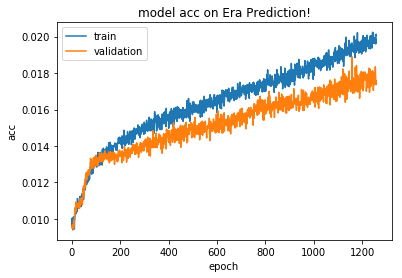

In [29]:
plot(history, title='Era Prediction', metric='acc')

This is a bit poor, but we seem to be getting at best around 1.8% accuracy

Building seperate era models
============================

For every era in the train set, select out the data and the all the respective 5 labels. We will use this to build the respective era models

In [23]:
%%time

eras_distinct = set(data.era) | as_list 

era_data = eras_distinct    \
        | select( lambda e: np.logical_and( data.region=='train', data.era==e ) ) \
        | select( lambda e: ( data.x[ e ], data.y[:][e] ) ) \
        | where( lambda e: e[0].shape[0] > 0 ) \
        | select( lambda e: train_test_split( e[0], e[1], test_size=0.33  ) ) \
        | as_list()

Wall time: 1min 16s


Predict the train region, and get the index of the highest one-hot era i.e. which era has the highest weight for each sample in train

In [35]:
%%time
best_predicted_model = np.argmax( model_dense.predict( data.x[ data.region=='train' ] ), axis=1 )

Wall time: 10.3 s


Take the mode to see which is the most popular predicted era (it's 58)

In [37]:
stats.mode(best_predicted_model)

ModeResult(mode=array([58], dtype=int64), count=array([97655]))

Lets plot a histogram of the best predicted eras on train, the regionality this histogram is very interesting. It seems to suggest that there are vicinities of related eras. 

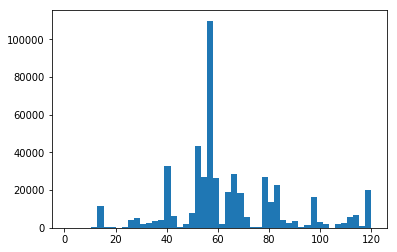

In [40]:
x = pyplot.hist(best_predicted_model, bins=50)

Function to get an era model trained on a particlar chunk of data. It will use early stopping and select the best validation model.

In [83]:
def GetEraModel(train_x, val_x, train_y, val_y ):

    model = Sequential([
        Dense(32, input_shape=(50,)),
        Activation('relu'),
        Dropout(0.3),
        Dense(100),
        Activation('relu'),
        Dense(100),
        Activation('relu'),
        Dropout(0.3),
        Dense(5),
        Activation('sigmoid'),
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_crossentropy'])

    callbacks = [EarlyStopping(monitor='val_loss', 
              min_delta=0, 
              patience=30, 
              verbose=0, 
              mode='auto', 
              baseline=None, 
              restore_best_weights=True)]
    
    history = model.fit(train_x, 
                        train_y, 
                        validation_data=(val_x,val_y), 
                        epochs=120, 
                        callbacks=callbacks,
                        batch_size=1000, 
                        shuffle=True)
    
    return (model, history)



Go ahead and train one of these era models for each and every era

In [ ]:
%%time
era_models = era_data | select( lambda era: GetEraModel( era[0], era[1], era[2], era[3] ) ) | as_list

Train on 2538 samples, validate on 1251 samples
Epoch 1/120
2538/2538 [==============================] - ETA: 11s - loss: 0.6993 - binary_crossentropy: 0.69 - 8s 3ms/step - loss: 0.6988 - binary_crossentropy: 0.6988 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932
Epoch 2/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6971 - binary_crossentropy: 0.697 - 0s 11us/step - loss: 0.6962 - binary_crossentropy: 0.6962 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 3/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6940 - binary_crossentropy: 0.694 - 0s 11us/step - loss: 0.6948 - binary_crossentropy: 0.6948 - val_loss: 0.6926 - val_binary_crossentropy: 0.6926
Epoch 4/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6935 - binary_crossentropy: 0.693 - 0s 10us/step - loss: 0.6943 - binary_crossentropy: 0.6943 - val_loss: 0.6923 - val_binary_crossentropy: 0.6923
Epoch 5/120
2538/2538 [==============================] - ETA: 0s 

Epoch 38/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6863 - binary_crossentropy: 0.686 - 0s 10us/step - loss: 0.6853 - binary_crossentropy: 0.6853 - val_loss: 0.6802 - val_binary_crossentropy: 0.6802
Epoch 39/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6865 - binary_crossentropy: 0.686 - 0s 10us/step - loss: 0.6842 - binary_crossentropy: 0.6842 - val_loss: 0.6807 - val_binary_crossentropy: 0.6807
Epoch 40/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6831 - binary_crossentropy: 0.683 - 0s 11us/step - loss: 0.6823 - binary_crossentropy: 0.6823 - val_loss: 0.6793 - val_binary_crossentropy: 0.6793
Epoch 41/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6822 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6835 - binary_crossentropy: 0.6835 - val_loss: 0.6789 - val_binary_crossentropy: 0.6789
Epoch 42/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6893 - binary_crossentropy: 0.68

Epoch 75/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6641 - binary_crossentropy: 0.664 - 0s 13us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - val_loss: 0.6781 - val_binary_crossentropy: 0.6781
Epoch 76/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6742 - binary_crossentropy: 0.674 - 0s 11us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - val_loss: 0.6780 - val_binary_crossentropy: 0.6780
Epoch 77/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6867 - binary_crossentropy: 0.686 - 0s 11us/step - loss: 0.6750 - binary_crossentropy: 0.6750 - val_loss: 0.6782 - val_binary_crossentropy: 0.6782
Epoch 78/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6699 - binary_crossentropy: 0.669 - 0s 11us/step - loss: 0.6706 - binary_crossentropy: 0.6706 - val_loss: 0.6779 - val_binary_crossentropy: 0.6779
Epoch 79/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6663 - binary_crossentropy: 0.66

Epoch 112/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6717 - binary_crossentropy: 0.671 - 0s 12us/step - loss: 0.6618 - binary_crossentropy: 0.6618 - val_loss: 0.6780 - val_binary_crossentropy: 0.6780
Epoch 113/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6577 - binary_crossentropy: 0.657 - 0s 12us/step - loss: 0.6625 - binary_crossentropy: 0.6625 - val_loss: 0.6800 - val_binary_crossentropy: 0.6800
Epoch 114/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6614 - binary_crossentropy: 0.661 - 0s 11us/step - loss: 0.6610 - binary_crossentropy: 0.6610 - val_loss: 0.6766 - val_binary_crossentropy: 0.6766
Epoch 115/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6548 - binary_crossentropy: 0.654 - 0s 10us/step - loss: 0.6618 - binary_crossentropy: 0.6618 - val_loss: 0.6764 - val_binary_crossentropy: 0.6764
Epoch 116/120
2538/2538 [==============================] - ETA: 0s - loss: 0.6566 - binary_crossentropy:

Epoch 30/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6459 - binary_crossentropy: 0.645 - 0s 12us/step - loss: 0.6513 - binary_crossentropy: 0.6513 - val_loss: 0.6363 - val_binary_crossentropy: 0.6363
Epoch 31/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6474 - binary_crossentropy: 0.647 - 0s 12us/step - loss: 0.6503 - binary_crossentropy: 0.6503 - val_loss: 0.6360 - val_binary_crossentropy: 0.6360
Epoch 32/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6431 - binary_crossentropy: 0.643 - 0s 12us/step - loss: 0.6469 - binary_crossentropy: 0.6469 - val_loss: 0.6355 - val_binary_crossentropy: 0.6355
Epoch 33/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6475 - binary_crossentropy: 0.647 - 0s 14us/step - loss: 0.6502 - binary_crossentropy: 0.6502 - val_loss: 0.6356 - val_binary_crossentropy: 0.6356
Epoch 34/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6505 - binary_crossentropy: 0.65

Epoch 67/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6409 - binary_crossentropy: 0.640 - 0s 11us/step - loss: 0.6415 - binary_crossentropy: 0.6415 - val_loss: 0.6277 - val_binary_crossentropy: 0.6277
Epoch 68/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6372 - binary_crossentropy: 0.637 - 0s 11us/step - loss: 0.6377 - binary_crossentropy: 0.6377 - val_loss: 0.6279 - val_binary_crossentropy: 0.6279
Epoch 69/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6504 - binary_crossentropy: 0.650 - 0s 11us/step - loss: 0.6376 - binary_crossentropy: 0.6376 - val_loss: 0.6285 - val_binary_crossentropy: 0.6285
Epoch 70/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6409 - binary_crossentropy: 0.640 - 0s 11us/step - loss: 0.6409 - binary_crossentropy: 0.6409 - val_loss: 0.6279 - val_binary_crossentropy: 0.6279
Epoch 71/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6333 - binary_crossentropy: 0.63

Epoch 104/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6264 - binary_crossentropy: 0.626 - 0s 10us/step - loss: 0.6334 - binary_crossentropy: 0.6334 - val_loss: 0.6231 - val_binary_crossentropy: 0.6231
Epoch 105/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6254 - binary_crossentropy: 0.625 - 0s 10us/step - loss: 0.6313 - binary_crossentropy: 0.6313 - val_loss: 0.6233 - val_binary_crossentropy: 0.6233
Epoch 106/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6255 - binary_crossentropy: 0.625 - 0s 11us/step - loss: 0.6303 - binary_crossentropy: 0.6303 - val_loss: 0.6231 - val_binary_crossentropy: 0.6231
Epoch 107/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6200 - binary_crossentropy: 0.620 - 0s 11us/step - loss: 0.6307 - binary_crossentropy: 0.6307 - val_loss: 0.6236 - val_binary_crossentropy: 0.6236
Epoch 108/120
2568/2568 [==============================] - ETA: 0s - loss: 0.6252 - binary_crossentropy:

Epoch 21/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6901 - binary_crossentropy: 0.690 - 0s 9us/step - loss: 0.6908 - binary_crossentropy: 0.6908 - val_loss: 0.6892 - val_binary_crossentropy: 0.6892
Epoch 22/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6886 - binary_crossentropy: 0.688 - 0s 10us/step - loss: 0.6908 - binary_crossentropy: 0.6908 - val_loss: 0.6890 - val_binary_crossentropy: 0.6890
Epoch 23/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6880 - binary_crossentropy: 0.688 - 0s 10us/step - loss: 0.6902 - binary_crossentropy: 0.6902 - val_loss: 0.6888 - val_binary_crossentropy: 0.6888
Epoch 24/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6909 - binary_crossentropy: 0.690 - 0s 11us/step - loss: 0.6896 - binary_crossentropy: 0.6896 - val_loss: 0.6886 - val_binary_crossentropy: 0.6886
Epoch 25/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6913 - binary_crossentropy: 0.691

Epoch 58/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6771 - binary_crossentropy: 0.677 - 0s 10us/step - loss: 0.6800 - binary_crossentropy: 0.6800 - val_loss: 0.6800 - val_binary_crossentropy: 0.6800
Epoch 59/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6838 - binary_crossentropy: 0.683 - 0s 10us/step - loss: 0.6804 - binary_crossentropy: 0.6804 - val_loss: 0.6797 - val_binary_crossentropy: 0.6797
Epoch 60/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6751 - binary_crossentropy: 0.675 - 0s 9us/step - loss: 0.6806 - binary_crossentropy: 0.6806 - val_loss: 0.6799 - val_binary_crossentropy: 0.6799
Epoch 61/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6793 - binary_crossentropy: 0.679 - 0s 9us/step - loss: 0.6790 - binary_crossentropy: 0.6790 - val_loss: 0.6794 - val_binary_crossentropy: 0.6794
Epoch 62/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6819 - binary_crossentropy: 0.681 

Epoch 95/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6691 - binary_crossentropy: 0.669 - 0s 9us/step - loss: 0.6718 - binary_crossentropy: 0.6718 - val_loss: 0.6778 - val_binary_crossentropy: 0.6778
Epoch 96/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6665 - binary_crossentropy: 0.666 - 0s 9us/step - loss: 0.6698 - binary_crossentropy: 0.6698 - val_loss: 0.6775 - val_binary_crossentropy: 0.6775
Epoch 97/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6712 - binary_crossentropy: 0.671 - 0s 9us/step - loss: 0.6678 - binary_crossentropy: 0.6678 - val_loss: 0.6806 - val_binary_crossentropy: 0.6806
Epoch 98/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6737 - binary_crossentropy: 0.673 - 0s 9us/step - loss: 0.6697 - binary_crossentropy: 0.6697 - val_loss: 0.6791 - val_binary_crossentropy: 0.6791
Epoch 99/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6659 - binary_crossentropy: 0.665 - 

Epoch 12/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6820 - binary_crossentropy: 0.682 - 0s 10us/step - loss: 0.6844 - binary_crossentropy: 0.6844 - val_loss: 0.6828 - val_binary_crossentropy: 0.6828
Epoch 13/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6883 - binary_crossentropy: 0.688 - 0s 10us/step - loss: 0.6821 - binary_crossentropy: 0.6821 - val_loss: 0.6809 - val_binary_crossentropy: 0.6809
Epoch 14/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6825 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - val_loss: 0.6789 - val_binary_crossentropy: 0.6789
Epoch 15/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6839 - binary_crossentropy: 0.683 - 0s 11us/step - loss: 0.6830 - binary_crossentropy: 0.6830 - val_loss: 0.6779 - val_binary_crossentropy: 0.6779
Epoch 16/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6851 - binary_crossentropy: 0.68

Epoch 49/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6667 - binary_crossentropy: 0.666 - 0s 10us/step - loss: 0.6666 - binary_crossentropy: 0.6666 - val_loss: 0.6701 - val_binary_crossentropy: 0.6701
Epoch 50/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6673 - binary_crossentropy: 0.667 - 0s 10us/step - loss: 0.6670 - binary_crossentropy: 0.6670 - val_loss: 0.6702 - val_binary_crossentropy: 0.6702
Epoch 51/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6760 - binary_crossentropy: 0.676 - 0s 10us/step - loss: 0.6677 - binary_crossentropy: 0.6677 - val_loss: 0.6704 - val_binary_crossentropy: 0.6704
Epoch 52/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6688 - binary_crossentropy: 0.668 - 0s 10us/step - loss: 0.6661 - binary_crossentropy: 0.6661 - val_loss: 0.6697 - val_binary_crossentropy: 0.6697
Epoch 53/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6604 - binary_crossentropy: 0.66

Epoch 86/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6596 - binary_crossentropy: 0.659 - 0s 11us/step - loss: 0.6655 - binary_crossentropy: 0.6655 - val_loss: 0.6697 - val_binary_crossentropy: 0.6697
Epoch 87/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6688 - binary_crossentropy: 0.668 - 0s 10us/step - loss: 0.6635 - binary_crossentropy: 0.6635 - val_loss: 0.6702 - val_binary_crossentropy: 0.6702
Epoch 88/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6589 - binary_crossentropy: 0.658 - 0s 12us/step - loss: 0.6629 - binary_crossentropy: 0.6629 - val_loss: 0.6704 - val_binary_crossentropy: 0.6704
Epoch 89/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6605 - binary_crossentropy: 0.660 - 0s 10us/step - loss: 0.6627 - binary_crossentropy: 0.6627 - val_loss: 0.6700 - val_binary_crossentropy: 0.6700
Epoch 90/120
3267/3267 [==============================] - ETA: 0s - loss: 0.6604 - binary_crossentropy: 0.66

Epoch 39/120
2600/2600 [==============================] - ETA: 0s - loss: 0.6892 - binary_crossentropy: 0.689 - 0s 11us/step - loss: 0.6876 - binary_crossentropy: 0.6876 - val_loss: 0.6895 - val_binary_crossentropy: 0.6895
Epoch 40/120
2600/2600 [==============================] - ETA: 0s - loss: 0.6838 - binary_crossentropy: 0.683 - 0s 11us/step - loss: 0.6864 - binary_crossentropy: 0.6864 - val_loss: 0.6891 - val_binary_crossentropy: 0.6891
Epoch 41/120
2600/2600 [==============================] - ETA: 0s - loss: 0.6854 - binary_crossentropy: 0.685 - 0s 11us/step - loss: 0.6844 - binary_crossentropy: 0.6844 - val_loss: 0.6887 - val_binary_crossentropy: 0.6887
Epoch 42/120
2600/2600 [==============================] - ETA: 0s - loss: 0.6817 - binary_crossentropy: 0.681 - 0s 13us/step - loss: 0.6854 - binary_crossentropy: 0.6854 - val_loss: 0.6889 - val_binary_crossentropy: 0.6889
Epoch 43/120
2600/2600 [==============================] - ETA: 0s - loss: 0.6844 - binary_crossentropy: 0.68

Epoch 76/120
2600/2600 [==============================] - ETA: 0s - loss: 0.6760 - binary_crossentropy: 0.676 - 0s 11us/step - loss: 0.6786 - binary_crossentropy: 0.6786 - val_loss: 0.6885 - val_binary_crossentropy: 0.6885
Epoch 77/120
2600/2600 [==============================] - ETA: 0s - loss: 0.6827 - binary_crossentropy: 0.682 - 0s 10us/step - loss: 0.6808 - binary_crossentropy: 0.6808 - val_loss: 0.6888 - val_binary_crossentropy: 0.6888
Epoch 78/120
2600/2600 [==============================] - ETA: 0s - loss: 0.6765 - binary_crossentropy: 0.676 - 0s 10us/step - loss: 0.6788 - binary_crossentropy: 0.6788 - val_loss: 0.6886 - val_binary_crossentropy: 0.6886
Epoch 79/120
2600/2600 [==============================] - ETA: 0s - loss: 0.6766 - binary_crossentropy: 0.676 - 0s 10us/step - loss: 0.6780 - binary_crossentropy: 0.6780 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 80/120
2600/2600 [==============================] - ETA: 0s - loss: 0.6770 - binary_crossentropy: 0.67

Epoch 39/120
2945/2945 [==============================] - ETA: 0s - loss: 0.6879 - binary_crossentropy: 0.687 - 0s 9us/step - loss: 0.6850 - binary_crossentropy: 0.6850 - val_loss: 0.6899 - val_binary_crossentropy: 0.6899
Epoch 40/120
2945/2945 [==============================] - ETA: 0s - loss: 0.6865 - binary_crossentropy: 0.686 - 0s 9us/step - loss: 0.6859 - binary_crossentropy: 0.6859 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902
Epoch 41/120
2945/2945 [==============================] - ETA: 0s - loss: 0.6865 - binary_crossentropy: 0.686 - 0s 9us/step - loss: 0.6840 - binary_crossentropy: 0.6840 - val_loss: 0.6908 - val_binary_crossentropy: 0.6908
Epoch 42/120
2945/2945 [==============================] - ETA: 0s - loss: 0.6833 - binary_crossentropy: 0.683 - 0s 10us/step - loss: 0.6854 - binary_crossentropy: 0.6854 - val_loss: 0.6909 - val_binary_crossentropy: 0.6909
Epoch 43/120
2945/2945 [==============================] - ETA: 0s - loss: 0.6835 - binary_crossentropy: 0.683 -

Epoch 76/120
2945/2945 [==============================] - ETA: 0s - loss: 0.6750 - binary_crossentropy: 0.675 - 0s 9us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 77/120
2945/2945 [==============================] - ETA: 0s - loss: 0.6779 - binary_crossentropy: 0.677 - 0s 9us/step - loss: 0.6765 - binary_crossentropy: 0.6765 - val_loss: 0.6939 - val_binary_crossentropy: 0.6939
Epoch 78/120
2945/2945 [==============================] - ETA: 0s - loss: 0.6799 - binary_crossentropy: 0.679 - 0s 9us/step - loss: 0.6804 - binary_crossentropy: 0.6804 - val_loss: 0.6913 - val_binary_crossentropy: 0.6913
Epoch 79/120
2945/2945 [==============================] - ETA: 0s - loss: 0.6702 - binary_crossentropy: 0.670 - 0s 9us/step - loss: 0.6764 - binary_crossentropy: 0.6764 - val_loss: 0.6909 - val_binary_crossentropy: 0.6909
Epoch 80/120
2945/2945 [==============================] - ETA: 0s - loss: 0.6815 - binary_crossentropy: 0.681 - 

Epoch 28/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6929 - binary_crossentropy: 0.692 - 0s 11us/step - loss: 0.6926 - binary_crossentropy: 0.6926 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 29/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6918 - binary_crossentropy: 0.691 - 0s 11us/step - loss: 0.6924 - binary_crossentropy: 0.6924 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 30/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6924 - binary_crossentropy: 0.692 - 0s 11us/step - loss: 0.6929 - binary_crossentropy: 0.6929 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 31/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6922 - binary_crossentropy: 0.692 - 0s 12us/step - loss: 0.6921 - binary_crossentropy: 0.6921 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 32/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6926 - binary_crossentropy: 0.69

Epoch 65/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6911 - binary_crossentropy: 0.691 - 0s 11us/step - loss: 0.6925 - binary_crossentropy: 0.6925 - val_loss: 0.6925 - val_binary_crossentropy: 0.6925
Epoch 66/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6907 - binary_crossentropy: 0.690 - 0s 11us/step - loss: 0.6914 - binary_crossentropy: 0.6914 - val_loss: 0.6923 - val_binary_crossentropy: 0.6923
Epoch 67/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6917 - binary_crossentropy: 0.691 - 0s 11us/step - loss: 0.6917 - binary_crossentropy: 0.6917 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924
Epoch 68/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6918 - binary_crossentropy: 0.691 - 0s 11us/step - loss: 0.6918 - binary_crossentropy: 0.6918 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924
Epoch 69/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6915 - binary_crossentropy: 0.69

Epoch 102/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6885 - binary_crossentropy: 0.688 - 0s 12us/step - loss: 0.6897 - binary_crossentropy: 0.6897 - val_loss: 0.6908 - val_binary_crossentropy: 0.6908
Epoch 103/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6901 - binary_crossentropy: 0.690 - 0s 12us/step - loss: 0.6891 - binary_crossentropy: 0.6891 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911
Epoch 104/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6898 - binary_crossentropy: 0.689 - 0s 12us/step - loss: 0.6902 - binary_crossentropy: 0.6902 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911
Epoch 105/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6880 - binary_crossentropy: 0.688 - 0s 12us/step - loss: 0.6892 - binary_crossentropy: 0.6892 - val_loss: 0.6903 - val_binary_crossentropy: 0.6903
Epoch 106/120
3017/3017 [==============================] - ETA: 0s - loss: 0.6888 - binary_crossentropy:

Epoch 55/120
3016/3016 [==============================] - ETA: 0s - loss: 0.6903 - binary_crossentropy: 0.690 - 0s 11us/step - loss: 0.6857 - binary_crossentropy: 0.6857 - val_loss: 0.6876 - val_binary_crossentropy: 0.6876
Epoch 56/120
3016/3016 [==============================] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6851 - binary_crossentropy: 0.6851 - val_loss: 0.6876 - val_binary_crossentropy: 0.6876
Epoch 57/120
3016/3016 [==============================] - ETA: 0s - loss: 0.6819 - binary_crossentropy: 0.681 - 0s 12us/step - loss: 0.6849 - binary_crossentropy: 0.6849 - val_loss: 0.6869 - val_binary_crossentropy: 0.6869
Epoch 58/120
3016/3016 [==============================] - ETA: 0s - loss: 0.6865 - binary_crossentropy: 0.686 - 0s 12us/step - loss: 0.6846 - binary_crossentropy: 0.6846 - val_loss: 0.6866 - val_binary_crossentropy: 0.6866
Epoch 59/120
3016/3016 [==============================] - ETA: 0s - loss: 0.6848 - binary_crossentropy: 0.68

Epoch 92/120
3016/3016 [==============================] - ETA: 0s - loss: 0.6866 - binary_crossentropy: 0.686 - 0s 11us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - val_loss: 0.6842 - val_binary_crossentropy: 0.6842
Epoch 93/120
3016/3016 [==============================] - ETA: 0s - loss: 0.6828 - binary_crossentropy: 0.682 - 0s 11us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - val_loss: 0.6835 - val_binary_crossentropy: 0.6835
Epoch 94/120
3016/3016 [==============================] - ETA: 0s - loss: 0.6845 - binary_crossentropy: 0.684 - 0s 11us/step - loss: 0.6801 - binary_crossentropy: 0.6801 - val_loss: 0.6837 - val_binary_crossentropy: 0.6837
Epoch 95/120
3016/3016 [==============================] - ETA: 0s - loss: 0.6814 - binary_crossentropy: 0.681 - 0s 11us/step - loss: 0.6805 - binary_crossentropy: 0.6805 - val_loss: 0.6839 - val_binary_crossentropy: 0.6839
Epoch 96/120
3016/3016 [==============================] - ETA: 0s - loss: 0.6916 - binary_crossentropy: 0.69

Epoch 45/120
2878/2878 [==============================] - ETA: 0s - loss: 0.6816 - binary_crossentropy: 0.681 - 0s 11us/step - loss: 0.6827 - binary_crossentropy: 0.6827 - val_loss: 0.6827 - val_binary_crossentropy: 0.6827
Epoch 46/120
2878/2878 [==============================] - ETA: 0s - loss: 0.6767 - binary_crossentropy: 0.676 - 0s 10us/step - loss: 0.6772 - binary_crossentropy: 0.6772 - val_loss: 0.6834 - val_binary_crossentropy: 0.6834
Epoch 47/120
2878/2878 [==============================] - ETA: 0s - loss: 0.6883 - binary_crossentropy: 0.688 - 0s 11us/step - loss: 0.6825 - binary_crossentropy: 0.6825 - val_loss: 0.6822 - val_binary_crossentropy: 0.6822
Epoch 48/120
2878/2878 [==============================] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.682 - 0s 10us/step - loss: 0.6806 - binary_crossentropy: 0.6806 - val_loss: 0.6819 - val_binary_crossentropy: 0.6819
Epoch 49/120
2878/2878 [==============================] - ETA: 0s - loss: 0.6824 - binary_crossentropy: 0.68

Epoch 82/120
2878/2878 [==============================] - ETA: 0s - loss: 0.6772 - binary_crossentropy: 0.677 - 0s 10us/step - loss: 0.6716 - binary_crossentropy: 0.6716 - val_loss: 0.6789 - val_binary_crossentropy: 0.6789
Epoch 83/120
2878/2878 [==============================] - ETA: 0s - loss: 0.6748 - binary_crossentropy: 0.674 - 0s 10us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - val_loss: 0.6788 - val_binary_crossentropy: 0.6788
Epoch 84/120
2878/2878 [==============================] - ETA: 0s - loss: 0.6636 - binary_crossentropy: 0.663 - 0s 10us/step - loss: 0.6715 - binary_crossentropy: 0.6715 - val_loss: 0.6782 - val_binary_crossentropy: 0.6782
Epoch 85/120
2878/2878 [==============================] - ETA: 0s - loss: 0.6713 - binary_crossentropy: 0.671 - 0s 10us/step - loss: 0.6748 - binary_crossentropy: 0.6748 - val_loss: 0.6780 - val_binary_crossentropy: 0.6780
Epoch 86/120
2878/2878 [==============================] - ETA: 0s - loss: 0.6789 - binary_crossentropy: 0.67

Epoch 119/120
2878/2878 [==============================] - ETA: 0s - loss: 0.6593 - binary_crossentropy: 0.659 - 0s 10us/step - loss: 0.6659 - binary_crossentropy: 0.6659 - val_loss: 0.6770 - val_binary_crossentropy: 0.6770
Epoch 120/120
2878/2878 [==============================] - ETA: 0s - loss: 0.6670 - binary_crossentropy: 0.667 - 0s 11us/step - loss: 0.6668 - binary_crossentropy: 0.6668 - val_loss: 0.6799 - val_binary_crossentropy: 0.6799
Train on 2711 samples, validate on 1336 samples
Epoch 1/120
2711/2711 [==============================] - ETA: 13s - loss: 0.7212 - binary_crossentropy: 0.72 - 9s 3ms/step - loss: 0.7127 - binary_crossentropy: 0.7127 - val_loss: 0.6951 - val_binary_crossentropy: 0.6951
Epoch 2/120
2711/2711 [==============================] - ETA: 0s - loss: 0.7016 - binary_crossentropy: 0.701 - 0s 12us/step - loss: 0.7011 - binary_crossentropy: 0.7011 - val_loss: 0.6943 - val_binary_crossentropy: 0.6943
Epoch 3/120
2711/2711 [==============================] - ETA:

Epoch 36/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6924 - binary_crossentropy: 0.692 - 0s 13us/step - loss: 0.6911 - binary_crossentropy: 0.6911 - val_loss: 0.6915 - val_binary_crossentropy: 0.6915
Epoch 37/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6918 - binary_crossentropy: 0.691 - 0s 12us/step - loss: 0.6911 - binary_crossentropy: 0.6911 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911
Epoch 38/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6891 - binary_crossentropy: 0.689 - 0s 11us/step - loss: 0.6912 - binary_crossentropy: 0.6912 - val_loss: 0.6908 - val_binary_crossentropy: 0.6908
Epoch 39/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6917 - binary_crossentropy: 0.691 - 0s 12us/step - loss: 0.6909 - binary_crossentropy: 0.6909 - val_loss: 0.6904 - val_binary_crossentropy: 0.6904
Epoch 40/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6915 - binary_crossentropy: 0.69

Epoch 73/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6838 - binary_crossentropy: 0.683 - 0s 11us/step - loss: 0.6814 - binary_crossentropy: 0.6814 - val_loss: 0.6858 - val_binary_crossentropy: 0.6858
Epoch 74/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6859 - binary_crossentropy: 0.685 - 0s 10us/step - loss: 0.6830 - binary_crossentropy: 0.6830 - val_loss: 0.6855 - val_binary_crossentropy: 0.6855
Epoch 75/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6749 - binary_crossentropy: 0.674 - 0s 10us/step - loss: 0.6805 - binary_crossentropy: 0.6805 - val_loss: 0.6829 - val_binary_crossentropy: 0.6829
Epoch 76/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6850 - binary_crossentropy: 0.685 - 0s 10us/step - loss: 0.6818 - binary_crossentropy: 0.6818 - val_loss: 0.6826 - val_binary_crossentropy: 0.6826
Epoch 77/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6796 - binary_crossentropy: 0.67

Epoch 110/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6754 - binary_crossentropy: 0.675 - 0s 11us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - val_loss: 0.6837 - val_binary_crossentropy: 0.6837
Epoch 111/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6816 - binary_crossentropy: 0.681 - 0s 12us/step - loss: 0.6762 - binary_crossentropy: 0.6762 - val_loss: 0.6852 - val_binary_crossentropy: 0.6852
Epoch 112/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6697 - binary_crossentropy: 0.669 - 0s 11us/step - loss: 0.6722 - binary_crossentropy: 0.6722 - val_loss: 0.6858 - val_binary_crossentropy: 0.6858
Epoch 113/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6768 - binary_crossentropy: 0.676 - 0s 11us/step - loss: 0.6766 - binary_crossentropy: 0.6766 - val_loss: 0.6841 - val_binary_crossentropy: 0.6841
Epoch 114/120
2711/2711 [==============================] - ETA: 0s - loss: 0.6713 - binary_crossentropy:

Epoch 27/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6856 - binary_crossentropy: 0.685 - 0s 10us/step - loss: 0.6885 - binary_crossentropy: 0.6885 - val_loss: 0.6875 - val_binary_crossentropy: 0.6875
Epoch 28/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6920 - binary_crossentropy: 0.692 - 0s 10us/step - loss: 0.6893 - binary_crossentropy: 0.6893 - val_loss: 0.6875 - val_binary_crossentropy: 0.6875
Epoch 29/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6862 - binary_crossentropy: 0.686 - 0s 10us/step - loss: 0.6885 - binary_crossentropy: 0.6885 - val_loss: 0.6890 - val_binary_crossentropy: 0.6890
Epoch 30/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6878 - binary_crossentropy: 0.687 - 0s 10us/step - loss: 0.6862 - binary_crossentropy: 0.6862 - val_loss: 0.6877 - val_binary_crossentropy: 0.6877
Epoch 31/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6886 - binary_crossentropy: 0.68

Epoch 64/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6756 - binary_crossentropy: 0.675 - 0s 11us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - val_loss: 0.6782 - val_binary_crossentropy: 0.6782
Epoch 65/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6725 - binary_crossentropy: 0.672 - 0s 11us/step - loss: 0.6733 - binary_crossentropy: 0.6733 - val_loss: 0.6758 - val_binary_crossentropy: 0.6758
Epoch 66/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6758 - binary_crossentropy: 0.675 - 0s 10us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - val_loss: 0.6774 - val_binary_crossentropy: 0.6774
Epoch 67/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6649 - binary_crossentropy: 0.664 - 0s 10us/step - loss: 0.6722 - binary_crossentropy: 0.6722 - val_loss: 0.6761 - val_binary_crossentropy: 0.6761
Epoch 68/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6727 - binary_crossentropy: 0.67

Epoch 101/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6650 - binary_crossentropy: 0.665 - 0s 12us/step - loss: 0.6652 - binary_crossentropy: 0.6652 - val_loss: 0.6758 - val_binary_crossentropy: 0.6758
Epoch 102/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6691 - binary_crossentropy: 0.669 - 0s 11us/step - loss: 0.6649 - binary_crossentropy: 0.6649 - val_loss: 0.6756 - val_binary_crossentropy: 0.6756
Epoch 103/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6668 - binary_crossentropy: 0.666 - 0s 11us/step - loss: 0.6685 - binary_crossentropy: 0.6685 - val_loss: 0.6746 - val_binary_crossentropy: 0.6746
Epoch 104/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6726 - binary_crossentropy: 0.672 - 0s 11us/step - loss: 0.6697 - binary_crossentropy: 0.6697 - val_loss: 0.6744 - val_binary_crossentropy: 0.6744
Epoch 105/120
3148/3148 [==============================] - ETA: 0s - loss: 0.6672 - binary_crossentropy:

Epoch 54/120
1811/1811 [==============================] - ETA: 0s - loss: 0.6889 - binary_crossentropy: 0.688 - 0s 12us/step - loss: 0.6875 - binary_crossentropy: 0.6875 - val_loss: 0.6859 - val_binary_crossentropy: 0.6859
Epoch 55/120
1811/1811 [==============================] - ETA: 0s - loss: 0.6876 - binary_crossentropy: 0.687 - 0s 12us/step - loss: 0.6872 - binary_crossentropy: 0.6872 - val_loss: 0.6859 - val_binary_crossentropy: 0.6859
Epoch 56/120
1811/1811 [==============================] - ETA: 0s - loss: 0.6866 - binary_crossentropy: 0.686 - 0s 12us/step - loss: 0.6870 - binary_crossentropy: 0.6870 - val_loss: 0.6858 - val_binary_crossentropy: 0.6858
Epoch 57/120
1811/1811 [==============================] - ETA: 0s - loss: 0.6872 - binary_crossentropy: 0.687 - 0s 12us/step - loss: 0.6869 - binary_crossentropy: 0.6869 - val_loss: 0.6856 - val_binary_crossentropy: 0.6856
Epoch 58/120
1811/1811 [==============================] - ETA: 0s - loss: 0.6884 - binary_crossentropy: 0.68

Epoch 91/120
1811/1811 [==============================] - ETA: 0s - loss: 0.6798 - binary_crossentropy: 0.679 - 0s 10us/step - loss: 0.6839 - binary_crossentropy: 0.6839 - val_loss: 0.6848 - val_binary_crossentropy: 0.6848
Epoch 92/120
1811/1811 [==============================] - ETA: 0s - loss: 0.6796 - binary_crossentropy: 0.679 - 0s 10us/step - loss: 0.6821 - binary_crossentropy: 0.6821 - val_loss: 0.6850 - val_binary_crossentropy: 0.6850
Epoch 93/120
1811/1811 [==============================] - ETA: 0s - loss: 0.6850 - binary_crossentropy: 0.685 - 0s 10us/step - loss: 0.6834 - binary_crossentropy: 0.6834 - val_loss: 0.6847 - val_binary_crossentropy: 0.6847
Epoch 94/120
1811/1811 [==============================] - ETA: 0s - loss: 0.6841 - binary_crossentropy: 0.684 - 0s 11us/step - loss: 0.6842 - binary_crossentropy: 0.6842 - val_loss: 0.6846 - val_binary_crossentropy: 0.6846
Epoch 95/120
1811/1811 [==============================] - ETA: 0s - loss: 0.6785 - binary_crossentropy: 0.67

Epoch 44/120
2336/2336 [==============================] - ETA: 0s - loss: 0.6837 - binary_crossentropy: 0.683 - 0s 12us/step - loss: 0.6823 - binary_crossentropy: 0.6823 - val_loss: 0.6844 - val_binary_crossentropy: 0.6844
Epoch 45/120
2336/2336 [==============================] - ETA: 0s - loss: 0.6827 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6818 - binary_crossentropy: 0.6818 - val_loss: 0.6843 - val_binary_crossentropy: 0.6843
Epoch 46/120
2336/2336 [==============================] - ETA: 0s - loss: 0.6857 - binary_crossentropy: 0.685 - 0s 12us/step - loss: 0.6843 - binary_crossentropy: 0.6843 - val_loss: 0.6842 - val_binary_crossentropy: 0.6842
Epoch 47/120
2336/2336 [==============================] - ETA: 0s - loss: 0.6785 - binary_crossentropy: 0.678 - 0s 14us/step - loss: 0.6822 - binary_crossentropy: 0.6822 - val_loss: 0.6842 - val_binary_crossentropy: 0.6842
Epoch 48/120
2336/2336 [==============================] - ETA: 0s - loss: 0.6813 - binary_crossentropy: 0.68

Epoch 81/120
2336/2336 [==============================] - ETA: 0s - loss: 0.6807 - binary_crossentropy: 0.680 - 0s 12us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - val_loss: 0.6831 - val_binary_crossentropy: 0.6831
Epoch 82/120
2336/2336 [==============================] - ETA: 0s - loss: 0.6701 - binary_crossentropy: 0.670 - 0s 12us/step - loss: 0.6754 - binary_crossentropy: 0.6754 - val_loss: 0.6833 - val_binary_crossentropy: 0.6833
Epoch 83/120
2336/2336 [==============================] - ETA: 0s - loss: 0.6761 - binary_crossentropy: 0.676 - 0s 12us/step - loss: 0.6764 - binary_crossentropy: 0.6764 - val_loss: 0.6834 - val_binary_crossentropy: 0.6834
Epoch 84/120
2336/2336 [==============================] - ETA: 0s - loss: 0.6827 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6793 - binary_crossentropy: 0.6793 - val_loss: 0.6839 - val_binary_crossentropy: 0.6839
Epoch 85/120
2336/2336 [==============================] - ETA: 0s - loss: 0.6762 - binary_crossentropy: 0.67

Epoch 118/120
2336/2336 [==============================] - ETA: 0s - loss: 0.6783 - binary_crossentropy: 0.678 - 0s 12us/step - loss: 0.6693 - binary_crossentropy: 0.6693 - val_loss: 0.6844 - val_binary_crossentropy: 0.6844
Epoch 119/120
2336/2336 [==============================] - ETA: 0s - loss: 0.6676 - binary_crossentropy: 0.667 - 0s 12us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - val_loss: 0.6839 - val_binary_crossentropy: 0.6839
Epoch 120/120
2336/2336 [==============================] - ETA: 0s - loss: 0.6737 - binary_crossentropy: 0.673 - 0s 12us/step - loss: 0.6698 - binary_crossentropy: 0.6698 - val_loss: 0.6842 - val_binary_crossentropy: 0.6842
Train on 2895 samples, validate on 1426 samples
Epoch 1/120
2895/2895 [==============================] - ETA: 15s - loss: 0.7058 - binary_crossentropy: 0.70 - 9s 3ms/step - loss: 0.7030 - binary_crossentropy: 0.7030 - val_loss: 0.6949 - val_binary_crossentropy: 0.6949
Epoch 2/120
2895/2895 [==============================] - ET

Epoch 35/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6903 - binary_crossentropy: 0.690 - 0s 10us/step - loss: 0.6916 - binary_crossentropy: 0.6916 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920
Epoch 36/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6930 - binary_crossentropy: 0.693 - 0s 10us/step - loss: 0.6918 - binary_crossentropy: 0.6918 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 37/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6914 - binary_crossentropy: 0.691 - 0s 10us/step - loss: 0.6921 - binary_crossentropy: 0.6921 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 38/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6926 - binary_crossentropy: 0.692 - 0s 10us/step - loss: 0.6922 - binary_crossentropy: 0.6922 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916
Epoch 39/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6920 - binary_crossentropy: 0.69

Epoch 72/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6881 - binary_crossentropy: 0.688 - 0s 10us/step - loss: 0.6887 - binary_crossentropy: 0.6887 - val_loss: 0.6882 - val_binary_crossentropy: 0.6882
Epoch 73/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6890 - binary_crossentropy: 0.689 - 0s 12us/step - loss: 0.6875 - binary_crossentropy: 0.6875 - val_loss: 0.6884 - val_binary_crossentropy: 0.6884
Epoch 74/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6866 - binary_crossentropy: 0.686 - 0s 11us/step - loss: 0.6882 - binary_crossentropy: 0.6882 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 75/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6902 - binary_crossentropy: 0.690 - 0s 12us/step - loss: 0.6871 - binary_crossentropy: 0.6871 - val_loss: 0.6876 - val_binary_crossentropy: 0.6876
Epoch 76/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6924 - binary_crossentropy: 0.69

Epoch 109/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6793 - binary_crossentropy: 0.679 - 0s 10us/step - loss: 0.6840 - binary_crossentropy: 0.6840 - val_loss: 0.6859 - val_binary_crossentropy: 0.6859
Epoch 110/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6810 - binary_crossentropy: 0.681 - 0s 10us/step - loss: 0.6833 - binary_crossentropy: 0.6833 - val_loss: 0.6855 - val_binary_crossentropy: 0.6855
Epoch 111/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6888 - binary_crossentropy: 0.688 - 0s 10us/step - loss: 0.6857 - binary_crossentropy: 0.6857 - val_loss: 0.6852 - val_binary_crossentropy: 0.6852
Epoch 112/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6842 - binary_crossentropy: 0.684 - 0s 10us/step - loss: 0.6842 - binary_crossentropy: 0.6842 - val_loss: 0.6853 - val_binary_crossentropy: 0.6853
Epoch 113/120
2895/2895 [==============================] - ETA: 0s - loss: 0.6846 - binary_crossentropy:

Epoch 26/120
2588/2588 [==============================] - ETA: 0s - loss: 0.6866 - binary_crossentropy: 0.686 - 0s 11us/step - loss: 0.6883 - binary_crossentropy: 0.6883 - val_loss: 0.6900 - val_binary_crossentropy: 0.6900
Epoch 27/120
2588/2588 [==============================] - ETA: 0s - loss: 0.6876 - binary_crossentropy: 0.687 - 0s 11us/step - loss: 0.6886 - binary_crossentropy: 0.6886 - val_loss: 0.6892 - val_binary_crossentropy: 0.6892
Epoch 28/120
2588/2588 [==============================] - ETA: 0s - loss: 0.6860 - binary_crossentropy: 0.686 - 0s 11us/step - loss: 0.6882 - binary_crossentropy: 0.6882 - val_loss: 0.6889 - val_binary_crossentropy: 0.6889
Epoch 29/120
2588/2588 [==============================] - ETA: 0s - loss: 0.6896 - binary_crossentropy: 0.689 - 0s 11us/step - loss: 0.6875 - binary_crossentropy: 0.6875 - val_loss: 0.6886 - val_binary_crossentropy: 0.6886
Epoch 30/120
2588/2588 [==============================] - ETA: 0s - loss: 0.6864 - binary_crossentropy: 0.68

Epoch 63/120
2588/2588 [==============================] - ETA: 0s - loss: 0.6731 - binary_crossentropy: 0.673 - 0s 11us/step - loss: 0.6753 - binary_crossentropy: 0.6753 - val_loss: 0.6869 - val_binary_crossentropy: 0.6869
Epoch 64/120
2588/2588 [==============================] - ETA: 0s - loss: 0.6742 - binary_crossentropy: 0.674 - 0s 11us/step - loss: 0.6757 - binary_crossentropy: 0.6757 - val_loss: 0.6858 - val_binary_crossentropy: 0.6858
Epoch 65/120
2588/2588 [==============================] - ETA: 0s - loss: 0.6726 - binary_crossentropy: 0.672 - 0s 13us/step - loss: 0.6740 - binary_crossentropy: 0.6740 - val_loss: 0.6866 - val_binary_crossentropy: 0.6866
Epoch 66/120
2588/2588 [==============================] - ETA: 0s - loss: 0.6744 - binary_crossentropy: 0.674 - 0s 11us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - val_loss: 0.6866 - val_binary_crossentropy: 0.6866
Epoch 67/120
2588/2588 [==============================] - ETA: 0s - loss: 0.6741 - binary_crossentropy: 0.67

Epoch 14/120
2613/2613 [==============================] - ETA: 0s - loss: 0.6928 - binary_crossentropy: 0.692 - 0s 10us/step - loss: 0.6918 - binary_crossentropy: 0.6918 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924
Epoch 15/120
2613/2613 [==============================] - ETA: 0s - loss: 0.6928 - binary_crossentropy: 0.692 - 0s 10us/step - loss: 0.6917 - binary_crossentropy: 0.6917 - val_loss: 0.6921 - val_binary_crossentropy: 0.6921
Epoch 16/120
2613/2613 [==============================] - ETA: 0s - loss: 0.6908 - binary_crossentropy: 0.690 - 0s 11us/step - loss: 0.6911 - binary_crossentropy: 0.6911 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920
Epoch 17/120
2613/2613 [==============================] - ETA: 0s - loss: 0.6912 - binary_crossentropy: 0.691 - 0s 10us/step - loss: 0.6909 - binary_crossentropy: 0.6909 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 18/120
2613/2613 [==============================] - ETA: 0s - loss: 0.6905 - binary_crossentropy: 0.69

Epoch 51/120
2613/2613 [==============================] - ETA: 0s - loss: 0.6849 - binary_crossentropy: 0.684 - 0s 11us/step - loss: 0.6845 - binary_crossentropy: 0.6845 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911
Epoch 52/120
2613/2613 [==============================] - ETA: 0s - loss: 0.6818 - binary_crossentropy: 0.681 - 0s 10us/step - loss: 0.6848 - binary_crossentropy: 0.6848 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911
Epoch 53/120
2613/2613 [==============================] - ETA: 0s - loss: 0.6863 - binary_crossentropy: 0.686 - 0s 10us/step - loss: 0.6847 - binary_crossentropy: 0.6847 - val_loss: 0.6910 - val_binary_crossentropy: 0.6910
Epoch 54/120
2613/2613 [==============================] - ETA: 0s - loss: 0.6850 - binary_crossentropy: 0.685 - 0s 12us/step - loss: 0.6840 - binary_crossentropy: 0.6840 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911
Epoch 55/120
2613/2613 [==============================] - ETA: 0s - loss: 0.6888 - binary_crossentropy: 0.68

Epoch 23/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6798 - binary_crossentropy: 0.679 - 0s 12us/step - loss: 0.6789 - binary_crossentropy: 0.6789 - val_loss: 0.6730 - val_binary_crossentropy: 0.6730
Epoch 24/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6831 - binary_crossentropy: 0.683 - 0s 12us/step - loss: 0.6778 - binary_crossentropy: 0.6778 - val_loss: 0.6752 - val_binary_crossentropy: 0.6752
Epoch 25/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6760 - binary_crossentropy: 0.676 - 0s 12us/step - loss: 0.6757 - binary_crossentropy: 0.6757 - val_loss: 0.6728 - val_binary_crossentropy: 0.6728
Epoch 26/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6765 - binary_crossentropy: 0.676 - 0s 11us/step - loss: 0.6750 - binary_crossentropy: 0.6750 - val_loss: 0.6719 - val_binary_crossentropy: 0.6719
Epoch 27/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6738 - binary_crossentropy: 0.67

Epoch 60/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6639 - binary_crossentropy: 0.663 - 0s 10us/step - loss: 0.6653 - binary_crossentropy: 0.6653 - val_loss: 0.6648 - val_binary_crossentropy: 0.6648
Epoch 61/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6714 - binary_crossentropy: 0.671 - 0s 11us/step - loss: 0.6651 - binary_crossentropy: 0.6651 - val_loss: 0.6630 - val_binary_crossentropy: 0.6630
Epoch 62/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6713 - binary_crossentropy: 0.671 - 0s 13us/step - loss: 0.6651 - binary_crossentropy: 0.6651 - val_loss: 0.6628 - val_binary_crossentropy: 0.6628
Epoch 63/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6585 - binary_crossentropy: 0.658 - 0s 12us/step - loss: 0.6614 - binary_crossentropy: 0.6614 - val_loss: 0.6634 - val_binary_crossentropy: 0.6634
Epoch 64/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6673 - binary_crossentropy: 0.66

Epoch 97/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6451 - binary_crossentropy: 0.645 - 0s 10us/step - loss: 0.6564 - binary_crossentropy: 0.6564 - val_loss: 0.6592 - val_binary_crossentropy: 0.6592
Epoch 98/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6451 - binary_crossentropy: 0.645 - 0s 10us/step - loss: 0.6560 - binary_crossentropy: 0.6560 - val_loss: 0.6567 - val_binary_crossentropy: 0.6567
Epoch 99/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6594 - binary_crossentropy: 0.659 - 0s 11us/step - loss: 0.6588 - binary_crossentropy: 0.6588 - val_loss: 0.6569 - val_binary_crossentropy: 0.6569
Epoch 100/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6599 - binary_crossentropy: 0.659 - 0s 11us/step - loss: 0.6575 - binary_crossentropy: 0.6575 - val_loss: 0.6570 - val_binary_crossentropy: 0.6570
Epoch 101/120
3167/3167 [==============================] - ETA: 0s - loss: 0.6529 - binary_crossentropy: 0.

Epoch 50/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6808 - binary_crossentropy: 0.680 - 0s 10us/step - loss: 0.6811 - binary_crossentropy: 0.6811 - val_loss: 0.6820 - val_binary_crossentropy: 0.6820
Epoch 51/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6820 - binary_crossentropy: 0.682 - 0s 9us/step - loss: 0.6825 - binary_crossentropy: 0.6825 - val_loss: 0.6813 - val_binary_crossentropy: 0.6813
Epoch 52/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6777 - binary_crossentropy: 0.677 - 0s 10us/step - loss: 0.6801 - binary_crossentropy: 0.6801 - val_loss: 0.6816 - val_binary_crossentropy: 0.6816
Epoch 53/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6787 - binary_crossentropy: 0.678 - 0s 10us/step - loss: 0.6805 - binary_crossentropy: 0.6805 - val_loss: 0.6813 - val_binary_crossentropy: 0.6813
Epoch 54/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6803 - binary_crossentropy: 0.680

Epoch 87/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6747 - binary_crossentropy: 0.674 - 0s 13us/step - loss: 0.6723 - binary_crossentropy: 0.6723 - val_loss: 0.6796 - val_binary_crossentropy: 0.6796
Epoch 88/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6677 - binary_crossentropy: 0.667 - 0s 10us/step - loss: 0.6749 - binary_crossentropy: 0.6749 - val_loss: 0.6804 - val_binary_crossentropy: 0.6804
Epoch 89/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6774 - binary_crossentropy: 0.677 - 0s 11us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - val_loss: 0.6802 - val_binary_crossentropy: 0.6802
Epoch 90/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6776 - binary_crossentropy: 0.677 - 0s 10us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - val_loss: 0.6797 - val_binary_crossentropy: 0.6797
Epoch 91/120
2993/2993 [==============================] - ETA: 0s - loss: 0.6655 - binary_crossentropy: 0.66

Epoch 40/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6603 - binary_crossentropy: 0.660 - 0s 12us/step - loss: 0.6540 - binary_crossentropy: 0.6540 - val_loss: 0.6553 - val_binary_crossentropy: 0.6553
Epoch 41/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6486 - binary_crossentropy: 0.648 - 0s 12us/step - loss: 0.6543 - binary_crossentropy: 0.6543 - val_loss: 0.6550 - val_binary_crossentropy: 0.6550
Epoch 42/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6568 - binary_crossentropy: 0.656 - 0s 15us/step - loss: 0.6567 - binary_crossentropy: 0.6567 - val_loss: 0.6544 - val_binary_crossentropy: 0.6544
Epoch 43/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6558 - binary_crossentropy: 0.655 - 0s 13us/step - loss: 0.6539 - binary_crossentropy: 0.6539 - val_loss: 0.6551 - val_binary_crossentropy: 0.6551
Epoch 44/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6547 - binary_crossentropy: 0.65

Epoch 77/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6479 - binary_crossentropy: 0.647 - 0s 11us/step - loss: 0.6410 - binary_crossentropy: 0.6410 - val_loss: 0.6475 - val_binary_crossentropy: 0.6475
Epoch 78/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6350 - binary_crossentropy: 0.635 - 0s 11us/step - loss: 0.6411 - binary_crossentropy: 0.6411 - val_loss: 0.6465 - val_binary_crossentropy: 0.6465
Epoch 79/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6483 - binary_crossentropy: 0.648 - 0s 11us/step - loss: 0.6431 - binary_crossentropy: 0.6431 - val_loss: 0.6465 - val_binary_crossentropy: 0.6465
Epoch 80/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6250 - binary_crossentropy: 0.625 - 0s 11us/step - loss: 0.6383 - binary_crossentropy: 0.6383 - val_loss: 0.6478 - val_binary_crossentropy: 0.6478
Epoch 81/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6324 - binary_crossentropy: 0.63

Epoch 114/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6183 - binary_crossentropy: 0.618 - 0s 11us/step - loss: 0.6333 - binary_crossentropy: 0.6333 - val_loss: 0.6443 - val_binary_crossentropy: 0.6443
Epoch 115/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6347 - binary_crossentropy: 0.634 - 0s 11us/step - loss: 0.6353 - binary_crossentropy: 0.6353 - val_loss: 0.6428 - val_binary_crossentropy: 0.6428
Epoch 116/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6321 - binary_crossentropy: 0.632 - 0s 12us/step - loss: 0.6347 - binary_crossentropy: 0.6347 - val_loss: 0.6429 - val_binary_crossentropy: 0.6429
Epoch 117/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6362 - binary_crossentropy: 0.636 - 0s 13us/step - loss: 0.6323 - binary_crossentropy: 0.6323 - val_loss: 0.6442 - val_binary_crossentropy: 0.6442
Epoch 118/120
2543/2543 [==============================] - ETA: 0s - loss: 0.6337 - binary_crossentropy:

Epoch 31/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6896 - binary_crossentropy: 0.689 - 0s 13us/step - loss: 0.6908 - binary_crossentropy: 0.6908 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 32/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6922 - binary_crossentropy: 0.692 - 0s 12us/step - loss: 0.6917 - binary_crossentropy: 0.6917 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928
Epoch 33/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6924 - binary_crossentropy: 0.692 - 0s 12us/step - loss: 0.6904 - binary_crossentropy: 0.6904 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928
Epoch 34/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6867 - binary_crossentropy: 0.686 - 0s 12us/step - loss: 0.6901 - binary_crossentropy: 0.6901 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 35/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6903 - binary_crossentropy: 0.69

Epoch 68/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6804 - binary_crossentropy: 0.680 - 0s 11us/step - loss: 0.6845 - binary_crossentropy: 0.6845 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 69/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6866 - binary_crossentropy: 0.686 - 0s 11us/step - loss: 0.6846 - binary_crossentropy: 0.6846 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924
Epoch 70/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6864 - binary_crossentropy: 0.686 - 0s 12us/step - loss: 0.6848 - binary_crossentropy: 0.6848 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928
Epoch 71/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6840 - binary_crossentropy: 0.684 - 0s 12us/step - loss: 0.6856 - binary_crossentropy: 0.6856 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912
Epoch 72/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6842 - binary_crossentropy: 0.68

Epoch 105/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6777 - binary_crossentropy: 0.677 - 0s 12us/step - loss: 0.6758 - binary_crossentropy: 0.6758 - val_loss: 0.6909 - val_binary_crossentropy: 0.6909
Epoch 106/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6764 - binary_crossentropy: 0.676 - 0s 11us/step - loss: 0.6753 - binary_crossentropy: 0.6753 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 107/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6816 - binary_crossentropy: 0.681 - 0s 11us/step - loss: 0.6769 - binary_crossentropy: 0.6769 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912
Epoch 108/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6784 - binary_crossentropy: 0.678 - 0s 11us/step - loss: 0.6791 - binary_crossentropy: 0.6791 - val_loss: 0.6901 - val_binary_crossentropy: 0.6901
Epoch 109/120
3236/3236 [==============================] - ETA: 0s - loss: 0.6747 - binary_crossentropy:

Epoch 33/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6838 - binary_crossentropy: 0.683 - 0s 11us/step - loss: 0.6854 - binary_crossentropy: 0.6854 - val_loss: 0.6832 - val_binary_crossentropy: 0.6832
Epoch 34/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6848 - binary_crossentropy: 0.684 - 0s 10us/step - loss: 0.6850 - binary_crossentropy: 0.6850 - val_loss: 0.6827 - val_binary_crossentropy: 0.6827
Epoch 35/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6840 - binary_crossentropy: 0.684 - 0s 10us/step - loss: 0.6866 - binary_crossentropy: 0.6866 - val_loss: 0.6825 - val_binary_crossentropy: 0.6825
Epoch 36/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6888 - binary_crossentropy: 0.688 - 0s 10us/step - loss: 0.6863 - binary_crossentropy: 0.6863 - val_loss: 0.6824 - val_binary_crossentropy: 0.6824
Epoch 37/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6856 - binary_crossentropy: 0.68

Epoch 70/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6810 - binary_crossentropy: 0.681 - 0s 12us/step - loss: 0.6765 - binary_crossentropy: 0.6765 - val_loss: 0.6753 - val_binary_crossentropy: 0.6753
Epoch 71/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6709 - binary_crossentropy: 0.670 - 0s 12us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - val_loss: 0.6748 - val_binary_crossentropy: 0.6748
Epoch 72/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6727 - binary_crossentropy: 0.672 - 0s 12us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - val_loss: 0.6739 - val_binary_crossentropy: 0.6739
Epoch 73/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6811 - binary_crossentropy: 0.681 - 0s 11us/step - loss: 0.6746 - binary_crossentropy: 0.6746 - val_loss: 0.6739 - val_binary_crossentropy: 0.6739
Epoch 74/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6780 - binary_crossentropy: 0.67

Epoch 107/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6606 - binary_crossentropy: 0.660 - 0s 11us/step - loss: 0.6599 - binary_crossentropy: 0.6599 - val_loss: 0.6723 - val_binary_crossentropy: 0.6723
Epoch 108/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6649 - binary_crossentropy: 0.664 - 0s 11us/step - loss: 0.6605 - binary_crossentropy: 0.6605 - val_loss: 0.6720 - val_binary_crossentropy: 0.6720
Epoch 109/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6579 - binary_crossentropy: 0.657 - 0s 11us/step - loss: 0.6602 - binary_crossentropy: 0.6602 - val_loss: 0.6722 - val_binary_crossentropy: 0.6722
Epoch 110/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6577 - binary_crossentropy: 0.657 - 0s 11us/step - loss: 0.6573 - binary_crossentropy: 0.6573 - val_loss: 0.6717 - val_binary_crossentropy: 0.6717
Epoch 111/120
2696/2696 [==============================] - ETA: 0s - loss: 0.6602 - binary_crossentropy:

Epoch 24/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6858 - binary_crossentropy: 0.685 - 0s 10us/step - loss: 0.6850 - binary_crossentropy: 0.6850 - val_loss: 0.6848 - val_binary_crossentropy: 0.6848
Epoch 25/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6889 - binary_crossentropy: 0.688 - 0s 10us/step - loss: 0.6861 - binary_crossentropy: 0.6861 - val_loss: 0.6845 - val_binary_crossentropy: 0.6845
Epoch 26/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6858 - binary_crossentropy: 0.685 - 0s 10us/step - loss: 0.6853 - binary_crossentropy: 0.6853 - val_loss: 0.6846 - val_binary_crossentropy: 0.6846
Epoch 27/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6850 - binary_crossentropy: 0.685 - 0s 10us/step - loss: 0.6854 - binary_crossentropy: 0.6854 - val_loss: 0.6835 - val_binary_crossentropy: 0.6835
Epoch 28/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6834 - binary_crossentropy: 0.68

Epoch 61/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6745 - binary_crossentropy: 0.674 - 0s 12us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - val_loss: 0.6788 - val_binary_crossentropy: 0.6788
Epoch 62/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6716 - binary_crossentropy: 0.671 - 0s 11us/step - loss: 0.6716 - binary_crossentropy: 0.6716 - val_loss: 0.6791 - val_binary_crossentropy: 0.6791
Epoch 63/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6736 - binary_crossentropy: 0.673 - 0s 11us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - val_loss: 0.6799 - val_binary_crossentropy: 0.6799
Epoch 64/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6793 - binary_crossentropy: 0.679 - 0s 12us/step - loss: 0.6695 - binary_crossentropy: 0.6695 - val_loss: 0.6782 - val_binary_crossentropy: 0.6782
Epoch 65/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6754 - binary_crossentropy: 0.67

Epoch 98/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6679 - binary_crossentropy: 0.667 - 0s 10us/step - loss: 0.6648 - binary_crossentropy: 0.6648 - val_loss: 0.6800 - val_binary_crossentropy: 0.6800
Epoch 99/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6619 - binary_crossentropy: 0.661 - 0s 10us/step - loss: 0.6626 - binary_crossentropy: 0.6626 - val_loss: 0.6778 - val_binary_crossentropy: 0.6778
Epoch 100/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6638 - binary_crossentropy: 0.663 - 0s 10us/step - loss: 0.6614 - binary_crossentropy: 0.6614 - val_loss: 0.6774 - val_binary_crossentropy: 0.6774
Epoch 101/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6607 - binary_crossentropy: 0.660 - 0s 11us/step - loss: 0.6585 - binary_crossentropy: 0.6585 - val_loss: 0.6788 - val_binary_crossentropy: 0.6788
Epoch 102/120
2974/2974 [==============================] - ETA: 0s - loss: 0.6671 - binary_crossentropy: 0

Epoch 51/120
2830/2830 [==============================] - ETA: 0s - loss: 0.6835 - binary_crossentropy: 0.683 - 0s 12us/step - loss: 0.6807 - binary_crossentropy: 0.6807 - val_loss: 0.6842 - val_binary_crossentropy: 0.6842
Epoch 52/120
2830/2830 [==============================] - ETA: 0s - loss: 0.6825 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6811 - binary_crossentropy: 0.6811 - val_loss: 0.6842 - val_binary_crossentropy: 0.6842
Epoch 53/120
2830/2830 [==============================] - ETA: 0s - loss: 0.6855 - binary_crossentropy: 0.685 - 0s 12us/step - loss: 0.6813 - binary_crossentropy: 0.6813 - val_loss: 0.6845 - val_binary_crossentropy: 0.6845
Epoch 54/120
2830/2830 [==============================] - ETA: 0s - loss: 0.6827 - binary_crossentropy: 0.682 - 0s 11us/step - loss: 0.6797 - binary_crossentropy: 0.6797 - val_loss: 0.6847 - val_binary_crossentropy: 0.6847
Epoch 55/120
2830/2830 [==============================] - ETA: 0s - loss: 0.6765 - binary_crossentropy: 0.67

Epoch 88/120
2830/2830 [==============================] - ETA: 0s - loss: 0.6688 - binary_crossentropy: 0.668 - 0s 10us/step - loss: 0.6721 - binary_crossentropy: 0.6721 - val_loss: 0.6836 - val_binary_crossentropy: 0.6836
Epoch 89/120
2830/2830 [==============================] - ETA: 0s - loss: 0.6743 - binary_crossentropy: 0.674 - 0s 10us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - val_loss: 0.6842 - val_binary_crossentropy: 0.6842
Epoch 90/120
2830/2830 [==============================] - ETA: 0s - loss: 0.6722 - binary_crossentropy: 0.672 - 0s 10us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - val_loss: 0.6843 - val_binary_crossentropy: 0.6843
Epoch 91/120
2830/2830 [==============================] - ETA: 0s - loss: 0.6703 - binary_crossentropy: 0.670 - 0s 10us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - val_loss: 0.6840 - val_binary_crossentropy: 0.6840
Epoch 92/120
2830/2830 [==============================] - ETA: 0s - loss: 0.6740 - binary_crossentropy: 0.67

Epoch 44/120
2972/2972 [==============================] - ETA: 0s - loss: 0.6836 - binary_crossentropy: 0.683 - 0s 11us/step - loss: 0.6866 - binary_crossentropy: 0.6866 - val_loss: 0.6872 - val_binary_crossentropy: 0.6872
Epoch 45/120
2972/2972 [==============================] - ETA: 0s - loss: 0.6876 - binary_crossentropy: 0.687 - 0s 10us/step - loss: 0.6893 - binary_crossentropy: 0.6893 - val_loss: 0.6864 - val_binary_crossentropy: 0.6864
Epoch 46/120
2972/2972 [==============================] - ETA: 0s - loss: 0.6881 - binary_crossentropy: 0.688 - 0s 10us/step - loss: 0.6860 - binary_crossentropy: 0.6860 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 47/120
2972/2972 [==============================] - ETA: 0s - loss: 0.6881 - binary_crossentropy: 0.688 - 0s 10us/step - loss: 0.6874 - binary_crossentropy: 0.6874 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902
Epoch 48/120
2972/2972 [==============================] - ETA: 0s - loss: 0.6862 - binary_crossentropy: 0.68

Epoch 6/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6939 - binary_crossentropy: 0.693 - 0s 12us/step - loss: 0.6924 - binary_crossentropy: 0.6924 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 7/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6924 - binary_crossentropy: 0.692 - 0s 11us/step - loss: 0.6921 - binary_crossentropy: 0.6921 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 8/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6925 - binary_crossentropy: 0.692 - 0s 11us/step - loss: 0.6916 - binary_crossentropy: 0.6916 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 9/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6910 - binary_crossentropy: 0.691 - 0s 11us/step - loss: 0.6916 - binary_crossentropy: 0.6916 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916
Epoch 10/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6912 - binary_crossentropy: 0.691 - 

Epoch 43/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6825 - binary_crossentropy: 0.682 - 0s 11us/step - loss: 0.6799 - binary_crossentropy: 0.6799 - val_loss: 0.6866 - val_binary_crossentropy: 0.6866
Epoch 44/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6828 - binary_crossentropy: 0.682 - 0s 11us/step - loss: 0.6840 - binary_crossentropy: 0.6840 - val_loss: 0.6860 - val_binary_crossentropy: 0.6860
Epoch 45/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6846 - binary_crossentropy: 0.684 - 0s 13us/step - loss: 0.6827 - binary_crossentropy: 0.6827 - val_loss: 0.6855 - val_binary_crossentropy: 0.6855
Epoch 46/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6729 - binary_crossentropy: 0.672 - 0s 12us/step - loss: 0.6804 - binary_crossentropy: 0.6804 - val_loss: 0.6853 - val_binary_crossentropy: 0.6853
Epoch 47/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.68

Epoch 80/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6722 - binary_crossentropy: 0.672 - 0s 11us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - val_loss: 0.6829 - val_binary_crossentropy: 0.6829
Epoch 81/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6692 - binary_crossentropy: 0.669 - 0s 11us/step - loss: 0.6722 - binary_crossentropy: 0.6722 - val_loss: 0.6830 - val_binary_crossentropy: 0.6830
Epoch 82/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6732 - binary_crossentropy: 0.673 - 0s 12us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - val_loss: 0.6827 - val_binary_crossentropy: 0.6827
Epoch 83/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6734 - binary_crossentropy: 0.673 - 0s 11us/step - loss: 0.6751 - binary_crossentropy: 0.6751 - val_loss: 0.6828 - val_binary_crossentropy: 0.6828
Epoch 84/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6761 - binary_crossentropy: 0.67

Epoch 117/120
2776/2776 [==============================] - ETA: 0s - loss: 0.6645 - binary_crossentropy: 0.664 - 0s 11us/step - loss: 0.6675 - binary_crossentropy: 0.6675 - val_loss: 0.6832 - val_binary_crossentropy: 0.6832
Train on 3209 samples, validate on 1582 samples
Epoch 1/120
3209/3209 [==============================] - ETA: 19s - loss: 0.7068 - binary_crossentropy: 0.70 - 10s 3ms/step - loss: 0.7033 - binary_crossentropy: 0.7033 - val_loss: 0.6942 - val_binary_crossentropy: 0.6942
Epoch 2/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6989 - binary_crossentropy: 0.698 - 0s 12us/step - loss: 0.6967 - binary_crossentropy: 0.6967 - val_loss: 0.6942 - val_binary_crossentropy: 0.6942
Epoch 3/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6956 - binary_crossentropy: 0.695 - 0s 11us/step - loss: 0.6959 - binary_crossentropy: 0.6959 - val_loss: 0.6945 - val_binary_crossentropy: 0.6945
Epoch 4/120
3209/3209 [==============================] - ETA: 

Epoch 37/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6925 - binary_crossentropy: 0.692 - 0s 11us/step - loss: 0.6878 - binary_crossentropy: 0.6878 - val_loss: 0.6889 - val_binary_crossentropy: 0.6889
Epoch 38/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6848 - binary_crossentropy: 0.684 - 0s 11us/step - loss: 0.6867 - binary_crossentropy: 0.6867 - val_loss: 0.6864 - val_binary_crossentropy: 0.6864
Epoch 39/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6848 - binary_crossentropy: 0.684 - 0s 11us/step - loss: 0.6863 - binary_crossentropy: 0.6863 - val_loss: 0.6857 - val_binary_crossentropy: 0.6857
Epoch 40/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6879 - binary_crossentropy: 0.687 - 0s 11us/step - loss: 0.6871 - binary_crossentropy: 0.6871 - val_loss: 0.6861 - val_binary_crossentropy: 0.6861
Epoch 41/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6824 - binary_crossentropy: 0.68

Epoch 74/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6779 - binary_crossentropy: 0.677 - 0s 13us/step - loss: 0.6776 - binary_crossentropy: 0.6776 - val_loss: 0.6792 - val_binary_crossentropy: 0.6792
Epoch 75/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6828 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6792 - binary_crossentropy: 0.6792 - val_loss: 0.6783 - val_binary_crossentropy: 0.6783
Epoch 76/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6772 - binary_crossentropy: 0.677 - 0s 11us/step - loss: 0.6798 - binary_crossentropy: 0.6798 - val_loss: 0.6807 - val_binary_crossentropy: 0.6807
Epoch 77/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6789 - binary_crossentropy: 0.678 - 0s 11us/step - loss: 0.6765 - binary_crossentropy: 0.6765 - val_loss: 0.6776 - val_binary_crossentropy: 0.6776
Epoch 78/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6778 - binary_crossentropy: 0.67

Epoch 111/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6619 - binary_crossentropy: 0.661 - 0s 14us/step - loss: 0.6687 - binary_crossentropy: 0.6687 - val_loss: 0.6766 - val_binary_crossentropy: 0.6766
Epoch 112/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6640 - binary_crossentropy: 0.664 - 0s 12us/step - loss: 0.6706 - binary_crossentropy: 0.6706 - val_loss: 0.6769 - val_binary_crossentropy: 0.6769
Epoch 113/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6657 - binary_crossentropy: 0.665 - 0s 12us/step - loss: 0.6709 - binary_crossentropy: 0.6709 - val_loss: 0.6747 - val_binary_crossentropy: 0.6747
Epoch 114/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6671 - binary_crossentropy: 0.667 - 0s 11us/step - loss: 0.6700 - binary_crossentropy: 0.6700 - val_loss: 0.6756 - val_binary_crossentropy: 0.6756
Epoch 115/120
3209/3209 [==============================] - ETA: 0s - loss: 0.6713 - binary_crossentropy:

Epoch 28/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6916 - binary_crossentropy: 0.691 - 0s 12us/step - loss: 0.6902 - binary_crossentropy: 0.6902 - val_loss: 0.6899 - val_binary_crossentropy: 0.6899
Epoch 29/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6906 - binary_crossentropy: 0.690 - 0s 13us/step - loss: 0.6903 - binary_crossentropy: 0.6903 - val_loss: 0.6894 - val_binary_crossentropy: 0.6894
Epoch 30/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6913 - binary_crossentropy: 0.691 - 0s 12us/step - loss: 0.6904 - binary_crossentropy: 0.6904 - val_loss: 0.6891 - val_binary_crossentropy: 0.6891
Epoch 31/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6894 - binary_crossentropy: 0.689 - 0s 12us/step - loss: 0.6903 - binary_crossentropy: 0.6903 - val_loss: 0.6888 - val_binary_crossentropy: 0.6888
Epoch 32/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6899 - binary_crossentropy: 0.68

Epoch 65/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - val_loss: 0.6822 - val_binary_crossentropy: 0.6822
Epoch 66/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6809 - binary_crossentropy: 0.680 - 0s 13us/step - loss: 0.6792 - binary_crossentropy: 0.6792 - val_loss: 0.6796 - val_binary_crossentropy: 0.6796
Epoch 67/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6782 - binary_crossentropy: 0.678 - 0s 12us/step - loss: 0.6794 - binary_crossentropy: 0.6794 - val_loss: 0.6790 - val_binary_crossentropy: 0.6790
Epoch 68/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6851 - binary_crossentropy: 0.685 - 0s 14us/step - loss: 0.6803 - binary_crossentropy: 0.6803 - val_loss: 0.6796 - val_binary_crossentropy: 0.6796
Epoch 69/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6737 - binary_crossentropy: 0.67

Epoch 102/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6688 - binary_crossentropy: 0.668 - 0s 12us/step - loss: 0.6709 - binary_crossentropy: 0.6709 - val_loss: 0.6783 - val_binary_crossentropy: 0.6783
Epoch 103/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6703 - binary_crossentropy: 0.670 - 0s 12us/step - loss: 0.6708 - binary_crossentropy: 0.6708 - val_loss: 0.6787 - val_binary_crossentropy: 0.6787
Epoch 104/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6723 - binary_crossentropy: 0.672 - 0s 12us/step - loss: 0.6708 - binary_crossentropy: 0.6708 - val_loss: 0.6796 - val_binary_crossentropy: 0.6796
Epoch 105/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6723 - binary_crossentropy: 0.672 - 0s 12us/step - loss: 0.6727 - binary_crossentropy: 0.6727 - val_loss: 0.6795 - val_binary_crossentropy: 0.6795
Epoch 106/120
3286/3286 [==============================] - ETA: 0s - loss: 0.6721 - binary_crossentropy:

Epoch 55/120
2385/2385 [==============================] - ETA: 0s - loss: 0.6750 - binary_crossentropy: 0.675 - 0s 13us/step - loss: 0.6767 - binary_crossentropy: 0.6767 - val_loss: 0.6877 - val_binary_crossentropy: 0.6877
Epoch 56/120
2385/2385 [==============================] - ETA: 0s - loss: 0.6752 - binary_crossentropy: 0.675 - 0s 13us/step - loss: 0.6782 - binary_crossentropy: 0.6782 - val_loss: 0.6866 - val_binary_crossentropy: 0.6866
Epoch 57/120
2385/2385 [==============================] - ETA: 0s - loss: 0.6735 - binary_crossentropy: 0.673 - 0s 12us/step - loss: 0.6760 - binary_crossentropy: 0.6760 - val_loss: 0.6853 - val_binary_crossentropy: 0.6853
Epoch 58/120
2385/2385 [==============================] - ETA: 0s - loss: 0.6706 - binary_crossentropy: 0.670 - 0s 12us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - val_loss: 0.6857 - val_binary_crossentropy: 0.6857
Epoch 59/120
2385/2385 [==============================] - ETA: 0s - loss: 0.6772 - binary_crossentropy: 0.67

Epoch 92/120
2385/2385 [==============================] - ETA: 0s - loss: 0.6749 - binary_crossentropy: 0.674 - 0s 14us/step - loss: 0.6666 - binary_crossentropy: 0.6666 - val_loss: 0.6834 - val_binary_crossentropy: 0.6834
Epoch 93/120
2385/2385 [==============================] - ETA: 0s - loss: 0.6676 - binary_crossentropy: 0.667 - 0s 13us/step - loss: 0.6680 - binary_crossentropy: 0.6680 - val_loss: 0.6838 - val_binary_crossentropy: 0.6838
Epoch 94/120
2385/2385 [==============================] - ETA: 0s - loss: 0.6732 - binary_crossentropy: 0.673 - 0s 14us/step - loss: 0.6658 - binary_crossentropy: 0.6658 - val_loss: 0.6861 - val_binary_crossentropy: 0.6861
Epoch 95/120
2385/2385 [==============================] - ETA: 0s - loss: 0.6734 - binary_crossentropy: 0.673 - 0s 13us/step - loss: 0.6692 - binary_crossentropy: 0.6692 - val_loss: 0.6842 - val_binary_crossentropy: 0.6842
Epoch 96/120
2385/2385 [==============================] - ETA: 0s - loss: 0.6686 - binary_crossentropy: 0.66

Epoch 19/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6906 - binary_crossentropy: 0.690 - 0s 10us/step - loss: 0.6888 - binary_crossentropy: 0.6888 - val_loss: 0.6897 - val_binary_crossentropy: 0.6897
Epoch 20/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6894 - binary_crossentropy: 0.689 - 0s 11us/step - loss: 0.6882 - binary_crossentropy: 0.6882 - val_loss: 0.6888 - val_binary_crossentropy: 0.6888
Epoch 21/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6881 - binary_crossentropy: 0.688 - 0s 11us/step - loss: 0.6887 - binary_crossentropy: 0.6887 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 22/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6888 - binary_crossentropy: 0.688 - 0s 10us/step - loss: 0.6881 - binary_crossentropy: 0.6881 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 23/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6883 - binary_crossentropy: 0.68

Epoch 56/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6809 - binary_crossentropy: 0.680 - 0s 12us/step - loss: 0.6820 - binary_crossentropy: 0.6820 - val_loss: 0.6869 - val_binary_crossentropy: 0.6869
Epoch 57/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6834 - binary_crossentropy: 0.683 - 0s 12us/step - loss: 0.6825 - binary_crossentropy: 0.6825 - val_loss: 0.6858 - val_binary_crossentropy: 0.6858
Epoch 58/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6820 - binary_crossentropy: 0.682 - 0s 11us/step - loss: 0.6807 - binary_crossentropy: 0.6807 - val_loss: 0.6855 - val_binary_crossentropy: 0.6855
Epoch 59/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6856 - binary_crossentropy: 0.685 - 0s 12us/step - loss: 0.6836 - binary_crossentropy: 0.6836 - val_loss: 0.6872 - val_binary_crossentropy: 0.6872
Epoch 60/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6901 - binary_crossentropy: 0.69

Epoch 93/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6791 - binary_crossentropy: 0.679 - 0s 11us/step - loss: 0.6768 - binary_crossentropy: 0.6768 - val_loss: 0.6873 - val_binary_crossentropy: 0.6873
Epoch 94/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6759 - binary_crossentropy: 0.675 - 0s 11us/step - loss: 0.6754 - binary_crossentropy: 0.6754 - val_loss: 0.6858 - val_binary_crossentropy: 0.6858
Epoch 95/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6743 - binary_crossentropy: 0.674 - 0s 11us/step - loss: 0.6755 - binary_crossentropy: 0.6755 - val_loss: 0.6848 - val_binary_crossentropy: 0.6848
Epoch 96/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6793 - binary_crossentropy: 0.679 - 0s 11us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - val_loss: 0.6875 - val_binary_crossentropy: 0.6875
Epoch 97/120
2828/2828 [==============================] - ETA: 0s - loss: 0.6740 - binary_crossentropy: 0.67

Epoch 46/120
3029/3029 [==============================] - ETA: 0s - loss: 0.6929 - binary_crossentropy: 0.692 - 0s 12us/step - loss: 0.6928 - binary_crossentropy: 0.6928 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929
Epoch 47/120
3029/3029 [==============================] - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.693 - 0s 12us/step - loss: 0.6930 - binary_crossentropy: 0.6930 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928
Epoch 48/120
3029/3029 [==============================] - ETA: 0s - loss: 0.6928 - binary_crossentropy: 0.692 - 0s 14us/step - loss: 0.6929 - binary_crossentropy: 0.6929 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928
Epoch 49/120
3029/3029 [==============================] - ETA: 0s - loss: 0.6924 - binary_crossentropy: 0.692 - 0s 14us/step - loss: 0.6929 - binary_crossentropy: 0.6929 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 50/120
3029/3029 [==============================] - ETA: 0s - loss: 0.6922 - binary_crossentropy: 0.69

Epoch 83/120
3029/3029 [==============================] - ETA: 0s - loss: 0.6929 - binary_crossentropy: 0.692 - 0s 12us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929
Epoch 84/120
3029/3029 [==============================] - ETA: 0s - loss: 0.6931 - binary_crossentropy: 0.693 - 0s 13us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929
Epoch 85/120
3029/3029 [==============================] - ETA: 0s - loss: 0.6928 - binary_crossentropy: 0.692 - 0s 13us/step - loss: 0.6930 - binary_crossentropy: 0.6930 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928
Epoch 86/120
3029/3029 [==============================] - ETA: 0s - loss: 0.6927 - binary_crossentropy: 0.692 - 0s 13us/step - loss: 0.6929 - binary_crossentropy: 0.6929 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928
Epoch 87/120
3029/3029 [==============================] - ETA: 0s - loss: 0.6921 - binary_crossentropy: 0.69

Epoch 33/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6897 - binary_crossentropy: 0.689 - 0s 12us/step - loss: 0.6891 - binary_crossentropy: 0.6891 - val_loss: 0.6866 - val_binary_crossentropy: 0.6866
Epoch 34/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6891 - binary_crossentropy: 0.689 - 0s 11us/step - loss: 0.6888 - binary_crossentropy: 0.6888 - val_loss: 0.6863 - val_binary_crossentropy: 0.6863
Epoch 35/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6869 - binary_crossentropy: 0.686 - 0s 11us/step - loss: 0.6884 - binary_crossentropy: 0.6884 - val_loss: 0.6865 - val_binary_crossentropy: 0.6865
Epoch 36/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6874 - binary_crossentropy: 0.687 - 0s 10us/step - loss: 0.6885 - binary_crossentropy: 0.6885 - val_loss: 0.6865 - val_binary_crossentropy: 0.6865
Epoch 37/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6889 - binary_crossentropy: 0.68

Epoch 70/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6749 - binary_crossentropy: 0.674 - 0s 11us/step - loss: 0.6760 - binary_crossentropy: 0.6760 - val_loss: 0.6750 - val_binary_crossentropy: 0.6750
Epoch 71/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6806 - binary_crossentropy: 0.680 - 0s 11us/step - loss: 0.6784 - binary_crossentropy: 0.6784 - val_loss: 0.6752 - val_binary_crossentropy: 0.6752
Epoch 72/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6736 - binary_crossentropy: 0.673 - 0s 13us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - val_loss: 0.6763 - val_binary_crossentropy: 0.6763
Epoch 73/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6740 - binary_crossentropy: 0.674 - 0s 11us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - val_loss: 0.6753 - val_binary_crossentropy: 0.6753
Epoch 74/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6705 - binary_crossentropy: 0.67

Epoch 107/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6582 - binary_crossentropy: 0.658 - 0s 10us/step - loss: 0.6630 - binary_crossentropy: 0.6630 - val_loss: 0.6737 - val_binary_crossentropy: 0.6737
Epoch 108/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6707 - binary_crossentropy: 0.670 - 0s 10us/step - loss: 0.6642 - binary_crossentropy: 0.6642 - val_loss: 0.6733 - val_binary_crossentropy: 0.6733
Epoch 109/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6709 - binary_crossentropy: 0.670 - 0s 10us/step - loss: 0.6634 - binary_crossentropy: 0.6634 - val_loss: 0.6723 - val_binary_crossentropy: 0.6723
Epoch 110/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6508 - binary_crossentropy: 0.650 - 0s 10us/step - loss: 0.6606 - binary_crossentropy: 0.6606 - val_loss: 0.6739 - val_binary_crossentropy: 0.6739
Epoch 111/120
2968/2968 [==============================] - ETA: 0s - loss: 0.6597 - binary_crossentropy:

Epoch 24/120
2937/2937 [==============================] - ETA: 0s - loss: 0.6929 - binary_crossentropy: 0.692 - 0s 13us/step - loss: 0.6922 - binary_crossentropy: 0.6922 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 25/120
2937/2937 [==============================] - ETA: 0s - loss: 0.6923 - binary_crossentropy: 0.692 - 0s 11us/step - loss: 0.6929 - binary_crossentropy: 0.6929 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 26/120
2937/2937 [==============================] - ETA: 0s - loss: 0.6909 - binary_crossentropy: 0.690 - 0s 10us/step - loss: 0.6918 - binary_crossentropy: 0.6918 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 27/120
2937/2937 [==============================] - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.693 - 0s 11us/step - loss: 0.6922 - binary_crossentropy: 0.6922 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 28/120
2937/2937 [==============================] - ETA: 0s - loss: 0.6925 - binary_crossentropy: 0.69

Epoch 61/120
2937/2937 [==============================] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.682 - 0s 11us/step - loss: 0.6857 - binary_crossentropy: 0.6857 - val_loss: 0.6886 - val_binary_crossentropy: 0.6886
Epoch 62/120
2937/2937 [==============================] - ETA: 0s - loss: 0.6832 - binary_crossentropy: 0.683 - 0s 13us/step - loss: 0.6828 - binary_crossentropy: 0.6828 - val_loss: 0.6884 - val_binary_crossentropy: 0.6884
Epoch 63/120
2937/2937 [==============================] - ETA: 0s - loss: 0.6797 - binary_crossentropy: 0.679 - 0s 13us/step - loss: 0.6837 - binary_crossentropy: 0.6837 - val_loss: 0.6885 - val_binary_crossentropy: 0.6885
Epoch 64/120
2937/2937 [==============================] - ETA: 0s - loss: 0.6819 - binary_crossentropy: 0.681 - 0s 12us/step - loss: 0.6840 - binary_crossentropy: 0.6840 - val_loss: 0.6887 - val_binary_crossentropy: 0.6887
Epoch 65/120
2937/2937 [==============================] - ETA: 0s - loss: 0.6786 - binary_crossentropy: 0.67

Epoch 6/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6938 - binary_crossentropy: 0.693 - 0s 12us/step - loss: 0.6928 - binary_crossentropy: 0.6928 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914
Epoch 7/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6916 - binary_crossentropy: 0.691 - 0s 12us/step - loss: 0.6920 - binary_crossentropy: 0.6920 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912
Epoch 8/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6909 - binary_crossentropy: 0.690 - 0s 12us/step - loss: 0.6907 - binary_crossentropy: 0.6907 - val_loss: 0.6908 - val_binary_crossentropy: 0.6908
Epoch 9/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6927 - binary_crossentropy: 0.692 - 0s 13us/step - loss: 0.6915 - binary_crossentropy: 0.6915 - val_loss: 0.6899 - val_binary_crossentropy: 0.6899
Epoch 10/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6911 - binary_crossentropy: 0.691 - 

Epoch 43/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6778 - binary_crossentropy: 0.677 - 0s 12us/step - loss: 0.6775 - binary_crossentropy: 0.6775 - val_loss: 0.6742 - val_binary_crossentropy: 0.6742
Epoch 44/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6803 - binary_crossentropy: 0.680 - 0s 12us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - val_loss: 0.6743 - val_binary_crossentropy: 0.6743
Epoch 45/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6788 - binary_crossentropy: 0.678 - 0s 15us/step - loss: 0.6759 - binary_crossentropy: 0.6759 - val_loss: 0.6743 - val_binary_crossentropy: 0.6743
Epoch 46/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6777 - binary_crossentropy: 0.677 - 0s 13us/step - loss: 0.6776 - binary_crossentropy: 0.6776 - val_loss: 0.6802 - val_binary_crossentropy: 0.6802
Epoch 47/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6834 - binary_crossentropy: 0.68

Epoch 80/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6714 - binary_crossentropy: 0.671 - 0s 12us/step - loss: 0.6693 - binary_crossentropy: 0.6693 - val_loss: 0.6674 - val_binary_crossentropy: 0.6674
Epoch 81/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6702 - binary_crossentropy: 0.670 - 0s 12us/step - loss: 0.6683 - binary_crossentropy: 0.6683 - val_loss: 0.6667 - val_binary_crossentropy: 0.6667
Epoch 82/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6659 - binary_crossentropy: 0.665 - 0s 12us/step - loss: 0.6672 - binary_crossentropy: 0.6672 - val_loss: 0.6665 - val_binary_crossentropy: 0.6665
Epoch 83/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6626 - binary_crossentropy: 0.662 - 0s 14us/step - loss: 0.6655 - binary_crossentropy: 0.6655 - val_loss: 0.6659 - val_binary_crossentropy: 0.6659
Epoch 84/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6628 - binary_crossentropy: 0.66

Epoch 117/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6640 - binary_crossentropy: 0.664 - 0s 15us/step - loss: 0.6652 - binary_crossentropy: 0.6652 - val_loss: 0.6659 - val_binary_crossentropy: 0.6659
Epoch 118/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6670 - binary_crossentropy: 0.667 - 0s 12us/step - loss: 0.6655 - binary_crossentropy: 0.6655 - val_loss: 0.6648 - val_binary_crossentropy: 0.6648
Epoch 119/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6562 - binary_crossentropy: 0.656 - 0s 12us/step - loss: 0.6629 - binary_crossentropy: 0.6629 - val_loss: 0.6637 - val_binary_crossentropy: 0.6637
Epoch 120/120
3047/3047 [==============================] - ETA: 0s - loss: 0.6692 - binary_crossentropy: 0.669 - 0s 14us/step - loss: 0.6640 - binary_crossentropy: 0.6640 - val_loss: 0.6639 - val_binary_crossentropy: 0.6639
Train on 2976 samples, validate on 1466 samples
Epoch 1/120
2976/2976 [==============================] -

Epoch 34/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6845 - binary_crossentropy: 0.684 - 0s 12us/step - loss: 0.6829 - binary_crossentropy: 0.6829 - val_loss: 0.6816 - val_binary_crossentropy: 0.6816
Epoch 35/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6818 - binary_crossentropy: 0.681 - 0s 13us/step - loss: 0.6821 - binary_crossentropy: 0.6821 - val_loss: 0.6816 - val_binary_crossentropy: 0.6816
Epoch 36/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6704 - binary_crossentropy: 0.670 - 0s 11us/step - loss: 0.6780 - binary_crossentropy: 0.6780 - val_loss: 0.6802 - val_binary_crossentropy: 0.6802
Epoch 37/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6834 - binary_crossentropy: 0.683 - 0s 10us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - val_loss: 0.6795 - val_binary_crossentropy: 0.6795
Epoch 38/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6799 - binary_crossentropy: 0.67

Epoch 71/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6713 - binary_crossentropy: 0.671 - 0s 10us/step - loss: 0.6692 - binary_crossentropy: 0.6692 - val_loss: 0.6753 - val_binary_crossentropy: 0.6753
Epoch 72/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6599 - binary_crossentropy: 0.659 - 0s 10us/step - loss: 0.6689 - binary_crossentropy: 0.6689 - val_loss: 0.6756 - val_binary_crossentropy: 0.6756
Epoch 73/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6735 - binary_crossentropy: 0.673 - 0s 10us/step - loss: 0.6718 - binary_crossentropy: 0.6718 - val_loss: 0.6754 - val_binary_crossentropy: 0.6754
Epoch 74/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6643 - binary_crossentropy: 0.664 - 0s 10us/step - loss: 0.6722 - binary_crossentropy: 0.6722 - val_loss: 0.6771 - val_binary_crossentropy: 0.6771
Epoch 75/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6731 - binary_crossentropy: 0.67

Epoch 108/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6639 - binary_crossentropy: 0.663 - 0s 12us/step - loss: 0.6634 - binary_crossentropy: 0.6634 - val_loss: 0.6742 - val_binary_crossentropy: 0.6742
Epoch 109/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6595 - binary_crossentropy: 0.659 - 0s 12us/step - loss: 0.6657 - binary_crossentropy: 0.6657 - val_loss: 0.6743 - val_binary_crossentropy: 0.6743
Epoch 110/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6609 - binary_crossentropy: 0.660 - 0s 10us/step - loss: 0.6627 - binary_crossentropy: 0.6627 - val_loss: 0.6746 - val_binary_crossentropy: 0.6746
Epoch 111/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6602 - binary_crossentropy: 0.660 - 0s 10us/step - loss: 0.6634 - binary_crossentropy: 0.6634 - val_loss: 0.6740 - val_binary_crossentropy: 0.6740
Epoch 112/120
2976/2976 [==============================] - ETA: 0s - loss: 0.6514 - binary_crossentropy:

Epoch 25/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6920 - binary_crossentropy: 0.692 - 0s 10us/step - loss: 0.6923 - binary_crossentropy: 0.6923 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 26/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6910 - binary_crossentropy: 0.691 - 0s 10us/step - loss: 0.6917 - binary_crossentropy: 0.6917 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 27/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6922 - binary_crossentropy: 0.692 - 0s 10us/step - loss: 0.6919 - binary_crossentropy: 0.6919 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 28/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6921 - binary_crossentropy: 0.692 - 0s 10us/step - loss: 0.6922 - binary_crossentropy: 0.6922 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916
Epoch 29/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6913 - binary_crossentropy: 0.69

Epoch 62/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6864 - binary_crossentropy: 0.686 - 0s 11us/step - loss: 0.6851 - binary_crossentropy: 0.6851 - val_loss: 0.6878 - val_binary_crossentropy: 0.6878
Epoch 63/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6814 - binary_crossentropy: 0.681 - 0s 10us/step - loss: 0.6838 - binary_crossentropy: 0.6838 - val_loss: 0.6873 - val_binary_crossentropy: 0.6873
Epoch 64/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6858 - binary_crossentropy: 0.685 - 0s 10us/step - loss: 0.6871 - binary_crossentropy: 0.6871 - val_loss: 0.6877 - val_binary_crossentropy: 0.6877
Epoch 65/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6871 - binary_crossentropy: 0.687 - 0s 11us/step - loss: 0.6842 - binary_crossentropy: 0.6842 - val_loss: 0.6869 - val_binary_crossentropy: 0.6869
Epoch 66/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6851 - binary_crossentropy: 0.68

Epoch 99/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6870 - binary_crossentropy: 0.687 - 0s 11us/step - loss: 0.6795 - binary_crossentropy: 0.6795 - val_loss: 0.6860 - val_binary_crossentropy: 0.6860
Epoch 100/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6776 - binary_crossentropy: 0.677 - 0s 12us/step - loss: 0.6826 - binary_crossentropy: 0.6826 - val_loss: 0.6854 - val_binary_crossentropy: 0.6854
Epoch 101/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6782 - binary_crossentropy: 0.678 - 0s 12us/step - loss: 0.6794 - binary_crossentropy: 0.6794 - val_loss: 0.6854 - val_binary_crossentropy: 0.6854
Epoch 102/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6783 - binary_crossentropy: 0.678 - 0s 11us/step - loss: 0.6809 - binary_crossentropy: 0.6809 - val_loss: 0.6862 - val_binary_crossentropy: 0.6862
Epoch 103/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6857 - binary_crossentropy: 

Epoch 52/120
1601/1601 [==============================] - ETA: 0s - loss: 0.6859 - binary_crossentropy: 0.685 - 0s 14us/step - loss: 0.6852 - binary_crossentropy: 0.6852 - val_loss: 0.6890 - val_binary_crossentropy: 0.6890
Epoch 53/120
1601/1601 [==============================] - ETA: 0s - loss: 0.6856 - binary_crossentropy: 0.685 - 0s 14us/step - loss: 0.6863 - binary_crossentropy: 0.6863 - val_loss: 0.6887 - val_binary_crossentropy: 0.6887
Epoch 54/120
1601/1601 [==============================] - ETA: 0s - loss: 0.6897 - binary_crossentropy: 0.689 - 0s 15us/step - loss: 0.6875 - binary_crossentropy: 0.6875 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 55/120
1601/1601 [==============================] - ETA: 0s - loss: 0.6858 - binary_crossentropy: 0.685 - 0s 14us/step - loss: 0.6859 - binary_crossentropy: 0.6859 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 56/120
1601/1601 [==============================] - ETA: 0s - loss: 0.6866 - binary_crossentropy: 0.68

Epoch 89/120
1601/1601 [==============================] - ETA: 0s - loss: 0.6804 - binary_crossentropy: 0.680 - 0s 14us/step - loss: 0.6804 - binary_crossentropy: 0.6804 - val_loss: 0.6854 - val_binary_crossentropy: 0.6854
Epoch 90/120
1601/1601 [==============================] - ETA: 0s - loss: 0.6768 - binary_crossentropy: 0.676 - 0s 15us/step - loss: 0.6780 - binary_crossentropy: 0.6780 - val_loss: 0.6856 - val_binary_crossentropy: 0.6856
Epoch 91/120
1601/1601 [==============================] - ETA: 0s - loss: 0.6770 - binary_crossentropy: 0.677 - 0s 14us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - val_loss: 0.6853 - val_binary_crossentropy: 0.6853
Epoch 92/120
1601/1601 [==============================] - ETA: 0s - loss: 0.6819 - binary_crossentropy: 0.681 - 0s 14us/step - loss: 0.6793 - binary_crossentropy: 0.6793 - val_loss: 0.6850 - val_binary_crossentropy: 0.6850
Epoch 93/120
1601/1601 [==============================] - ETA: 0s - loss: 0.6801 - binary_crossentropy: 0.68

Epoch 42/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6868 - binary_crossentropy: 0.686 - 0s 11us/step - loss: 0.6897 - binary_crossentropy: 0.6897 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916
Epoch 43/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6921 - binary_crossentropy: 0.692 - 0s 11us/step - loss: 0.6878 - binary_crossentropy: 0.6878 - val_loss: 0.6907 - val_binary_crossentropy: 0.6907
Epoch 44/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6944 - binary_crossentropy: 0.694 - 0s 11us/step - loss: 0.6901 - binary_crossentropy: 0.6901 - val_loss: 0.6907 - val_binary_crossentropy: 0.6907
Epoch 45/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6874 - binary_crossentropy: 0.687 - 0s 10us/step - loss: 0.6869 - binary_crossentropy: 0.6869 - val_loss: 0.6908 - val_binary_crossentropy: 0.6908
Epoch 46/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6877 - binary_crossentropy: 0.68

Epoch 79/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6824 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - val_loss: 0.6907 - val_binary_crossentropy: 0.6907
Epoch 80/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6822 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6809 - binary_crossentropy: 0.6809 - val_loss: 0.6915 - val_binary_crossentropy: 0.6915
Epoch 81/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6792 - binary_crossentropy: 0.679 - 0s 11us/step - loss: 0.6802 - binary_crossentropy: 0.6802 - val_loss: 0.6913 - val_binary_crossentropy: 0.6913
Epoch 82/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6824 - binary_crossentropy: 0.682 - 0s 11us/step - loss: 0.6814 - binary_crossentropy: 0.6814 - val_loss: 0.6906 - val_binary_crossentropy: 0.6906
Train on 2751 samples, validate on 1356 samples
Epoch 1/120
2751/2751 [==============================] - ETA

Epoch 34/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6755 - binary_crossentropy: 0.675 - 0s 11us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - val_loss: 0.6765 - val_binary_crossentropy: 0.6765
Epoch 35/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6792 - binary_crossentropy: 0.679 - 0s 11us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - val_loss: 0.6757 - val_binary_crossentropy: 0.6757
Epoch 36/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6720 - binary_crossentropy: 0.672 - 0s 11us/step - loss: 0.6749 - binary_crossentropy: 0.6749 - val_loss: 0.6752 - val_binary_crossentropy: 0.6752
Epoch 37/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6736 - binary_crossentropy: 0.673 - 0s 11us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - val_loss: 0.6753 - val_binary_crossentropy: 0.6753
Epoch 38/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6713 - binary_crossentropy: 0.67

Epoch 71/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6515 - binary_crossentropy: 0.651 - 0s 12us/step - loss: 0.6524 - binary_crossentropy: 0.6524 - val_loss: 0.6705 - val_binary_crossentropy: 0.6705
Epoch 72/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6567 - binary_crossentropy: 0.656 - 0s 12us/step - loss: 0.6561 - binary_crossentropy: 0.6561 - val_loss: 0.6687 - val_binary_crossentropy: 0.6687
Epoch 73/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6634 - binary_crossentropy: 0.663 - 0s 13us/step - loss: 0.6605 - binary_crossentropy: 0.6605 - val_loss: 0.6686 - val_binary_crossentropy: 0.6686
Epoch 74/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6607 - binary_crossentropy: 0.660 - 0s 11us/step - loss: 0.6610 - binary_crossentropy: 0.6610 - val_loss: 0.6705 - val_binary_crossentropy: 0.6705
Epoch 75/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6631 - binary_crossentropy: 0.66

Epoch 108/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6517 - binary_crossentropy: 0.651 - 0s 11us/step - loss: 0.6499 - binary_crossentropy: 0.6499 - val_loss: 0.6679 - val_binary_crossentropy: 0.6679
Epoch 109/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6439 - binary_crossentropy: 0.643 - 0s 11us/step - loss: 0.6461 - binary_crossentropy: 0.6461 - val_loss: 0.6676 - val_binary_crossentropy: 0.6676
Epoch 110/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6550 - binary_crossentropy: 0.655 - 0s 11us/step - loss: 0.6470 - binary_crossentropy: 0.6470 - val_loss: 0.6681 - val_binary_crossentropy: 0.6681
Epoch 111/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6446 - binary_crossentropy: 0.644 - 0s 11us/step - loss: 0.6461 - binary_crossentropy: 0.6461 - val_loss: 0.6683 - val_binary_crossentropy: 0.6683
Epoch 112/120
2751/2751 [==============================] - ETA: 0s - loss: 0.6462 - binary_crossentropy:

Epoch 25/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6895 - binary_crossentropy: 0.689 - 0s 10us/step - loss: 0.6902 - binary_crossentropy: 0.6902 - val_loss: 0.6915 - val_binary_crossentropy: 0.6915
Epoch 26/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6905 - binary_crossentropy: 0.690 - 0s 10us/step - loss: 0.6904 - binary_crossentropy: 0.6904 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914
Epoch 27/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6908 - binary_crossentropy: 0.690 - 0s 10us/step - loss: 0.6907 - binary_crossentropy: 0.6907 - val_loss: 0.6913 - val_binary_crossentropy: 0.6913
Epoch 28/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6903 - binary_crossentropy: 0.690 - 0s 11us/step - loss: 0.6906 - binary_crossentropy: 0.6906 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911
Epoch 29/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6900 - binary_crossentropy: 0.69

Epoch 62/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6884 - binary_crossentropy: 0.688 - 0s 11us/step - loss: 0.6831 - binary_crossentropy: 0.6831 - val_loss: 0.6831 - val_binary_crossentropy: 0.6831
Epoch 63/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6837 - binary_crossentropy: 0.683 - 0s 10us/step - loss: 0.6804 - binary_crossentropy: 0.6804 - val_loss: 0.6823 - val_binary_crossentropy: 0.6823
Epoch 64/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6840 - binary_crossentropy: 0.684 - 0s 11us/step - loss: 0.6822 - binary_crossentropy: 0.6822 - val_loss: 0.6817 - val_binary_crossentropy: 0.6817
Epoch 65/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6755 - binary_crossentropy: 0.675 - 0s 11us/step - loss: 0.6774 - binary_crossentropy: 0.6774 - val_loss: 0.6812 - val_binary_crossentropy: 0.6812
Epoch 66/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6805 - binary_crossentropy: 0.68

Epoch 99/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6706 - binary_crossentropy: 0.670 - 0s 12us/step - loss: 0.6710 - binary_crossentropy: 0.6710 - val_loss: 0.6788 - val_binary_crossentropy: 0.6788
Epoch 100/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6700 - binary_crossentropy: 0.670 - 0s 11us/step - loss: 0.6662 - binary_crossentropy: 0.6662 - val_loss: 0.6794 - val_binary_crossentropy: 0.6794
Epoch 101/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6717 - binary_crossentropy: 0.671 - 0s 10us/step - loss: 0.6699 - binary_crossentropy: 0.6699 - val_loss: 0.6794 - val_binary_crossentropy: 0.6794
Epoch 102/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6754 - binary_crossentropy: 0.675 - 0s 13us/step - loss: 0.6705 - binary_crossentropy: 0.6705 - val_loss: 0.6787 - val_binary_crossentropy: 0.6787
Epoch 103/120
1974/1974 [==============================] - ETA: 0s - loss: 0.6716 - binary_crossentropy: 

Epoch 52/120
2795/2795 [==============================] - ETA: 0s - loss: 0.6826 - binary_crossentropy: 0.682 - 0s 11us/step - loss: 0.6831 - binary_crossentropy: 0.6831 - val_loss: 0.6886 - val_binary_crossentropy: 0.6886
Epoch 53/120
2795/2795 [==============================] - ETA: 0s - loss: 0.6834 - binary_crossentropy: 0.683 - 0s 11us/step - loss: 0.6851 - binary_crossentropy: 0.6851 - val_loss: 0.6887 - val_binary_crossentropy: 0.6887
Epoch 54/120
2795/2795 [==============================] - ETA: 0s - loss: 0.6765 - binary_crossentropy: 0.676 - 0s 13us/step - loss: 0.6819 - binary_crossentropy: 0.6819 - val_loss: 0.6891 - val_binary_crossentropy: 0.6891
Epoch 55/120
2795/2795 [==============================] - ETA: 0s - loss: 0.6773 - binary_crossentropy: 0.677 - 0s 12us/step - loss: 0.6827 - binary_crossentropy: 0.6827 - val_loss: 0.6898 - val_binary_crossentropy: 0.6898
Epoch 56/120
2795/2795 [==============================] - ETA: 0s - loss: 0.6862 - binary_crossentropy: 0.68

Epoch 89/120
2795/2795 [==============================] - ETA: 0s - loss: 0.6797 - binary_crossentropy: 0.679 - 0s 11us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - val_loss: 0.6892 - val_binary_crossentropy: 0.6892
Epoch 90/120
2795/2795 [==============================] - ETA: 0s - loss: 0.6674 - binary_crossentropy: 0.667 - 0s 11us/step - loss: 0.6694 - binary_crossentropy: 0.6694 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902
Epoch 91/120
2795/2795 [==============================] - ETA: 0s - loss: 0.6649 - binary_crossentropy: 0.664 - 0s 12us/step - loss: 0.6694 - binary_crossentropy: 0.6694 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911
Epoch 92/120
2795/2795 [==============================] - ETA: 0s - loss: 0.6745 - binary_crossentropy: 0.674 - 0s 11us/step - loss: 0.6709 - binary_crossentropy: 0.6709 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902
Epoch 93/120
2795/2795 [==============================] - ETA: 0s - loss: 0.6650 - binary_crossentropy: 0.66

Epoch 23/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6805 - binary_crossentropy: 0.680 - 0s 13us/step - loss: 0.6790 - binary_crossentropy: 0.6790 - val_loss: 0.6808 - val_binary_crossentropy: 0.6808
Epoch 24/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6823 - binary_crossentropy: 0.682 - 0s 14us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - val_loss: 0.6808 - val_binary_crossentropy: 0.6808
Epoch 25/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6771 - binary_crossentropy: 0.677 - 0s 14us/step - loss: 0.6785 - binary_crossentropy: 0.6785 - val_loss: 0.6799 - val_binary_crossentropy: 0.6799
Epoch 26/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6819 - binary_crossentropy: 0.681 - 0s 14us/step - loss: 0.6778 - binary_crossentropy: 0.6778 - val_loss: 0.6799 - val_binary_crossentropy: 0.6799
Epoch 27/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6770 - binary_crossentropy: 0.67

Epoch 60/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6648 - binary_crossentropy: 0.664 - 0s 15us/step - loss: 0.6658 - binary_crossentropy: 0.6658 - val_loss: 0.6784 - val_binary_crossentropy: 0.6784
Epoch 61/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6648 - binary_crossentropy: 0.664 - 0s 14us/step - loss: 0.6682 - binary_crossentropy: 0.6682 - val_loss: 0.6787 - val_binary_crossentropy: 0.6787
Epoch 62/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6613 - binary_crossentropy: 0.661 - 0s 15us/step - loss: 0.6678 - binary_crossentropy: 0.6678 - val_loss: 0.6776 - val_binary_crossentropy: 0.6776
Epoch 63/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6679 - binary_crossentropy: 0.667 - 0s 13us/step - loss: 0.6672 - binary_crossentropy: 0.6672 - val_loss: 0.6780 - val_binary_crossentropy: 0.6780
Epoch 64/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6600 - binary_crossentropy: 0.66

Epoch 97/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6559 - binary_crossentropy: 0.655 - 0s 14us/step - loss: 0.6602 - binary_crossentropy: 0.6602 - val_loss: 0.6777 - val_binary_crossentropy: 0.6777
Epoch 98/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6541 - binary_crossentropy: 0.654 - 0s 14us/step - loss: 0.6574 - binary_crossentropy: 0.6574 - val_loss: 0.6783 - val_binary_crossentropy: 0.6783
Epoch 99/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6597 - binary_crossentropy: 0.659 - 0s 14us/step - loss: 0.6568 - binary_crossentropy: 0.6568 - val_loss: 0.6776 - val_binary_crossentropy: 0.6776
Epoch 100/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6593 - binary_crossentropy: 0.659 - 0s 14us/step - loss: 0.6595 - binary_crossentropy: 0.6595 - val_loss: 0.6777 - val_binary_crossentropy: 0.6777
Epoch 101/120
2283/2283 [==============================] - ETA: 0s - loss: 0.6559 - binary_crossentropy: 0.

Epoch 50/120
2994/2994 [==============================] - ETA: 0s - loss: 0.6699 - binary_crossentropy: 0.669 - 0s 12us/step - loss: 0.6712 - binary_crossentropy: 0.6712 - val_loss: 0.6789 - val_binary_crossentropy: 0.6789
Epoch 51/120
2994/2994 [==============================] - ETA: 0s - loss: 0.6707 - binary_crossentropy: 0.670 - 0s 11us/step - loss: 0.6687 - binary_crossentropy: 0.6687 - val_loss: 0.6793 - val_binary_crossentropy: 0.6793
Epoch 52/120
2994/2994 [==============================] - ETA: 0s - loss: 0.6653 - binary_crossentropy: 0.665 - 0s 11us/step - loss: 0.6680 - binary_crossentropy: 0.6680 - val_loss: 0.6787 - val_binary_crossentropy: 0.6787
Epoch 53/120
2994/2994 [==============================] - ETA: 0s - loss: 0.6730 - binary_crossentropy: 0.673 - 0s 10us/step - loss: 0.6687 - binary_crossentropy: 0.6687 - val_loss: 0.6775 - val_binary_crossentropy: 0.6775
Epoch 54/120
2994/2994 [==============================] - ETA: 0s - loss: 0.6685 - binary_crossentropy: 0.66

Epoch 87/120
2994/2994 [==============================] - ETA: 0s - loss: 0.6638 - binary_crossentropy: 0.663 - 0s 10us/step - loss: 0.6634 - binary_crossentropy: 0.6634 - val_loss: 0.6781 - val_binary_crossentropy: 0.6781
Epoch 88/120
2994/2994 [==============================] - ETA: 0s - loss: 0.6636 - binary_crossentropy: 0.663 - 0s 10us/step - loss: 0.6619 - binary_crossentropy: 0.6619 - val_loss: 0.6803 - val_binary_crossentropy: 0.6803
Epoch 89/120
2994/2994 [==============================] - ETA: 0s - loss: 0.6637 - binary_crossentropy: 0.663 - 0s 12us/step - loss: 0.6662 - binary_crossentropy: 0.6662 - val_loss: 0.6793 - val_binary_crossentropy: 0.6793
Epoch 90/120
2994/2994 [==============================] - ETA: 0s - loss: 0.6592 - binary_crossentropy: 0.659 - 0s 12us/step - loss: 0.6673 - binary_crossentropy: 0.6673 - val_loss: 0.6759 - val_binary_crossentropy: 0.6759
Epoch 91/120
2994/2994 [==============================] - ETA: 0s - loss: 0.6560 - binary_crossentropy: 0.65

Epoch 40/120
2413/2413 [==============================] - ETA: 0s - loss: 0.6899 - binary_crossentropy: 0.689 - 0s 14us/step - loss: 0.6890 - binary_crossentropy: 0.6890 - val_loss: 0.6894 - val_binary_crossentropy: 0.6894
Epoch 41/120
2413/2413 [==============================] - ETA: 0s - loss: 0.6887 - binary_crossentropy: 0.688 - 0s 13us/step - loss: 0.6891 - binary_crossentropy: 0.6891 - val_loss: 0.6893 - val_binary_crossentropy: 0.6893
Epoch 42/120
2413/2413 [==============================] - ETA: 0s - loss: 0.6883 - binary_crossentropy: 0.688 - 0s 13us/step - loss: 0.6882 - binary_crossentropy: 0.6882 - val_loss: 0.6896 - val_binary_crossentropy: 0.6896
Epoch 43/120
2413/2413 [==============================] - ETA: 0s - loss: 0.6906 - binary_crossentropy: 0.690 - 0s 13us/step - loss: 0.6889 - binary_crossentropy: 0.6889 - val_loss: 0.6901 - val_binary_crossentropy: 0.6901
Epoch 44/120
2413/2413 [==============================] - ETA: 0s - loss: 0.6861 - binary_crossentropy: 0.68

Epoch 77/120
2413/2413 [==============================] - ETA: 0s - loss: 0.6839 - binary_crossentropy: 0.683 - 0s 14us/step - loss: 0.6819 - binary_crossentropy: 0.6819 - val_loss: 0.6895 - val_binary_crossentropy: 0.6895
Epoch 78/120
2413/2413 [==============================] - ETA: 0s - loss: 0.6840 - binary_crossentropy: 0.684 - 0s 14us/step - loss: 0.6829 - binary_crossentropy: 0.6829 - val_loss: 0.6892 - val_binary_crossentropy: 0.6892
Epoch 79/120
2413/2413 [==============================] - ETA: 0s - loss: 0.6805 - binary_crossentropy: 0.680 - 0s 15us/step - loss: 0.6824 - binary_crossentropy: 0.6824 - val_loss: 0.6894 - val_binary_crossentropy: 0.6894
Epoch 80/120
2413/2413 [==============================] - ETA: 0s - loss: 0.6822 - binary_crossentropy: 0.682 - 0s 13us/step - loss: 0.6847 - binary_crossentropy: 0.6847 - val_loss: 0.6893 - val_binary_crossentropy: 0.6893
Epoch 81/120
2413/2413 [==============================] - ETA: 0s - loss: 0.6813 - binary_crossentropy: 0.68

Epoch 25/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6851 - binary_crossentropy: 0.685 - 0s 12us/step - loss: 0.6859 - binary_crossentropy: 0.6859 - val_loss: 0.6804 - val_binary_crossentropy: 0.6804
Epoch 26/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6849 - binary_crossentropy: 0.684 - 0s 12us/step - loss: 0.6858 - binary_crossentropy: 0.6858 - val_loss: 0.6785 - val_binary_crossentropy: 0.6785
Epoch 27/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6869 - binary_crossentropy: 0.686 - 0s 12us/step - loss: 0.6847 - binary_crossentropy: 0.6847 - val_loss: 0.6780 - val_binary_crossentropy: 0.6780
Epoch 28/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6828 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6833 - binary_crossentropy: 0.6833 - val_loss: 0.6773 - val_binary_crossentropy: 0.6773
Epoch 29/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6785 - binary_crossentropy: 0.67

Epoch 62/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6675 - binary_crossentropy: 0.667 - 0s 12us/step - loss: 0.6704 - binary_crossentropy: 0.6704 - val_loss: 0.6676 - val_binary_crossentropy: 0.6676
Epoch 63/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6735 - binary_crossentropy: 0.673 - 0s 12us/step - loss: 0.6699 - binary_crossentropy: 0.6699 - val_loss: 0.6672 - val_binary_crossentropy: 0.6672
Epoch 64/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6732 - binary_crossentropy: 0.673 - 0s 12us/step - loss: 0.6718 - binary_crossentropy: 0.6718 - val_loss: 0.6656 - val_binary_crossentropy: 0.6656
Epoch 65/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6697 - binary_crossentropy: 0.669 - 0s 12us/step - loss: 0.6714 - binary_crossentropy: 0.6714 - val_loss: 0.6663 - val_binary_crossentropy: 0.6663
Epoch 66/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6685 - binary_crossentropy: 0.66

Epoch 99/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6517 - binary_crossentropy: 0.651 - 0s 12us/step - loss: 0.6608 - binary_crossentropy: 0.6608 - val_loss: 0.6611 - val_binary_crossentropy: 0.6611
Epoch 100/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6725 - binary_crossentropy: 0.672 - 0s 13us/step - loss: 0.6610 - binary_crossentropy: 0.6610 - val_loss: 0.6615 - val_binary_crossentropy: 0.6615
Epoch 101/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6545 - binary_crossentropy: 0.654 - 0s 12us/step - loss: 0.6581 - binary_crossentropy: 0.6581 - val_loss: 0.6616 - val_binary_crossentropy: 0.6616
Epoch 102/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6607 - binary_crossentropy: 0.660 - 0s 12us/step - loss: 0.6615 - binary_crossentropy: 0.6615 - val_loss: 0.6607 - val_binary_crossentropy: 0.6607
Epoch 103/120
3097/3097 [==============================] - ETA: 0s - loss: 0.6547 - binary_crossentropy: 

Epoch 52/120
2675/2675 [==============================] - ETA: 0s - loss: 0.6805 - binary_crossentropy: 0.680 - 0s 12us/step - loss: 0.6787 - binary_crossentropy: 0.6787 - val_loss: 0.6776 - val_binary_crossentropy: 0.6776
Epoch 53/120
2675/2675 [==============================] - ETA: 0s - loss: 0.6791 - binary_crossentropy: 0.679 - 0s 12us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - val_loss: 0.6761 - val_binary_crossentropy: 0.6761
Epoch 54/120
2675/2675 [==============================] - ETA: 0s - loss: 0.6771 - binary_crossentropy: 0.677 - 0s 12us/step - loss: 0.6762 - binary_crossentropy: 0.6762 - val_loss: 0.6752 - val_binary_crossentropy: 0.6752
Epoch 55/120
2675/2675 [==============================] - ETA: 0s - loss: 0.6783 - binary_crossentropy: 0.678 - 0s 13us/step - loss: 0.6761 - binary_crossentropy: 0.6761 - val_loss: 0.6770 - val_binary_crossentropy: 0.6770
Epoch 56/120
2675/2675 [==============================] - ETA: 0s - loss: 0.6753 - binary_crossentropy: 0.67

Epoch 89/120
2675/2675 [==============================] - ETA: 0s - loss: 0.6807 - binary_crossentropy: 0.680 - 0s 12us/step - loss: 0.6721 - binary_crossentropy: 0.6721 - val_loss: 0.6721 - val_binary_crossentropy: 0.6721
Epoch 90/120
2675/2675 [==============================] - ETA: 0s - loss: 0.6675 - binary_crossentropy: 0.667 - 0s 12us/step - loss: 0.6676 - binary_crossentropy: 0.6676 - val_loss: 0.6706 - val_binary_crossentropy: 0.6706
Epoch 91/120
2675/2675 [==============================] - ETA: 0s - loss: 0.6697 - binary_crossentropy: 0.669 - 0s 12us/step - loss: 0.6657 - binary_crossentropy: 0.6657 - val_loss: 0.6697 - val_binary_crossentropy: 0.6697
Epoch 92/120
2675/2675 [==============================] - ETA: 0s - loss: 0.6674 - binary_crossentropy: 0.667 - 0s 12us/step - loss: 0.6644 - binary_crossentropy: 0.6644 - val_loss: 0.6708 - val_binary_crossentropy: 0.6708
Epoch 93/120
2675/2675 [==============================] - ETA: 0s - loss: 0.6671 - binary_crossentropy: 0.66

Epoch 42/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6866 - binary_crossentropy: 0.686 - 0s 14us/step - loss: 0.6831 - binary_crossentropy: 0.6831 - val_loss: 0.6860 - val_binary_crossentropy: 0.6860
Epoch 43/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6874 - binary_crossentropy: 0.687 - 0s 15us/step - loss: 0.6841 - binary_crossentropy: 0.6841 - val_loss: 0.6845 - val_binary_crossentropy: 0.6845
Epoch 44/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6786 - binary_crossentropy: 0.678 - 0s 14us/step - loss: 0.6795 - binary_crossentropy: 0.6795 - val_loss: 0.6847 - val_binary_crossentropy: 0.6847
Epoch 45/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.682 - 0s 13us/step - loss: 0.6805 - binary_crossentropy: 0.6805 - val_loss: 0.6874 - val_binary_crossentropy: 0.6874
Epoch 46/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6799 - binary_crossentropy: 0.67

Epoch 79/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6728 - binary_crossentropy: 0.672 - 0s 14us/step - loss: 0.6761 - binary_crossentropy: 0.6761 - val_loss: 0.6836 - val_binary_crossentropy: 0.6836
Epoch 80/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6786 - binary_crossentropy: 0.678 - 0s 13us/step - loss: 0.6749 - binary_crossentropy: 0.6749 - val_loss: 0.6812 - val_binary_crossentropy: 0.6812
Epoch 81/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6716 - binary_crossentropy: 0.671 - 0s 12us/step - loss: 0.6783 - binary_crossentropy: 0.6783 - val_loss: 0.6821 - val_binary_crossentropy: 0.6821
Epoch 82/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6807 - binary_crossentropy: 0.680 - 0s 12us/step - loss: 0.6784 - binary_crossentropy: 0.6784 - val_loss: 0.6882 - val_binary_crossentropy: 0.6882
Epoch 83/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6687 - binary_crossentropy: 0.66

Epoch 116/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6788 - binary_crossentropy: 0.678 - 0s 13us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - val_loss: 0.6798 - val_binary_crossentropy: 0.6798
Epoch 117/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6762 - binary_crossentropy: 0.676 - 0s 12us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - val_loss: 0.6832 - val_binary_crossentropy: 0.6832
Epoch 118/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6762 - binary_crossentropy: 0.676 - 0s 13us/step - loss: 0.6755 - binary_crossentropy: 0.6755 - val_loss: 0.6858 - val_binary_crossentropy: 0.6858
Epoch 119/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6650 - binary_crossentropy: 0.665 - 0s 13us/step - loss: 0.6740 - binary_crossentropy: 0.6740 - val_loss: 0.6827 - val_binary_crossentropy: 0.6827
Epoch 120/120
3106/3106 [==============================] - ETA: 0s - loss: 0.6747 - binary_crossentropy:

Epoch 33/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6901 - binary_crossentropy: 0.690 - 0s 14us/step - loss: 0.6889 - binary_crossentropy: 0.6889 - val_loss: 0.6856 - val_binary_crossentropy: 0.6856
Epoch 34/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6899 - binary_crossentropy: 0.689 - 0s 13us/step - loss: 0.6888 - binary_crossentropy: 0.6888 - val_loss: 0.6850 - val_binary_crossentropy: 0.6850
Epoch 35/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6865 - binary_crossentropy: 0.686 - 0s 13us/step - loss: 0.6872 - binary_crossentropy: 0.6872 - val_loss: 0.6846 - val_binary_crossentropy: 0.6846
Epoch 36/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6862 - binary_crossentropy: 0.686 - 0s 13us/step - loss: 0.6870 - binary_crossentropy: 0.6870 - val_loss: 0.6842 - val_binary_crossentropy: 0.6842
Epoch 37/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6855 - binary_crossentropy: 0.68

Epoch 70/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6751 - binary_crossentropy: 0.675 - 0s 15us/step - loss: 0.6781 - binary_crossentropy: 0.6781 - val_loss: 0.6744 - val_binary_crossentropy: 0.6744
Epoch 71/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6756 - binary_crossentropy: 0.675 - 0s 15us/step - loss: 0.6781 - binary_crossentropy: 0.6781 - val_loss: 0.6730 - val_binary_crossentropy: 0.6730
Epoch 72/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6812 - binary_crossentropy: 0.681 - 0s 15us/step - loss: 0.6803 - binary_crossentropy: 0.6803 - val_loss: 0.6726 - val_binary_crossentropy: 0.6726
Epoch 73/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6770 - binary_crossentropy: 0.677 - 0s 16us/step - loss: 0.6780 - binary_crossentropy: 0.6780 - val_loss: 0.6732 - val_binary_crossentropy: 0.6732
Epoch 74/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6777 - binary_crossentropy: 0.67

Epoch 107/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6692 - binary_crossentropy: 0.669 - 0s 13us/step - loss: 0.6719 - binary_crossentropy: 0.6719 - val_loss: 0.6724 - val_binary_crossentropy: 0.6724
Epoch 108/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6716 - binary_crossentropy: 0.671 - 0s 13us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - val_loss: 0.6725 - val_binary_crossentropy: 0.6725
Epoch 109/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6686 - binary_crossentropy: 0.668 - 0s 13us/step - loss: 0.6756 - binary_crossentropy: 0.6756 - val_loss: 0.6690 - val_binary_crossentropy: 0.6690
Epoch 110/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6759 - binary_crossentropy: 0.675 - 0s 13us/step - loss: 0.6764 - binary_crossentropy: 0.6764 - val_loss: 0.6672 - val_binary_crossentropy: 0.6672
Epoch 111/120
2297/2297 [==============================] - ETA: 0s - loss: 0.6744 - binary_crossentropy:

Epoch 24/120
2872/2872 [==============================] - ETA: 0s - loss: 0.6890 - binary_crossentropy: 0.689 - 0s 11us/step - loss: 0.6838 - binary_crossentropy: 0.6838 - val_loss: 0.6821 - val_binary_crossentropy: 0.6821
Epoch 25/120
2872/2872 [==============================] - ETA: 0s - loss: 0.6828 - binary_crossentropy: 0.682 - 0s 11us/step - loss: 0.6828 - binary_crossentropy: 0.6828 - val_loss: 0.6819 - val_binary_crossentropy: 0.6819
Epoch 26/120
2872/2872 [==============================] - ETA: 0s - loss: 0.6857 - binary_crossentropy: 0.685 - 0s 11us/step - loss: 0.6827 - binary_crossentropy: 0.6827 - val_loss: 0.6817 - val_binary_crossentropy: 0.6817
Epoch 27/120
2872/2872 [==============================] - ETA: 0s - loss: 0.6770 - binary_crossentropy: 0.677 - 0s 11us/step - loss: 0.6818 - binary_crossentropy: 0.6818 - val_loss: 0.6805 - val_binary_crossentropy: 0.6805
Epoch 28/120
2872/2872 [==============================] - ETA: 0s - loss: 0.6806 - binary_crossentropy: 0.68

Epoch 61/120
2872/2872 [==============================] - ETA: 0s - loss: 0.6642 - binary_crossentropy: 0.664 - 0s 11us/step - loss: 0.6671 - binary_crossentropy: 0.6671 - val_loss: 0.6739 - val_binary_crossentropy: 0.6739
Epoch 62/120
2872/2872 [==============================] - ETA: 0s - loss: 0.6668 - binary_crossentropy: 0.666 - 0s 11us/step - loss: 0.6674 - binary_crossentropy: 0.6674 - val_loss: 0.6734 - val_binary_crossentropy: 0.6734
Epoch 63/120
2872/2872 [==============================] - ETA: 0s - loss: 0.6786 - binary_crossentropy: 0.678 - 0s 11us/step - loss: 0.6688 - binary_crossentropy: 0.6688 - val_loss: 0.6746 - val_binary_crossentropy: 0.6746
Epoch 64/120
2872/2872 [==============================] - ETA: 0s - loss: 0.6690 - binary_crossentropy: 0.669 - 0s 11us/step - loss: 0.6707 - binary_crossentropy: 0.6707 - val_loss: 0.6732 - val_binary_crossentropy: 0.6732
Epoch 65/120
2872/2872 [==============================] - ETA: 0s - loss: 0.6695 - binary_crossentropy: 0.66

Epoch 98/120
2872/2872 [==============================] - ETA: 0s - loss: 0.6542 - binary_crossentropy: 0.654 - 0s 13us/step - loss: 0.6594 - binary_crossentropy: 0.6594 - val_loss: 0.6745 - val_binary_crossentropy: 0.6745
Epoch 99/120
2872/2872 [==============================] - ETA: 0s - loss: 0.6581 - binary_crossentropy: 0.658 - 0s 13us/step - loss: 0.6603 - binary_crossentropy: 0.6603 - val_loss: 0.6752 - val_binary_crossentropy: 0.6752
Epoch 100/120
2872/2872 [==============================] - ETA: 0s - loss: 0.6646 - binary_crossentropy: 0.664 - 0s 12us/step - loss: 0.6632 - binary_crossentropy: 0.6632 - val_loss: 0.6767 - val_binary_crossentropy: 0.6767
Train on 3161 samples, validate on 1558 samples
Epoch 1/120
3161/3161 [==============================] - ETA: 23s - loss: 0.6986 - binary_crossentropy: 0.69 - 12s 4ms/step - loss: 0.6967 - binary_crossentropy: 0.6967 - val_loss: 0.6934 - val_binary_crossentropy: 0.6934
Epoch 2/120
3161/3161 [==============================] - ETA

Epoch 35/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6896 - binary_crossentropy: 0.689 - 0s 13us/step - loss: 0.6874 - binary_crossentropy: 0.6874 - val_loss: 0.6893 - val_binary_crossentropy: 0.6893
Epoch 36/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6927 - binary_crossentropy: 0.692 - 0s 13us/step - loss: 0.6856 - binary_crossentropy: 0.6856 - val_loss: 0.6873 - val_binary_crossentropy: 0.6873
Epoch 37/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6864 - binary_crossentropy: 0.686 - 0s 12us/step - loss: 0.6863 - binary_crossentropy: 0.6863 - val_loss: 0.6843 - val_binary_crossentropy: 0.6843
Epoch 38/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6890 - binary_crossentropy: 0.689 - 0s 13us/step - loss: 0.6879 - binary_crossentropy: 0.6879 - val_loss: 0.6848 - val_binary_crossentropy: 0.6848
Epoch 39/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6844 - binary_crossentropy: 0.68

Epoch 72/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6823 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6795 - binary_crossentropy: 0.6795 - val_loss: 0.6811 - val_binary_crossentropy: 0.6811
Epoch 73/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6837 - binary_crossentropy: 0.683 - 0s 13us/step - loss: 0.6820 - binary_crossentropy: 0.6820 - val_loss: 0.6833 - val_binary_crossentropy: 0.6833
Epoch 74/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6709 - binary_crossentropy: 0.670 - 0s 12us/step - loss: 0.6810 - binary_crossentropy: 0.6810 - val_loss: 0.6788 - val_binary_crossentropy: 0.6788
Epoch 75/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6841 - binary_crossentropy: 0.684 - 0s 12us/step - loss: 0.6837 - binary_crossentropy: 0.6837 - val_loss: 0.6786 - val_binary_crossentropy: 0.6786
Epoch 76/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6874 - binary_crossentropy: 0.68

Epoch 109/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6831 - binary_crossentropy: 0.683 - 0s 12us/step - loss: 0.6751 - binary_crossentropy: 0.6751 - val_loss: 0.6800 - val_binary_crossentropy: 0.6800
Epoch 110/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6812 - binary_crossentropy: 0.681 - 0s 12us/step - loss: 0.6769 - binary_crossentropy: 0.6769 - val_loss: 0.6794 - val_binary_crossentropy: 0.6794
Epoch 111/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6845 - binary_crossentropy: 0.684 - 0s 13us/step - loss: 0.6738 - binary_crossentropy: 0.6738 - val_loss: 0.6759 - val_binary_crossentropy: 0.6759
Epoch 112/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6774 - binary_crossentropy: 0.677 - 0s 12us/step - loss: 0.6768 - binary_crossentropy: 0.6768 - val_loss: 0.6766 - val_binary_crossentropy: 0.6766
Epoch 113/120
3161/3161 [==============================] - ETA: 0s - loss: 0.6743 - binary_crossentropy:

Epoch 26/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6899 - binary_crossentropy: 0.689 - 0s 13us/step - loss: 0.6906 - binary_crossentropy: 0.6906 - val_loss: 0.6913 - val_binary_crossentropy: 0.6913
Epoch 27/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6880 - binary_crossentropy: 0.688 - 0s 13us/step - loss: 0.6900 - binary_crossentropy: 0.6900 - val_loss: 0.6893 - val_binary_crossentropy: 0.6893
Epoch 28/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6917 - binary_crossentropy: 0.691 - 0s 13us/step - loss: 0.6894 - binary_crossentropy: 0.6894 - val_loss: 0.6890 - val_binary_crossentropy: 0.6890
Epoch 29/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6871 - binary_crossentropy: 0.687 - 0s 12us/step - loss: 0.6880 - binary_crossentropy: 0.6880 - val_loss: 0.6884 - val_binary_crossentropy: 0.6884
Epoch 30/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6859 - binary_crossentropy: 0.68

Epoch 63/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6877 - binary_crossentropy: 0.687 - 0s 12us/step - loss: 0.6831 - binary_crossentropy: 0.6831 - val_loss: 0.6863 - val_binary_crossentropy: 0.6863
Epoch 64/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6847 - binary_crossentropy: 0.684 - 0s 12us/step - loss: 0.6816 - binary_crossentropy: 0.6816 - val_loss: 0.6850 - val_binary_crossentropy: 0.6850
Epoch 65/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6815 - binary_crossentropy: 0.681 - 0s 12us/step - loss: 0.6819 - binary_crossentropy: 0.6819 - val_loss: 0.6851 - val_binary_crossentropy: 0.6851
Epoch 66/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6854 - binary_crossentropy: 0.685 - 0s 12us/step - loss: 0.6815 - binary_crossentropy: 0.6815 - val_loss: 0.6869 - val_binary_crossentropy: 0.6869
Epoch 67/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6806 - binary_crossentropy: 0.68

Epoch 100/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6785 - binary_crossentropy: 0.678 - 0s 12us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - val_loss: 0.6826 - val_binary_crossentropy: 0.6826
Epoch 101/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6835 - binary_crossentropy: 0.683 - 0s 13us/step - loss: 0.6790 - binary_crossentropy: 0.6790 - val_loss: 0.6830 - val_binary_crossentropy: 0.6830
Epoch 102/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6706 - binary_crossentropy: 0.670 - 0s 12us/step - loss: 0.6763 - binary_crossentropy: 0.6763 - val_loss: 0.6840 - val_binary_crossentropy: 0.6840
Epoch 103/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6800 - binary_crossentropy: 0.680 - 0s 15us/step - loss: 0.6791 - binary_crossentropy: 0.6791 - val_loss: 0.6839 - val_binary_crossentropy: 0.6839
Epoch 104/120
3155/3155 [==============================] - ETA: 0s - loss: 0.6811 - binary_crossentropy:

Epoch 53/120
2731/2731 [==============================] - ETA: 0s - loss: 0.6776 - binary_crossentropy: 0.677 - 0s 13us/step - loss: 0.6806 - binary_crossentropy: 0.6806 - val_loss: 0.6876 - val_binary_crossentropy: 0.6876
Epoch 54/120
2731/2731 [==============================] - ETA: 0s - loss: 0.6795 - binary_crossentropy: 0.679 - 0s 14us/step - loss: 0.6768 - binary_crossentropy: 0.6768 - val_loss: 0.6890 - val_binary_crossentropy: 0.6890
Epoch 55/120
2731/2731 [==============================] - ETA: 0s - loss: 0.6832 - binary_crossentropy: 0.683 - 0s 12us/step - loss: 0.6798 - binary_crossentropy: 0.6798 - val_loss: 0.6887 - val_binary_crossentropy: 0.6887
Epoch 56/120
2731/2731 [==============================] - ETA: 0s - loss: 0.6847 - binary_crossentropy: 0.684 - 0s 12us/step - loss: 0.6820 - binary_crossentropy: 0.6820 - val_loss: 0.6887 - val_binary_crossentropy: 0.6887
Epoch 57/120
2731/2731 [==============================] - ETA: 0s - loss: 0.6807 - binary_crossentropy: 0.68

Epoch 90/120
2731/2731 [==============================] - ETA: 0s - loss: 0.6689 - binary_crossentropy: 0.668 - 0s 12us/step - loss: 0.6756 - binary_crossentropy: 0.6756 - val_loss: 0.6860 - val_binary_crossentropy: 0.6860
Epoch 91/120
2731/2731 [==============================] - ETA: 0s - loss: 0.6680 - binary_crossentropy: 0.668 - 0s 15us/step - loss: 0.6746 - binary_crossentropy: 0.6746 - val_loss: 0.6851 - val_binary_crossentropy: 0.6851
Epoch 92/120
2731/2731 [==============================] - ETA: 0s - loss: 0.6764 - binary_crossentropy: 0.676 - 0s 14us/step - loss: 0.6720 - binary_crossentropy: 0.6720 - val_loss: 0.6845 - val_binary_crossentropy: 0.6845
Epoch 93/120
2731/2731 [==============================] - ETA: 0s - loss: 0.6812 - binary_crossentropy: 0.681 - 0s 14us/step - loss: 0.6773 - binary_crossentropy: 0.6773 - val_loss: 0.6849 - val_binary_crossentropy: 0.6849
Epoch 94/120
2731/2731 [==============================] - ETA: 0s - loss: 0.6819 - binary_crossentropy: 0.68

Epoch 43/120
3287/3287 [==============================] - ETA: 0s - loss: 0.6863 - binary_crossentropy: 0.686 - 0s 12us/step - loss: 0.6849 - binary_crossentropy: 0.6849 - val_loss: 0.6883 - val_binary_crossentropy: 0.6883
Epoch 44/120
3287/3287 [==============================] - ETA: 0s - loss: 0.6827 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6842 - binary_crossentropy: 0.6842 - val_loss: 0.6884 - val_binary_crossentropy: 0.6884
Epoch 45/120
3287/3287 [==============================] - ETA: 0s - loss: 0.6827 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6836 - binary_crossentropy: 0.6836 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 46/120
3287/3287 [==============================] - ETA: 0s - loss: 0.6846 - binary_crossentropy: 0.684 - 0s 12us/step - loss: 0.6832 - binary_crossentropy: 0.6832 - val_loss: 0.6894 - val_binary_crossentropy: 0.6894
Epoch 47/120
3287/3287 [==============================] - ETA: 0s - loss: 0.6815 - binary_crossentropy: 0.68

Epoch 80/120
3287/3287 [==============================] - ETA: 0s - loss: 0.6769 - binary_crossentropy: 0.676 - 0s 12us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - val_loss: 0.6937 - val_binary_crossentropy: 0.6937
Epoch 81/120
3287/3287 [==============================] - ETA: 0s - loss: 0.6779 - binary_crossentropy: 0.677 - 0s 13us/step - loss: 0.6798 - binary_crossentropy: 0.6798 - val_loss: 0.6890 - val_binary_crossentropy: 0.6890
Epoch 82/120
3287/3287 [==============================] - ETA: 0s - loss: 0.6775 - binary_crossentropy: 0.677 - 0s 14us/step - loss: 0.6753 - binary_crossentropy: 0.6753 - val_loss: 0.6860 - val_binary_crossentropy: 0.6860
Epoch 83/120
3287/3287 [==============================] - ETA: 0s - loss: 0.6728 - binary_crossentropy: 0.672 - 0s 13us/step - loss: 0.6765 - binary_crossentropy: 0.6765 - val_loss: 0.6883 - val_binary_crossentropy: 0.6883
Epoch 84/120
3287/3287 [==============================] - ETA: 0s - loss: 0.6772 - binary_crossentropy: 0.67

Epoch 26/120
2866/2866 [==============================] - ETA: 0s - loss: 0.6786 - binary_crossentropy: 0.678 - 0s 13us/step - loss: 0.6832 - binary_crossentropy: 0.6832 - val_loss: 0.6839 - val_binary_crossentropy: 0.6839
Epoch 27/120
2866/2866 [==============================] - ETA: 0s - loss: 0.6826 - binary_crossentropy: 0.682 - 0s 13us/step - loss: 0.6818 - binary_crossentropy: 0.6818 - val_loss: 0.6841 - val_binary_crossentropy: 0.6841
Epoch 28/120
2866/2866 [==============================] - ETA: 0s - loss: 0.6842 - binary_crossentropy: 0.684 - 0s 13us/step - loss: 0.6850 - binary_crossentropy: 0.6850 - val_loss: 0.6840 - val_binary_crossentropy: 0.6840
Epoch 29/120
2866/2866 [==============================] - ETA: 0s - loss: 0.6826 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6829 - binary_crossentropy: 0.6829 - val_loss: 0.6842 - val_binary_crossentropy: 0.6842
Epoch 30/120
2866/2866 [==============================] - ETA: 0s - loss: 0.6826 - binary_crossentropy: 0.68

Epoch 63/120
2866/2866 [==============================] - ETA: 0s - loss: 0.6731 - binary_crossentropy: 0.673 - 0s 12us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - val_loss: 0.6834 - val_binary_crossentropy: 0.6834
Epoch 64/120
2866/2866 [==============================] - ETA: 0s - loss: 0.6775 - binary_crossentropy: 0.677 - 0s 12us/step - loss: 0.6751 - binary_crossentropy: 0.6751 - val_loss: 0.6833 - val_binary_crossentropy: 0.6833
Epoch 65/120
2866/2866 [==============================] - ETA: 0s - loss: 0.6704 - binary_crossentropy: 0.670 - 0s 12us/step - loss: 0.6711 - binary_crossentropy: 0.6711 - val_loss: 0.6830 - val_binary_crossentropy: 0.6830
Epoch 66/120
2866/2866 [==============================] - ETA: 0s - loss: 0.6681 - binary_crossentropy: 0.668 - 0s 14us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - val_loss: 0.6828 - val_binary_crossentropy: 0.6828
Epoch 67/120
2866/2866 [==============================] - ETA: 0s - loss: 0.6662 - binary_crossentropy: 0.66

Epoch 11/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6927 - binary_crossentropy: 0.692 - 0s 15us/step - loss: 0.6936 - binary_crossentropy: 0.6936 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922
Epoch 12/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6939 - binary_crossentropy: 0.693 - 0s 16us/step - loss: 0.6946 - binary_crossentropy: 0.6946 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922
Epoch 13/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6958 - binary_crossentropy: 0.695 - 0s 15us/step - loss: 0.6940 - binary_crossentropy: 0.6940 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 14/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6942 - binary_crossentropy: 0.694 - 0s 15us/step - loss: 0.6943 - binary_crossentropy: 0.6943 - val_loss: 0.6915 - val_binary_crossentropy: 0.6915
Epoch 15/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6917 - binary_crossentropy: 0.69

Epoch 48/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6912 - binary_crossentropy: 0.691 - 0s 15us/step - loss: 0.6906 - binary_crossentropy: 0.6906 - val_loss: 0.6880 - val_binary_crossentropy: 0.6880
Epoch 49/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6901 - binary_crossentropy: 0.690 - 0s 14us/step - loss: 0.6907 - binary_crossentropy: 0.6907 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 50/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6903 - binary_crossentropy: 0.690 - 0s 13us/step - loss: 0.6899 - binary_crossentropy: 0.6899 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 51/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6896 - binary_crossentropy: 0.689 - 0s 14us/step - loss: 0.6899 - binary_crossentropy: 0.6899 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 52/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6886 - binary_crossentropy: 0.68

Epoch 85/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6879 - binary_crossentropy: 0.687 - 0s 13us/step - loss: 0.6865 - binary_crossentropy: 0.6865 - val_loss: 0.6841 - val_binary_crossentropy: 0.6841
Epoch 86/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6841 - binary_crossentropy: 0.684 - 0s 13us/step - loss: 0.6865 - binary_crossentropy: 0.6865 - val_loss: 0.6840 - val_binary_crossentropy: 0.6840
Epoch 87/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6838 - binary_crossentropy: 0.683 - 0s 14us/step - loss: 0.6858 - binary_crossentropy: 0.6858 - val_loss: 0.6870 - val_binary_crossentropy: 0.6870
Epoch 88/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6886 - binary_crossentropy: 0.688 - 0s 13us/step - loss: 0.6891 - binary_crossentropy: 0.6891 - val_loss: 0.6876 - val_binary_crossentropy: 0.6876
Epoch 89/120
3009/3009 [==============================] - ETA: 0s - loss: 0.6880 - binary_crossentropy: 0.68

Epoch 38/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6863 - binary_crossentropy: 0.686 - 0s 14us/step - loss: 0.6810 - binary_crossentropy: 0.6810 - val_loss: 0.6788 - val_binary_crossentropy: 0.6788
Epoch 39/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6791 - binary_crossentropy: 0.679 - 0s 12us/step - loss: 0.6831 - binary_crossentropy: 0.6831 - val_loss: 0.6785 - val_binary_crossentropy: 0.6785
Epoch 40/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6773 - binary_crossentropy: 0.677 - 0s 12us/step - loss: 0.6808 - binary_crossentropy: 0.6808 - val_loss: 0.6788 - val_binary_crossentropy: 0.6788
Epoch 41/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6769 - binary_crossentropy: 0.676 - 0s 13us/step - loss: 0.6787 - binary_crossentropy: 0.6787 - val_loss: 0.6786 - val_binary_crossentropy: 0.6786
Epoch 42/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6711 - binary_crossentropy: 0.67

Epoch 75/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6712 - binary_crossentropy: 0.671 - 0s 13us/step - loss: 0.6696 - binary_crossentropy: 0.6696 - val_loss: 0.6728 - val_binary_crossentropy: 0.6728
Epoch 76/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6702 - binary_crossentropy: 0.670 - 0s 12us/step - loss: 0.6699 - binary_crossentropy: 0.6699 - val_loss: 0.6714 - val_binary_crossentropy: 0.6714
Epoch 77/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6634 - binary_crossentropy: 0.663 - 0s 13us/step - loss: 0.6685 - binary_crossentropy: 0.6685 - val_loss: 0.6709 - val_binary_crossentropy: 0.6709
Epoch 78/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6697 - binary_crossentropy: 0.669 - 0s 13us/step - loss: 0.6706 - binary_crossentropy: 0.6706 - val_loss: 0.6703 - val_binary_crossentropy: 0.6703
Epoch 79/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6628 - binary_crossentropy: 0.66

Epoch 112/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6598 - binary_crossentropy: 0.659 - 0s 12us/step - loss: 0.6608 - binary_crossentropy: 0.6608 - val_loss: 0.6723 - val_binary_crossentropy: 0.6723
Epoch 113/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6570 - binary_crossentropy: 0.657 - 0s 14us/step - loss: 0.6607 - binary_crossentropy: 0.6607 - val_loss: 0.6713 - val_binary_crossentropy: 0.6713
Epoch 114/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6577 - binary_crossentropy: 0.657 - 0s 14us/step - loss: 0.6605 - binary_crossentropy: 0.6605 - val_loss: 0.6689 - val_binary_crossentropy: 0.6689
Epoch 115/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6518 - binary_crossentropy: 0.651 - 0s 14us/step - loss: 0.6602 - binary_crossentropy: 0.6602 - val_loss: 0.6681 - val_binary_crossentropy: 0.6681
Epoch 116/120
3276/3276 [==============================] - ETA: 0s - loss: 0.6585 - binary_crossentropy:

Epoch 29/120
2930/2930 [==============================] - ETA: 0s - loss: 0.6806 - binary_crossentropy: 0.680 - 0s 14us/step - loss: 0.6841 - binary_crossentropy: 0.6841 - val_loss: 0.6888 - val_binary_crossentropy: 0.6888
Epoch 30/120
2930/2930 [==============================] - ETA: 0s - loss: 0.6857 - binary_crossentropy: 0.685 - 0s 12us/step - loss: 0.6856 - binary_crossentropy: 0.6856 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 31/120
2930/2930 [==============================] - ETA: 0s - loss: 0.6830 - binary_crossentropy: 0.683 - 0s 12us/step - loss: 0.6813 - binary_crossentropy: 0.6813 - val_loss: 0.6882 - val_binary_crossentropy: 0.6882
Epoch 32/120
2930/2930 [==============================] - ETA: 0s - loss: 0.6828 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6820 - binary_crossentropy: 0.6820 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 33/120
2930/2930 [==============================] - ETA: 0s - loss: 0.6877 - binary_crossentropy: 0.68

Epoch 66/120
2930/2930 [==============================] - ETA: 0s - loss: 0.6764 - binary_crossentropy: 0.676 - 0s 13us/step - loss: 0.6740 - binary_crossentropy: 0.6740 - val_loss: 0.6856 - val_binary_crossentropy: 0.6856
Epoch 67/120
2930/2930 [==============================] - ETA: 0s - loss: 0.6747 - binary_crossentropy: 0.674 - 0s 13us/step - loss: 0.6758 - binary_crossentropy: 0.6758 - val_loss: 0.6851 - val_binary_crossentropy: 0.6851
Epoch 68/120
2930/2930 [==============================] - ETA: 0s - loss: 0.6619 - binary_crossentropy: 0.661 - 0s 12us/step - loss: 0.6746 - binary_crossentropy: 0.6746 - val_loss: 0.6861 - val_binary_crossentropy: 0.6861
Epoch 69/120
2930/2930 [==============================] - ETA: 0s - loss: 0.6677 - binary_crossentropy: 0.667 - 0s 14us/step - loss: 0.6721 - binary_crossentropy: 0.6721 - val_loss: 0.6869 - val_binary_crossentropy: 0.6869
Epoch 70/120
2930/2930 [==============================] - ETA: 0s - loss: 0.6688 - binary_crossentropy: 0.66

Epoch 6/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6930 - binary_crossentropy: 0.693 - 0s 11us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - val_loss: 0.6923 - val_binary_crossentropy: 0.6923
Epoch 7/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6924 - binary_crossentropy: 0.692 - 0s 13us/step - loss: 0.6932 - binary_crossentropy: 0.6932 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922
Epoch 8/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6935 - binary_crossentropy: 0.693 - 0s 12us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - val_loss: 0.6921 - val_binary_crossentropy: 0.6921
Epoch 9/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.693 - 0s 12us/step - loss: 0.6925 - binary_crossentropy: 0.6925 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 10/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6924 - binary_crossentropy: 0.692 - 

Epoch 43/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6885 - binary_crossentropy: 0.688 - 0s 11us/step - loss: 0.6876 - binary_crossentropy: 0.6876 - val_loss: 0.6879 - val_binary_crossentropy: 0.6879
Epoch 44/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.682 - 0s 11us/step - loss: 0.6861 - binary_crossentropy: 0.6861 - val_loss: 0.6877 - val_binary_crossentropy: 0.6877
Epoch 45/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6898 - binary_crossentropy: 0.689 - 0s 11us/step - loss: 0.6872 - binary_crossentropy: 0.6872 - val_loss: 0.6872 - val_binary_crossentropy: 0.6872
Epoch 46/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6895 - binary_crossentropy: 0.689 - 0s 14us/step - loss: 0.6875 - binary_crossentropy: 0.6875 - val_loss: 0.6870 - val_binary_crossentropy: 0.6870
Epoch 47/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6853 - binary_crossentropy: 0.68

Epoch 80/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6866 - binary_crossentropy: 0.686 - 0s 11us/step - loss: 0.6828 - binary_crossentropy: 0.6828 - val_loss: 0.6863 - val_binary_crossentropy: 0.6863
Epoch 81/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6846 - binary_crossentropy: 0.684 - 0s 11us/step - loss: 0.6816 - binary_crossentropy: 0.6816 - val_loss: 0.6856 - val_binary_crossentropy: 0.6856
Epoch 82/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6848 - binary_crossentropy: 0.684 - 0s 11us/step - loss: 0.6800 - binary_crossentropy: 0.6800 - val_loss: 0.6854 - val_binary_crossentropy: 0.6854
Epoch 83/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6821 - binary_crossentropy: 0.682 - 0s 11us/step - loss: 0.6810 - binary_crossentropy: 0.6810 - val_loss: 0.6859 - val_binary_crossentropy: 0.6859
Epoch 84/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6822 - binary_crossentropy: 0.68

Epoch 117/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6787 - binary_crossentropy: 0.678 - 0s 13us/step - loss: 0.6756 - binary_crossentropy: 0.6756 - val_loss: 0.6855 - val_binary_crossentropy: 0.6855
Epoch 118/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6776 - binary_crossentropy: 0.677 - 0s 11us/step - loss: 0.6740 - binary_crossentropy: 0.6740 - val_loss: 0.6847 - val_binary_crossentropy: 0.6847
Epoch 119/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6772 - binary_crossentropy: 0.677 - 0s 11us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - val_loss: 0.6848 - val_binary_crossentropy: 0.6848
Epoch 120/120
2979/2979 [==============================] - ETA: 0s - loss: 0.6756 - binary_crossentropy: 0.675 - 0s 11us/step - loss: 0.6757 - binary_crossentropy: 0.6757 - val_loss: 0.6858 - val_binary_crossentropy: 0.6858
Train on 3183 samples, validate on 1569 samples
Epoch 1/120
3183/3183 [==============================] -

Epoch 34/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6897 - binary_crossentropy: 0.689 - 0s 12us/step - loss: 0.6900 - binary_crossentropy: 0.6900 - val_loss: 0.6896 - val_binary_crossentropy: 0.6896
Epoch 35/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6894 - binary_crossentropy: 0.689 - 0s 13us/step - loss: 0.6903 - binary_crossentropy: 0.6903 - val_loss: 0.6901 - val_binary_crossentropy: 0.6901
Epoch 36/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6907 - binary_crossentropy: 0.690 - 0s 13us/step - loss: 0.6905 - binary_crossentropy: 0.6905 - val_loss: 0.6901 - val_binary_crossentropy: 0.6901
Epoch 37/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6903 - binary_crossentropy: 0.690 - 0s 12us/step - loss: 0.6900 - binary_crossentropy: 0.6900 - val_loss: 0.6906 - val_binary_crossentropy: 0.6906
Epoch 38/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6901 - binary_crossentropy: 0.69

Epoch 71/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6884 - binary_crossentropy: 0.688 - 0s 12us/step - loss: 0.6851 - binary_crossentropy: 0.6851 - val_loss: 0.6846 - val_binary_crossentropy: 0.6846
Epoch 72/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6865 - binary_crossentropy: 0.686 - 0s 12us/step - loss: 0.6853 - binary_crossentropy: 0.6853 - val_loss: 0.6849 - val_binary_crossentropy: 0.6849
Epoch 73/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6868 - binary_crossentropy: 0.686 - 0s 13us/step - loss: 0.6845 - binary_crossentropy: 0.6845 - val_loss: 0.6856 - val_binary_crossentropy: 0.6856
Epoch 74/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6926 - binary_crossentropy: 0.692 - 0s 13us/step - loss: 0.6854 - binary_crossentropy: 0.6854 - val_loss: 0.6877 - val_binary_crossentropy: 0.6877
Epoch 75/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6808 - binary_crossentropy: 0.68

Epoch 108/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6850 - binary_crossentropy: 0.685 - 0s 12us/step - loss: 0.6799 - binary_crossentropy: 0.6799 - val_loss: 0.6851 - val_binary_crossentropy: 0.6851
Epoch 109/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6742 - binary_crossentropy: 0.674 - 0s 14us/step - loss: 0.6806 - binary_crossentropy: 0.6806 - val_loss: 0.6843 - val_binary_crossentropy: 0.6843
Epoch 110/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6744 - binary_crossentropy: 0.674 - 0s 14us/step - loss: 0.6807 - binary_crossentropy: 0.6807 - val_loss: 0.6844 - val_binary_crossentropy: 0.6844
Epoch 111/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6778 - binary_crossentropy: 0.677 - 0s 14us/step - loss: 0.6809 - binary_crossentropy: 0.6809 - val_loss: 0.6872 - val_binary_crossentropy: 0.6872
Epoch 112/120
3183/3183 [==============================] - ETA: 0s - loss: 0.6782 - binary_crossentropy:

Epoch 25/120
2651/2651 [==============================] - ETA: 0s - loss: 0.6826 - binary_crossentropy: 0.682 - 0s 16us/step - loss: 0.6830 - binary_crossentropy: 0.6830 - val_loss: 0.6896 - val_binary_crossentropy: 0.6896
Epoch 26/120
2651/2651 [==============================] - ETA: 0s - loss: 0.6864 - binary_crossentropy: 0.686 - 0s 14us/step - loss: 0.6830 - binary_crossentropy: 0.6830 - val_loss: 0.6895 - val_binary_crossentropy: 0.6895
Epoch 27/120
2651/2651 [==============================] - ETA: 0s - loss: 0.6845 - binary_crossentropy: 0.684 - 0s 14us/step - loss: 0.6829 - binary_crossentropy: 0.6829 - val_loss: 0.6894 - val_binary_crossentropy: 0.6894
Epoch 28/120
2651/2651 [==============================] - ETA: 0s - loss: 0.6847 - binary_crossentropy: 0.684 - 0s 15us/step - loss: 0.6844 - binary_crossentropy: 0.6844 - val_loss: 0.6895 - val_binary_crossentropy: 0.6895
Epoch 29/120
2651/2651 [==============================] - ETA: 0s - loss: 0.6742 - binary_crossentropy: 0.67

Epoch 5/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6947 - binary_crossentropy: 0.694 - 0s 13us/step - loss: 0.6941 - binary_crossentropy: 0.6941 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920
Epoch 6/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6954 - binary_crossentropy: 0.695 - 0s 13us/step - loss: 0.6935 - binary_crossentropy: 0.6935 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914
Epoch 7/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6920 - binary_crossentropy: 0.692 - 0s 13us/step - loss: 0.6922 - binary_crossentropy: 0.6922 - val_loss: 0.6909 - val_binary_crossentropy: 0.6909
Epoch 8/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6917 - binary_crossentropy: 0.691 - 0s 13us/step - loss: 0.6921 - binary_crossentropy: 0.6921 - val_loss: 0.6905 - val_binary_crossentropy: 0.6905
Epoch 9/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6920 - binary_crossentropy: 0.692 - 0

Epoch 42/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6804 - binary_crossentropy: 0.680 - 0s 14us/step - loss: 0.6814 - binary_crossentropy: 0.6814 - val_loss: 0.6819 - val_binary_crossentropy: 0.6819
Epoch 43/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6792 - binary_crossentropy: 0.679 - 0s 13us/step - loss: 0.6807 - binary_crossentropy: 0.6807 - val_loss: 0.6819 - val_binary_crossentropy: 0.6819
Epoch 44/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6778 - binary_crossentropy: 0.677 - 0s 13us/step - loss: 0.6812 - binary_crossentropy: 0.6812 - val_loss: 0.6826 - val_binary_crossentropy: 0.6826
Epoch 45/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6799 - binary_crossentropy: 0.679 - 0s 13us/step - loss: 0.6797 - binary_crossentropy: 0.6797 - val_loss: 0.6822 - val_binary_crossentropy: 0.6822
Epoch 46/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6804 - binary_crossentropy: 0.68

Epoch 79/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6712 - binary_crossentropy: 0.671 - 0s 14us/step - loss: 0.6711 - binary_crossentropy: 0.6711 - val_loss: 0.6793 - val_binary_crossentropy: 0.6793
Epoch 80/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6772 - binary_crossentropy: 0.677 - 0s 15us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - val_loss: 0.6787 - val_binary_crossentropy: 0.6787
Epoch 81/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6660 - binary_crossentropy: 0.666 - 0s 14us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - val_loss: 0.6797 - val_binary_crossentropy: 0.6797
Epoch 82/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6735 - binary_crossentropy: 0.673 - 0s 13us/step - loss: 0.6723 - binary_crossentropy: 0.6723 - val_loss: 0.6801 - val_binary_crossentropy: 0.6801
Epoch 83/120
2660/2660 [==============================] - ETA: 0s - loss: 0.6687 - binary_crossentropy: 0.66

Epoch 6/120
2854/2854 [==============================] - ETA: 0s - loss: 0.6943 - binary_crossentropy: 0.694 - 0s 14us/step - loss: 0.6942 - binary_crossentropy: 0.6942 - val_loss: 0.6931 - val_binary_crossentropy: 0.6931
Epoch 7/120
2854/2854 [==============================] - ETA: 0s - loss: 0.6935 - binary_crossentropy: 0.693 - 0s 13us/step - loss: 0.6936 - binary_crossentropy: 0.6936 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 8/120
2854/2854 [==============================] - ETA: 0s - loss: 0.6937 - binary_crossentropy: 0.693 - 0s 13us/step - loss: 0.6936 - binary_crossentropy: 0.6936 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929
Epoch 9/120
2854/2854 [==============================] - ETA: 0s - loss: 0.6930 - binary_crossentropy: 0.693 - 0s 12us/step - loss: 0.6931 - binary_crossentropy: 0.6931 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929
Epoch 10/120
2854/2854 [==============================] - ETA: 0s - loss: 0.6933 - binary_crossentropy: 0.693 - 

Epoch 43/120
2854/2854 [==============================] - ETA: 0s - loss: 0.6895 - binary_crossentropy: 0.689 - 0s 13us/step - loss: 0.6894 - binary_crossentropy: 0.6894 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912
Epoch 44/120
2854/2854 [==============================] - ETA: 0s - loss: 0.6862 - binary_crossentropy: 0.686 - 0s 14us/step - loss: 0.6863 - binary_crossentropy: 0.6863 - val_loss: 0.6913 - val_binary_crossentropy: 0.6913
Epoch 45/120
2854/2854 [==============================] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.682 - 0s 13us/step - loss: 0.6867 - binary_crossentropy: 0.6867 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914
Epoch 46/120
2854/2854 [==============================] - ETA: 0s - loss: 0.6858 - binary_crossentropy: 0.685 - 0s 12us/step - loss: 0.6863 - binary_crossentropy: 0.6863 - val_loss: 0.6915 - val_binary_crossentropy: 0.6915
Epoch 47/120
2854/2854 [==============================] - ETA: 0s - loss: 0.6846 - binary_crossentropy: 0.68

Epoch 80/120
2854/2854 [==============================] - ETA: 0s - loss: 0.6730 - binary_crossentropy: 0.673 - 0s 15us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - val_loss: 0.6925 - val_binary_crossentropy: 0.6925
Epoch 81/120
2854/2854 [==============================] - ETA: 0s - loss: 0.6805 - binary_crossentropy: 0.680 - 0s 14us/step - loss: 0.6812 - binary_crossentropy: 0.6812 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 82/120
2854/2854 [==============================] - ETA: 0s - loss: 0.6772 - binary_crossentropy: 0.677 - 0s 14us/step - loss: 0.6816 - binary_crossentropy: 0.6816 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928
Train on 3005 samples, validate on 1481 samples
Epoch 1/120
3005/3005 [==============================] - ETA: 23s - loss: 0.7014 - binary_crossentropy: 0.70 - 13s 4ms/step - loss: 0.6996 - binary_crossentropy: 0.6996 - val_loss: 0.6933 - val_binary_crossentropy: 0.6933
Epoch 2/120
3005/3005 [==============================] - ETA:

Epoch 35/120
3005/3005 [==============================] - ETA: 0s - loss: 0.6938 - binary_crossentropy: 0.693 - 0s 14us/step - loss: 0.6954 - binary_crossentropy: 0.6954 - val_loss: 0.6964 - val_binary_crossentropy: 0.6964
Epoch 36/120
3005/3005 [==============================] - ETA: 0s - loss: 0.6942 - binary_crossentropy: 0.694 - 0s 14us/step - loss: 0.6957 - binary_crossentropy: 0.6957 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950
Epoch 37/120
3005/3005 [==============================] - ETA: 0s - loss: 0.6928 - binary_crossentropy: 0.692 - 0s 14us/step - loss: 0.6941 - binary_crossentropy: 0.6941 - val_loss: 0.6938 - val_binary_crossentropy: 0.6938
Epoch 38/120
3005/3005 [==============================] - ETA: 0s - loss: 0.6946 - binary_crossentropy: 0.694 - 0s 14us/step - loss: 0.6925 - binary_crossentropy: 0.6925 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928
Epoch 39/120
3005/3005 [==============================] - ETA: 0s - loss: 0.6935 - binary_crossentropy: 0.69

Epoch 18/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6873 - binary_crossentropy: 0.687 - 0s 13us/step - loss: 0.6873 - binary_crossentropy: 0.6873 - val_loss: 0.6840 - val_binary_crossentropy: 0.6840
Epoch 19/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6875 - binary_crossentropy: 0.687 - 0s 17us/step - loss: 0.6861 - binary_crossentropy: 0.6861 - val_loss: 0.6830 - val_binary_crossentropy: 0.6830
Epoch 20/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6881 - binary_crossentropy: 0.688 - 0s 15us/step - loss: 0.6872 - binary_crossentropy: 0.6872 - val_loss: 0.6821 - val_binary_crossentropy: 0.6821
Epoch 21/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6873 - binary_crossentropy: 0.687 - 0s 15us/step - loss: 0.6858 - binary_crossentropy: 0.6858 - val_loss: 0.6815 - val_binary_crossentropy: 0.6815
Epoch 22/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6854 - binary_crossentropy: 0.68

Epoch 55/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6715 - binary_crossentropy: 0.671 - 0s 15us/step - loss: 0.6723 - binary_crossentropy: 0.6723 - val_loss: 0.6681 - val_binary_crossentropy: 0.6681
Epoch 56/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6670 - binary_crossentropy: 0.667 - 0s 18us/step - loss: 0.6689 - binary_crossentropy: 0.6689 - val_loss: 0.6679 - val_binary_crossentropy: 0.6679
Epoch 57/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6746 - binary_crossentropy: 0.674 - 0s 15us/step - loss: 0.6682 - binary_crossentropy: 0.6682 - val_loss: 0.6677 - val_binary_crossentropy: 0.6677
Epoch 58/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6667 - binary_crossentropy: 0.666 - 0s 16us/step - loss: 0.6658 - binary_crossentropy: 0.6658 - val_loss: 0.6673 - val_binary_crossentropy: 0.6673
Epoch 59/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6716 - binary_crossentropy: 0.67

Epoch 92/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6600 - binary_crossentropy: 0.660 - 0s 13us/step - loss: 0.6657 - binary_crossentropy: 0.6657 - val_loss: 0.6662 - val_binary_crossentropy: 0.6662
Epoch 93/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6651 - binary_crossentropy: 0.665 - 0s 13us/step - loss: 0.6609 - binary_crossentropy: 0.6609 - val_loss: 0.6642 - val_binary_crossentropy: 0.6642
Epoch 94/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6594 - binary_crossentropy: 0.659 - 0s 17us/step - loss: 0.6631 - binary_crossentropy: 0.6631 - val_loss: 0.6634 - val_binary_crossentropy: 0.6634
Epoch 95/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6617 - binary_crossentropy: 0.661 - 0s 15us/step - loss: 0.6616 - binary_crossentropy: 0.6616 - val_loss: 0.6641 - val_binary_crossentropy: 0.6641
Epoch 96/120
1634/1634 [==============================] - ETA: 0s - loss: 0.6641 - binary_crossentropy: 0.66

Epoch 45/120
1624/1624 [==============================] - ETA: 0s - loss: 0.6809 - binary_crossentropy: 0.680 - 0s 14us/step - loss: 0.6774 - binary_crossentropy: 0.6774 - val_loss: 0.6780 - val_binary_crossentropy: 0.6780
Epoch 46/120
1624/1624 [==============================] - ETA: 0s - loss: 0.6849 - binary_crossentropy: 0.684 - 0s 14us/step - loss: 0.6837 - binary_crossentropy: 0.6837 - val_loss: 0.6786 - val_binary_crossentropy: 0.6786
Epoch 47/120
1624/1624 [==============================] - ETA: 0s - loss: 0.6787 - binary_crossentropy: 0.678 - 0s 14us/step - loss: 0.6769 - binary_crossentropy: 0.6769 - val_loss: 0.6787 - val_binary_crossentropy: 0.6787
Epoch 48/120
1624/1624 [==============================] - ETA: 0s - loss: 0.6750 - binary_crossentropy: 0.675 - 0s 14us/step - loss: 0.6795 - binary_crossentropy: 0.6795 - val_loss: 0.6777 - val_binary_crossentropy: 0.6777
Epoch 49/120
1624/1624 [==============================] - ETA: 0s - loss: 0.6772 - binary_crossentropy: 0.67

Epoch 82/120
1624/1624 [==============================] - ETA: 0s - loss: 0.6649 - binary_crossentropy: 0.664 - 0s 14us/step - loss: 0.6712 - binary_crossentropy: 0.6712 - val_loss: 0.6713 - val_binary_crossentropy: 0.6713
Epoch 83/120
1624/1624 [==============================] - ETA: 0s - loss: 0.6680 - binary_crossentropy: 0.668 - 0s 14us/step - loss: 0.6688 - binary_crossentropy: 0.6688 - val_loss: 0.6721 - val_binary_crossentropy: 0.6721
Epoch 84/120
1624/1624 [==============================] - ETA: 0s - loss: 0.6728 - binary_crossentropy: 0.672 - 0s 14us/step - loss: 0.6718 - binary_crossentropy: 0.6718 - val_loss: 0.6707 - val_binary_crossentropy: 0.6707
Epoch 85/120
1624/1624 [==============================] - ETA: 0s - loss: 0.6638 - binary_crossentropy: 0.663 - 0s 15us/step - loss: 0.6691 - binary_crossentropy: 0.6691 - val_loss: 0.6696 - val_binary_crossentropy: 0.6696
Epoch 86/120
1624/1624 [==============================] - ETA: 0s - loss: 0.6716 - binary_crossentropy: 0.67

Epoch 119/120
1624/1624 [==============================] - ETA: 0s - loss: 0.6567 - binary_crossentropy: 0.656 - 0s 14us/step - loss: 0.6600 - binary_crossentropy: 0.6600 - val_loss: 0.6722 - val_binary_crossentropy: 0.6722
Epoch 120/120
1624/1624 [==============================] - ETA: 0s - loss: 0.6495 - binary_crossentropy: 0.649 - 0s 15us/step - loss: 0.6594 - binary_crossentropy: 0.6594 - val_loss: 0.6716 - val_binary_crossentropy: 0.6716
Train on 2353 samples, validate on 1159 samples
Epoch 1/120
2353/2353 [==============================] - ETA: 16s - loss: 0.6970 - binary_crossentropy: 0.69 - 13s 6ms/step - loss: 0.6968 - binary_crossentropy: 0.6968 - val_loss: 0.6938 - val_binary_crossentropy: 0.6938
Epoch 2/120
2353/2353 [==============================] - ETA: 0s - loss: 0.6946 - binary_crossentropy: 0.694 - 0s 17us/step - loss: 0.6951 - binary_crossentropy: 0.6951 - val_loss: 0.6934 - val_binary_crossentropy: 0.6934
Epoch 3/120
2353/2353 [==============================] - ETA

Epoch 36/120
2353/2353 [==============================] - ETA: 0s - loss: 0.6906 - binary_crossentropy: 0.690 - 0s 14us/step - loss: 0.6910 - binary_crossentropy: 0.6910 - val_loss: 0.6935 - val_binary_crossentropy: 0.6935
Epoch 37/120
2353/2353 [==============================] - ETA: 0s - loss: 0.6923 - binary_crossentropy: 0.692 - 0s 16us/step - loss: 0.6913 - binary_crossentropy: 0.6913 - val_loss: 0.6935 - val_binary_crossentropy: 0.6935
Epoch 38/120
2353/2353 [==============================] - ETA: 0s - loss: 0.6922 - binary_crossentropy: 0.692 - 0s 14us/step - loss: 0.6912 - binary_crossentropy: 0.6912 - val_loss: 0.6935 - val_binary_crossentropy: 0.6935
Epoch 39/120
2353/2353 [==============================] - ETA: 0s - loss: 0.6923 - binary_crossentropy: 0.692 - 0s 14us/step - loss: 0.6914 - binary_crossentropy: 0.6914 - val_loss: 0.6935 - val_binary_crossentropy: 0.6935
Epoch 40/120
2353/2353 [==============================] - ETA: 0s - loss: 0.6920 - binary_crossentropy: 0.69

Epoch 17/120
3177/3177 [==============================] - ETA: 0s - loss: 0.6921 - binary_crossentropy: 0.692 - 0s 14us/step - loss: 0.6928 - binary_crossentropy: 0.6928 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929
Epoch 18/120
3177/3177 [==============================] - ETA: 0s - loss: 0.6919 - binary_crossentropy: 0.691 - 0s 14us/step - loss: 0.6923 - binary_crossentropy: 0.6923 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929
Epoch 19/120
3177/3177 [==============================] - ETA: 0s - loss: 0.6931 - binary_crossentropy: 0.693 - 0s 18us/step - loss: 0.6925 - binary_crossentropy: 0.6925 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 20/120
3177/3177 [==============================] - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.693 - 0s 15us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - val_loss: 0.6925 - val_binary_crossentropy: 0.6925
Epoch 21/120
3177/3177 [==============================] - ETA: 0s - loss: 0.6931 - binary_crossentropy: 0.69

Epoch 54/120
3177/3177 [==============================] - ETA: 0s - loss: 0.6931 - binary_crossentropy: 0.693 - 0s 14us/step - loss: 0.6891 - binary_crossentropy: 0.6891 - val_loss: 0.6901 - val_binary_crossentropy: 0.6901
Epoch 55/120
3177/3177 [==============================] - ETA: 0s - loss: 0.6895 - binary_crossentropy: 0.689 - 0s 14us/step - loss: 0.6889 - binary_crossentropy: 0.6889 - val_loss: 0.6896 - val_binary_crossentropy: 0.6896
Epoch 56/120
3177/3177 [==============================] - ETA: 0s - loss: 0.6879 - binary_crossentropy: 0.687 - 0s 14us/step - loss: 0.6880 - binary_crossentropy: 0.6880 - val_loss: 0.6888 - val_binary_crossentropy: 0.6888
Epoch 57/120
3177/3177 [==============================] - ETA: 0s - loss: 0.6885 - binary_crossentropy: 0.688 - 0s 13us/step - loss: 0.6878 - binary_crossentropy: 0.6878 - val_loss: 0.6889 - val_binary_crossentropy: 0.6889
Epoch 58/120
3177/3177 [==============================] - ETA: 0s - loss: 0.6859 - binary_crossentropy: 0.68

Epoch 91/120
3177/3177 [==============================] - ETA: 0s - loss: 0.6852 - binary_crossentropy: 0.685 - 0s 14us/step - loss: 0.6830 - binary_crossentropy: 0.6830 - val_loss: 0.6888 - val_binary_crossentropy: 0.6888
Epoch 92/120
3177/3177 [==============================] - ETA: 0s - loss: 0.6876 - binary_crossentropy: 0.687 - 0s 14us/step - loss: 0.6837 - binary_crossentropy: 0.6837 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 93/120
3177/3177 [==============================] - ETA: 0s - loss: 0.6776 - binary_crossentropy: 0.677 - 0s 15us/step - loss: 0.6827 - binary_crossentropy: 0.6827 - val_loss: 0.6941 - val_binary_crossentropy: 0.6941
Train on 3090 samples, validate on 1522 samples
Epoch 1/120
3090/3090 [==============================] - ETA: 25s - loss: 0.7062 - binary_crossentropy: 0.70 - 13s 4ms/step - loss: 0.7032 - binary_crossentropy: 0.7032 - val_loss: 0.6939 - val_binary_crossentropy: 0.6939
Epoch 2/120
3090/3090 [==============================] - ETA:

Epoch 35/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6739 - binary_crossentropy: 0.673 - 0s 13us/step - loss: 0.6750 - binary_crossentropy: 0.6750 - val_loss: 0.6810 - val_binary_crossentropy: 0.6810
Epoch 36/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6797 - binary_crossentropy: 0.679 - 0s 13us/step - loss: 0.6752 - binary_crossentropy: 0.6752 - val_loss: 0.6805 - val_binary_crossentropy: 0.6805
Epoch 37/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6773 - binary_crossentropy: 0.677 - 0s 17us/step - loss: 0.6755 - binary_crossentropy: 0.6755 - val_loss: 0.6806 - val_binary_crossentropy: 0.6806
Epoch 38/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6678 - binary_crossentropy: 0.667 - 0s 15us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - val_loss: 0.6814 - val_binary_crossentropy: 0.6814
Epoch 39/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6662 - binary_crossentropy: 0.66

Epoch 72/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6673 - binary_crossentropy: 0.667 - 0s 14us/step - loss: 0.6666 - binary_crossentropy: 0.6666 - val_loss: 0.6794 - val_binary_crossentropy: 0.6794
Epoch 73/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6631 - binary_crossentropy: 0.663 - 0s 16us/step - loss: 0.6687 - binary_crossentropy: 0.6687 - val_loss: 0.6795 - val_binary_crossentropy: 0.6795
Epoch 74/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6744 - binary_crossentropy: 0.674 - 0s 15us/step - loss: 0.6661 - binary_crossentropy: 0.6661 - val_loss: 0.6792 - val_binary_crossentropy: 0.6792
Epoch 75/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6639 - binary_crossentropy: 0.663 - 0s 15us/step - loss: 0.6670 - binary_crossentropy: 0.6670 - val_loss: 0.6789 - val_binary_crossentropy: 0.6789
Epoch 76/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6710 - binary_crossentropy: 0.67

Epoch 109/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6650 - binary_crossentropy: 0.665 - 0s 14us/step - loss: 0.6606 - binary_crossentropy: 0.6606 - val_loss: 0.6763 - val_binary_crossentropy: 0.6763
Epoch 110/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6662 - binary_crossentropy: 0.666 - 0s 15us/step - loss: 0.6620 - binary_crossentropy: 0.6620 - val_loss: 0.6797 - val_binary_crossentropy: 0.6797
Epoch 111/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6540 - binary_crossentropy: 0.654 - 0s 14us/step - loss: 0.6603 - binary_crossentropy: 0.6603 - val_loss: 0.6768 - val_binary_crossentropy: 0.6768
Epoch 112/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6614 - binary_crossentropy: 0.661 - 0s 13us/step - loss: 0.6603 - binary_crossentropy: 0.6603 - val_loss: 0.6778 - val_binary_crossentropy: 0.6778
Epoch 113/120
3090/3090 [==============================] - ETA: 0s - loss: 0.6581 - binary_crossentropy:

Epoch 26/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6806 - binary_crossentropy: 0.6806 - val_loss: 0.6790 - val_binary_crossentropy: 0.6790
Epoch 27/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6803 - binary_crossentropy: 0.680 - 0s 12us/step - loss: 0.6833 - binary_crossentropy: 0.6833 - val_loss: 0.6785 - val_binary_crossentropy: 0.6785
Epoch 28/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6874 - binary_crossentropy: 0.687 - 0s 14us/step - loss: 0.6800 - binary_crossentropy: 0.6800 - val_loss: 0.6783 - val_binary_crossentropy: 0.6783
Epoch 29/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6815 - binary_crossentropy: 0.681 - 0s 13us/step - loss: 0.6815 - binary_crossentropy: 0.6815 - val_loss: 0.6781 - val_binary_crossentropy: 0.6781
Epoch 30/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6850 - binary_crossentropy: 0.68

Epoch 63/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6666 - binary_crossentropy: 0.666 - 0s 12us/step - loss: 0.6727 - binary_crossentropy: 0.6727 - val_loss: 0.6752 - val_binary_crossentropy: 0.6752
Epoch 64/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6728 - binary_crossentropy: 0.672 - 0s 12us/step - loss: 0.6722 - binary_crossentropy: 0.6722 - val_loss: 0.6749 - val_binary_crossentropy: 0.6749
Epoch 65/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6706 - binary_crossentropy: 0.670 - 0s 12us/step - loss: 0.6751 - binary_crossentropy: 0.6751 - val_loss: 0.6745 - val_binary_crossentropy: 0.6745
Epoch 66/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6730 - binary_crossentropy: 0.673 - 0s 15us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - val_loss: 0.6748 - val_binary_crossentropy: 0.6748
Epoch 67/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6699 - binary_crossentropy: 0.66

Epoch 100/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6681 - binary_crossentropy: 0.668 - 0s 15us/step - loss: 0.6668 - binary_crossentropy: 0.6668 - val_loss: 0.6737 - val_binary_crossentropy: 0.6737
Epoch 101/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6717 - binary_crossentropy: 0.671 - 0s 11us/step - loss: 0.6695 - binary_crossentropy: 0.6695 - val_loss: 0.6733 - val_binary_crossentropy: 0.6733
Epoch 102/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6744 - binary_crossentropy: 0.674 - 0s 12us/step - loss: 0.6710 - binary_crossentropy: 0.6710 - val_loss: 0.6733 - val_binary_crossentropy: 0.6733
Epoch 103/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6709 - binary_crossentropy: 0.670 - 0s 13us/step - loss: 0.6667 - binary_crossentropy: 0.6667 - val_loss: 0.6731 - val_binary_crossentropy: 0.6731
Epoch 104/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6671 - binary_crossentropy:

Epoch 53/120
2954/2954 [==============================] - ETA: 0s - loss: 0.6770 - binary_crossentropy: 0.677 - 0s 14us/step - loss: 0.6779 - binary_crossentropy: 0.6779 - val_loss: 0.6778 - val_binary_crossentropy: 0.6778
Epoch 54/120
2954/2954 [==============================] - ETA: 0s - loss: 0.6776 - binary_crossentropy: 0.677 - 0s 12us/step - loss: 0.6783 - binary_crossentropy: 0.6783 - val_loss: 0.6786 - val_binary_crossentropy: 0.6786
Epoch 55/120
2954/2954 [==============================] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6786 - binary_crossentropy: 0.6786 - val_loss: 0.6783 - val_binary_crossentropy: 0.6783
Epoch 56/120
2954/2954 [==============================] - ETA: 0s - loss: 0.6756 - binary_crossentropy: 0.675 - 0s 12us/step - loss: 0.6776 - binary_crossentropy: 0.6776 - val_loss: 0.6779 - val_binary_crossentropy: 0.6779
Epoch 57/120
2954/2954 [==============================] - ETA: 0s - loss: 0.6772 - binary_crossentropy: 0.67

Epoch 90/120
2954/2954 [==============================] - ETA: 0s - loss: 0.6780 - binary_crossentropy: 0.678 - 0s 14us/step - loss: 0.6750 - binary_crossentropy: 0.6750 - val_loss: 0.6746 - val_binary_crossentropy: 0.6746
Epoch 91/120
2954/2954 [==============================] - ETA: 0s - loss: 0.6739 - binary_crossentropy: 0.673 - 0s 14us/step - loss: 0.6723 - binary_crossentropy: 0.6723 - val_loss: 0.6751 - val_binary_crossentropy: 0.6751
Epoch 92/120
2954/2954 [==============================] - ETA: 0s - loss: 0.6679 - binary_crossentropy: 0.667 - 0s 13us/step - loss: 0.6743 - binary_crossentropy: 0.6743 - val_loss: 0.6764 - val_binary_crossentropy: 0.6764
Epoch 93/120
2954/2954 [==============================] - ETA: 0s - loss: 0.6717 - binary_crossentropy: 0.671 - 0s 12us/step - loss: 0.6716 - binary_crossentropy: 0.6716 - val_loss: 0.6755 - val_binary_crossentropy: 0.6755
Epoch 94/120
2954/2954 [==============================] - ETA: 0s - loss: 0.6716 - binary_crossentropy: 0.67

Epoch 43/120
2982/2982 [==============================] - ETA: 0s - loss: 0.6725 - binary_crossentropy: 0.672 - 0s 13us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - val_loss: 0.6717 - val_binary_crossentropy: 0.6717
Epoch 44/120
2982/2982 [==============================] - ETA: 0s - loss: 0.6762 - binary_crossentropy: 0.676 - 0s 14us/step - loss: 0.6714 - binary_crossentropy: 0.6714 - val_loss: 0.6729 - val_binary_crossentropy: 0.6729
Epoch 45/120
2982/2982 [==============================] - ETA: 0s - loss: 0.6696 - binary_crossentropy: 0.669 - 0s 13us/step - loss: 0.6719 - binary_crossentropy: 0.6719 - val_loss: 0.6718 - val_binary_crossentropy: 0.6718
Epoch 46/120
2982/2982 [==============================] - ETA: 0s - loss: 0.6694 - binary_crossentropy: 0.669 - 0s 12us/step - loss: 0.6703 - binary_crossentropy: 0.6703 - val_loss: 0.6713 - val_binary_crossentropy: 0.6713
Epoch 47/120
2982/2982 [==============================] - ETA: 0s - loss: 0.6750 - binary_crossentropy: 0.67

Epoch 80/120
2982/2982 [==============================] - ETA: 0s - loss: 0.6595 - binary_crossentropy: 0.659 - 0s 13us/step - loss: 0.6626 - binary_crossentropy: 0.6626 - val_loss: 0.6654 - val_binary_crossentropy: 0.6654
Epoch 81/120
2982/2982 [==============================] - ETA: 0s - loss: 0.6628 - binary_crossentropy: 0.662 - 0s 13us/step - loss: 0.6651 - binary_crossentropy: 0.6651 - val_loss: 0.6671 - val_binary_crossentropy: 0.6671
Epoch 82/120
2982/2982 [==============================] - ETA: 0s - loss: 0.6571 - binary_crossentropy: 0.657 - 0s 17us/step - loss: 0.6614 - binary_crossentropy: 0.6614 - val_loss: 0.6670 - val_binary_crossentropy: 0.6670
Epoch 83/120
2982/2982 [==============================] - ETA: 0s - loss: 0.6732 - binary_crossentropy: 0.673 - 0s 14us/step - loss: 0.6655 - binary_crossentropy: 0.6655 - val_loss: 0.6649 - val_binary_crossentropy: 0.6649
Epoch 84/120
2982/2982 [==============================] - ETA: 0s - loss: 0.6577 - binary_crossentropy: 0.65

Epoch 117/120
2982/2982 [==============================] - ETA: 0s - loss: 0.6597 - binary_crossentropy: 0.659 - 0s 15us/step - loss: 0.6522 - binary_crossentropy: 0.6522 - val_loss: 0.6647 - val_binary_crossentropy: 0.6647
Epoch 118/120
2982/2982 [==============================] - ETA: 0s - loss: 0.6543 - binary_crossentropy: 0.654 - 0s 17us/step - loss: 0.6526 - binary_crossentropy: 0.6526 - val_loss: 0.6636 - val_binary_crossentropy: 0.6636
Epoch 119/120
2982/2982 [==============================] - ETA: 0s - loss: 0.6492 - binary_crossentropy: 0.649 - 0s 15us/step - loss: 0.6547 - binary_crossentropy: 0.6547 - val_loss: 0.6618 - val_binary_crossentropy: 0.6618
Epoch 120/120
2982/2982 [==============================] - ETA: 0s - loss: 0.6541 - binary_crossentropy: 0.654 - 0s 13us/step - loss: 0.6506 - binary_crossentropy: 0.6506 - val_loss: 0.6656 - val_binary_crossentropy: 0.6656
Train on 3135 samples, validate on 1545 samples
Epoch 1/120
3135/3135 [==============================] -

Epoch 34/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6681 - binary_crossentropy: 0.668 - 0s 13us/step - loss: 0.6681 - binary_crossentropy: 0.6681 - val_loss: 0.6678 - val_binary_crossentropy: 0.6678
Epoch 35/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6725 - binary_crossentropy: 0.672 - 0s 14us/step - loss: 0.6695 - binary_crossentropy: 0.6695 - val_loss: 0.6681 - val_binary_crossentropy: 0.6681
Epoch 36/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6678 - binary_crossentropy: 0.667 - 0s 15us/step - loss: 0.6660 - binary_crossentropy: 0.6660 - val_loss: 0.6682 - val_binary_crossentropy: 0.6682
Epoch 37/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6739 - binary_crossentropy: 0.673 - 0s 14us/step - loss: 0.6667 - binary_crossentropy: 0.6667 - val_loss: 0.6678 - val_binary_crossentropy: 0.6678
Epoch 38/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6705 - binary_crossentropy: 0.67

Epoch 71/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6571 - binary_crossentropy: 0.657 - 0s 15us/step - loss: 0.6559 - binary_crossentropy: 0.6559 - val_loss: 0.6604 - val_binary_crossentropy: 0.6604
Epoch 72/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6555 - binary_crossentropy: 0.655 - 0s 15us/step - loss: 0.6559 - binary_crossentropy: 0.6559 - val_loss: 0.6583 - val_binary_crossentropy: 0.6583
Epoch 73/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6568 - binary_crossentropy: 0.656 - 0s 16us/step - loss: 0.6550 - binary_crossentropy: 0.6550 - val_loss: 0.6573 - val_binary_crossentropy: 0.6573
Epoch 74/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6643 - binary_crossentropy: 0.664 - 0s 14us/step - loss: 0.6524 - binary_crossentropy: 0.6524 - val_loss: 0.6573 - val_binary_crossentropy: 0.6573
Epoch 75/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6437 - binary_crossentropy: 0.64

Epoch 108/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6360 - binary_crossentropy: 0.636 - 0s 14us/step - loss: 0.6472 - binary_crossentropy: 0.6472 - val_loss: 0.6564 - val_binary_crossentropy: 0.6564
Epoch 109/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6422 - binary_crossentropy: 0.642 - 0s 13us/step - loss: 0.6484 - binary_crossentropy: 0.6484 - val_loss: 0.6538 - val_binary_crossentropy: 0.6538
Epoch 110/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6575 - binary_crossentropy: 0.657 - 0s 16us/step - loss: 0.6473 - binary_crossentropy: 0.6473 - val_loss: 0.6544 - val_binary_crossentropy: 0.6544
Epoch 111/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6599 - binary_crossentropy: 0.659 - 0s 14us/step - loss: 0.6483 - binary_crossentropy: 0.6483 - val_loss: 0.6546 - val_binary_crossentropy: 0.6546
Epoch 112/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6554 - binary_crossentropy:

Epoch 25/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6921 - binary_crossentropy: 0.692 - 0s 15us/step - loss: 0.6917 - binary_crossentropy: 0.6917 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920
Epoch 26/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6905 - binary_crossentropy: 0.690 - 0s 13us/step - loss: 0.6919 - binary_crossentropy: 0.6919 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916
Epoch 27/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6910 - binary_crossentropy: 0.691 - 0s 13us/step - loss: 0.6921 - binary_crossentropy: 0.6921 - val_loss: 0.6913 - val_binary_crossentropy: 0.6913
Epoch 28/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6926 - binary_crossentropy: 0.692 - 0s 13us/step - loss: 0.6914 - binary_crossentropy: 0.6914 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912
Epoch 29/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6923 - binary_crossentropy: 0.69

Epoch 62/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6883 - binary_crossentropy: 0.688 - 0s 13us/step - loss: 0.6883 - binary_crossentropy: 0.6883 - val_loss: 0.6889 - val_binary_crossentropy: 0.6889
Epoch 63/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6877 - binary_crossentropy: 0.687 - 0s 13us/step - loss: 0.6885 - binary_crossentropy: 0.6885 - val_loss: 0.6883 - val_binary_crossentropy: 0.6883
Epoch 64/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6937 - binary_crossentropy: 0.693 - 0s 13us/step - loss: 0.6884 - binary_crossentropy: 0.6884 - val_loss: 0.6883 - val_binary_crossentropy: 0.6883
Epoch 65/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6905 - binary_crossentropy: 0.690 - 0s 15us/step - loss: 0.6902 - binary_crossentropy: 0.6902 - val_loss: 0.6893 - val_binary_crossentropy: 0.6893
Epoch 66/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6901 - binary_crossentropy: 0.69

Epoch 99/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6852 - binary_crossentropy: 0.685 - 0s 14us/step - loss: 0.6846 - binary_crossentropy: 0.6846 - val_loss: 0.6886 - val_binary_crossentropy: 0.6886
Epoch 100/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6837 - binary_crossentropy: 0.683 - 0s 15us/step - loss: 0.6840 - binary_crossentropy: 0.6840 - val_loss: 0.6870 - val_binary_crossentropy: 0.6870
Epoch 101/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6851 - binary_crossentropy: 0.685 - 0s 16us/step - loss: 0.6853 - binary_crossentropy: 0.6853 - val_loss: 0.6864 - val_binary_crossentropy: 0.6864
Epoch 102/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6847 - binary_crossentropy: 0.684 - 0s 14us/step - loss: 0.6850 - binary_crossentropy: 0.6850 - val_loss: 0.6887 - val_binary_crossentropy: 0.6887
Epoch 103/120
3202/3202 [==============================] - ETA: 0s - loss: 0.6876 - binary_crossentropy: 

Epoch 52/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6811 - binary_crossentropy: 0.681 - 0s 15us/step - loss: 0.6842 - binary_crossentropy: 0.6842 - val_loss: 0.6915 - val_binary_crossentropy: 0.6915
Epoch 53/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6808 - binary_crossentropy: 0.680 - 0s 13us/step - loss: 0.6822 - binary_crossentropy: 0.6822 - val_loss: 0.6923 - val_binary_crossentropy: 0.6923
Epoch 54/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6856 - binary_crossentropy: 0.685 - 0s 14us/step - loss: 0.6839 - binary_crossentropy: 0.6839 - val_loss: 0.6921 - val_binary_crossentropy: 0.6921
Epoch 55/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6824 - binary_crossentropy: 0.682 - 0s 12us/step - loss: 0.6832 - binary_crossentropy: 0.6832 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912
Epoch 56/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6849 - binary_crossentropy: 0.68

Epoch 89/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6796 - binary_crossentropy: 0.679 - 0s 13us/step - loss: 0.6781 - binary_crossentropy: 0.6781 - val_loss: 0.6923 - val_binary_crossentropy: 0.6923
Epoch 90/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6765 - binary_crossentropy: 0.676 - 0s 13us/step - loss: 0.6774 - binary_crossentropy: 0.6774 - val_loss: 0.6895 - val_binary_crossentropy: 0.6895
Epoch 91/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6763 - binary_crossentropy: 0.676 - 0s 13us/step - loss: 0.6763 - binary_crossentropy: 0.6763 - val_loss: 0.6923 - val_binary_crossentropy: 0.6923
Epoch 92/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6781 - binary_crossentropy: 0.678 - 0s 13us/step - loss: 0.6784 - binary_crossentropy: 0.6784 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912
Epoch 93/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6821 - binary_crossentropy: 0.68

Epoch 12/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6917 - binary_crossentropy: 0.691 - 0s 14us/step - loss: 0.6920 - binary_crossentropy: 0.6920 - val_loss: 0.6925 - val_binary_crossentropy: 0.6925
Epoch 13/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6919 - binary_crossentropy: 0.691 - 0s 14us/step - loss: 0.6918 - binary_crossentropy: 0.6918 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922
Epoch 14/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6912 - binary_crossentropy: 0.691 - 0s 15us/step - loss: 0.6915 - binary_crossentropy: 0.6915 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920
Epoch 15/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6925 - binary_crossentropy: 0.692 - 0s 15us/step - loss: 0.6917 - binary_crossentropy: 0.6917 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 16/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6920 - binary_crossentropy: 0.69

Epoch 49/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6741 - binary_crossentropy: 0.674 - 0s 16us/step - loss: 0.6789 - binary_crossentropy: 0.6789 - val_loss: 0.6827 - val_binary_crossentropy: 0.6827
Epoch 50/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6784 - binary_crossentropy: 0.678 - 0s 15us/step - loss: 0.6790 - binary_crossentropy: 0.6790 - val_loss: 0.6809 - val_binary_crossentropy: 0.6809
Epoch 51/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6734 - binary_crossentropy: 0.673 - 0s 15us/step - loss: 0.6764 - binary_crossentropy: 0.6764 - val_loss: 0.6795 - val_binary_crossentropy: 0.6795
Epoch 52/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6825 - binary_crossentropy: 0.682 - 0s 16us/step - loss: 0.6769 - binary_crossentropy: 0.6769 - val_loss: 0.6829 - val_binary_crossentropy: 0.6829
Epoch 53/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6763 - binary_crossentropy: 0.67

Epoch 86/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6694 - binary_crossentropy: 0.669 - 0s 15us/step - loss: 0.6694 - binary_crossentropy: 0.6694 - val_loss: 0.6737 - val_binary_crossentropy: 0.6737
Epoch 87/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6713 - binary_crossentropy: 0.671 - 0s 15us/step - loss: 0.6694 - binary_crossentropy: 0.6694 - val_loss: 0.6747 - val_binary_crossentropy: 0.6747
Epoch 88/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6660 - binary_crossentropy: 0.666 - 0s 13us/step - loss: 0.6683 - binary_crossentropy: 0.6683 - val_loss: 0.6724 - val_binary_crossentropy: 0.6724
Epoch 89/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6672 - binary_crossentropy: 0.667 - 0s 13us/step - loss: 0.6706 - binary_crossentropy: 0.6706 - val_loss: 0.6733 - val_binary_crossentropy: 0.6733
Epoch 90/120
2832/2832 [==============================] - ETA: 0s - loss: 0.6703 - binary_crossentropy: 0.67

Epoch 39/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6895 - binary_crossentropy: 0.689 - 0s 16us/step - loss: 0.6884 - binary_crossentropy: 0.6884 - val_loss: 0.6853 - val_binary_crossentropy: 0.6853
Epoch 40/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6919 - binary_crossentropy: 0.691 - 0s 17us/step - loss: 0.6915 - binary_crossentropy: 0.6915 - val_loss: 0.6845 - val_binary_crossentropy: 0.6845
Epoch 41/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6912 - binary_crossentropy: 0.691 - 0s 18us/step - loss: 0.6868 - binary_crossentropy: 0.6868 - val_loss: 0.6850 - val_binary_crossentropy: 0.6850
Epoch 42/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6876 - binary_crossentropy: 0.687 - 0s 17us/step - loss: 0.6888 - binary_crossentropy: 0.6888 - val_loss: 0.6848 - val_binary_crossentropy: 0.6848
Epoch 43/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6883 - binary_crossentropy: 0.68

Epoch 76/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6848 - binary_crossentropy: 0.684 - 0s 17us/step - loss: 0.6848 - binary_crossentropy: 0.6848 - val_loss: 0.6797 - val_binary_crossentropy: 0.6797
Epoch 77/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6852 - binary_crossentropy: 0.685 - 0s 17us/step - loss: 0.6816 - binary_crossentropy: 0.6816 - val_loss: 0.6797 - val_binary_crossentropy: 0.6797
Epoch 78/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6874 - binary_crossentropy: 0.687 - 0s 17us/step - loss: 0.6838 - binary_crossentropy: 0.6838 - val_loss: 0.6801 - val_binary_crossentropy: 0.6801
Epoch 79/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6864 - binary_crossentropy: 0.686 - 0s 17us/step - loss: 0.6821 - binary_crossentropy: 0.6821 - val_loss: 0.6806 - val_binary_crossentropy: 0.6806
Epoch 80/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6822 - binary_crossentropy: 0.68

Epoch 113/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6772 - binary_crossentropy: 0.677 - 0s 20us/step - loss: 0.6744 - binary_crossentropy: 0.6744 - val_loss: 0.6773 - val_binary_crossentropy: 0.6773
Epoch 114/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6661 - binary_crossentropy: 0.666 - 0s 17us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - val_loss: 0.6784 - val_binary_crossentropy: 0.6784
Epoch 115/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6754 - binary_crossentropy: 0.675 - 0s 17us/step - loss: 0.6769 - binary_crossentropy: 0.6769 - val_loss: 0.6818 - val_binary_crossentropy: 0.6818
Epoch 116/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6755 - binary_crossentropy: 0.675 - 0s 16us/step - loss: 0.6766 - binary_crossentropy: 0.6766 - val_loss: 0.6819 - val_binary_crossentropy: 0.6819
Epoch 117/120
2400/2400 [==============================] - ETA: 0s - loss: 0.6754 - binary_crossentropy:

Epoch 30/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6854 - binary_crossentropy: 0.685 - 0s 16us/step - loss: 0.6879 - binary_crossentropy: 0.6879 - val_loss: 0.6882 - val_binary_crossentropy: 0.6882
Epoch 31/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6871 - binary_crossentropy: 0.687 - 0s 14us/step - loss: 0.6879 - binary_crossentropy: 0.6879 - val_loss: 0.6879 - val_binary_crossentropy: 0.6879
Epoch 32/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6882 - binary_crossentropy: 0.688 - 0s 13us/step - loss: 0.6872 - binary_crossentropy: 0.6872 - val_loss: 0.6878 - val_binary_crossentropy: 0.6878
Epoch 33/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6883 - binary_crossentropy: 0.688 - 0s 13us/step - loss: 0.6873 - binary_crossentropy: 0.6873 - val_loss: 0.6875 - val_binary_crossentropy: 0.6875
Epoch 34/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6838 - binary_crossentropy: 0.68

Epoch 67/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6811 - binary_crossentropy: 0.681 - 0s 13us/step - loss: 0.6788 - binary_crossentropy: 0.6788 - val_loss: 0.6848 - val_binary_crossentropy: 0.6848
Epoch 68/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6774 - binary_crossentropy: 0.677 - 0s 13us/step - loss: 0.6812 - binary_crossentropy: 0.6812 - val_loss: 0.6851 - val_binary_crossentropy: 0.6851
Epoch 69/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6866 - binary_crossentropy: 0.686 - 0s 13us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - val_loss: 0.6855 - val_binary_crossentropy: 0.6855
Epoch 70/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6766 - binary_crossentropy: 0.676 - 0s 13us/step - loss: 0.6810 - binary_crossentropy: 0.6810 - val_loss: 0.6858 - val_binary_crossentropy: 0.6858
Epoch 71/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6785 - binary_crossentropy: 0.67

Epoch 104/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6725 - binary_crossentropy: 0.672 - 0s 13us/step - loss: 0.6724 - binary_crossentropy: 0.6724 - val_loss: 0.6851 - val_binary_crossentropy: 0.6851
Epoch 105/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6711 - binary_crossentropy: 0.671 - 0s 13us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - val_loss: 0.6861 - val_binary_crossentropy: 0.6861
Epoch 106/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6786 - binary_crossentropy: 0.678 - 0s 13us/step - loss: 0.6712 - binary_crossentropy: 0.6712 - val_loss: 0.6854 - val_binary_crossentropy: 0.6854
Epoch 107/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6671 - binary_crossentropy: 0.667 - 0s 13us/step - loss: 0.6697 - binary_crossentropy: 0.6697 - val_loss: 0.6859 - val_binary_crossentropy: 0.6859
Epoch 108/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6772 - binary_crossentropy:

Epoch 57/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6857 - binary_crossentropy: 0.685 - 0s 14us/step - loss: 0.6820 - binary_crossentropy: 0.6820 - val_loss: 0.6848 - val_binary_crossentropy: 0.6848
Epoch 58/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6773 - binary_crossentropy: 0.677 - 0s 14us/step - loss: 0.6793 - binary_crossentropy: 0.6793 - val_loss: 0.6823 - val_binary_crossentropy: 0.6823
Epoch 59/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6830 - binary_crossentropy: 0.683 - 0s 18us/step - loss: 0.6809 - binary_crossentropy: 0.6809 - val_loss: 0.6819 - val_binary_crossentropy: 0.6819
Epoch 60/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6747 - binary_crossentropy: 0.674 - 0s 16us/step - loss: 0.6782 - binary_crossentropy: 0.6782 - val_loss: 0.6834 - val_binary_crossentropy: 0.6834
Epoch 61/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6799 - binary_crossentropy: 0.67

Epoch 94/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6719 - binary_crossentropy: 0.671 - 0s 15us/step - loss: 0.6727 - binary_crossentropy: 0.6727 - val_loss: 0.6792 - val_binary_crossentropy: 0.6792
Epoch 95/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6700 - binary_crossentropy: 0.670 - 0s 14us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - val_loss: 0.6785 - val_binary_crossentropy: 0.6785
Epoch 96/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6730 - binary_crossentropy: 0.673 - 0s 15us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - val_loss: 0.6770 - val_binary_crossentropy: 0.6770
Epoch 97/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6723 - binary_crossentropy: 0.672 - 0s 15us/step - loss: 0.6719 - binary_crossentropy: 0.6719 - val_loss: 0.6775 - val_binary_crossentropy: 0.6775
Epoch 98/120
3135/3135 [==============================] - ETA: 0s - loss: 0.6740 - binary_crossentropy: 0.67

Epoch 47/120
3128/3128 [==============================] - ETA: 0s - loss: 0.6772 - binary_crossentropy: 0.677 - 0s 16us/step - loss: 0.6771 - binary_crossentropy: 0.6771 - val_loss: 0.6829 - val_binary_crossentropy: 0.6829
Epoch 48/120
3128/3128 [==============================] - ETA: 0s - loss: 0.6800 - binary_crossentropy: 0.680 - 0s 17us/step - loss: 0.6783 - binary_crossentropy: 0.6783 - val_loss: 0.6809 - val_binary_crossentropy: 0.6809
Epoch 49/120
3128/3128 [==============================] - ETA: 0s - loss: 0.6746 - binary_crossentropy: 0.674 - 0s 15us/step - loss: 0.6788 - binary_crossentropy: 0.6788 - val_loss: 0.6819 - val_binary_crossentropy: 0.6819
Epoch 50/120
3128/3128 [==============================] - ETA: 0s - loss: 0.6794 - binary_crossentropy: 0.679 - 0s 17us/step - loss: 0.6767 - binary_crossentropy: 0.6767 - val_loss: 0.6821 - val_binary_crossentropy: 0.6821
Epoch 51/120
3128/3128 [==============================] - ETA: 0s - loss: 0.6815 - binary_crossentropy: 0.68

Epoch 84/120
3128/3128 [==============================] - ETA: 0s - loss: 0.6688 - binary_crossentropy: 0.668 - 0s 17us/step - loss: 0.6678 - binary_crossentropy: 0.6678 - val_loss: 0.6764 - val_binary_crossentropy: 0.6764
Epoch 85/120
3128/3128 [==============================] - ETA: 0s - loss: 0.6639 - binary_crossentropy: 0.663 - 0s 17us/step - loss: 0.6659 - binary_crossentropy: 0.6659 - val_loss: 0.6747 - val_binary_crossentropy: 0.6747
Epoch 86/120
3128/3128 [==============================] - ETA: 0s - loss: 0.6623 - binary_crossentropy: 0.662 - 0s 18us/step - loss: 0.6685 - binary_crossentropy: 0.6685 - val_loss: 0.6750 - val_binary_crossentropy: 0.6750
Epoch 87/120
3128/3128 [==============================] - ETA: 0s - loss: 0.6751 - binary_crossentropy: 0.675 - 0s 16us/step - loss: 0.6712 - binary_crossentropy: 0.6712 - val_loss: 0.6777 - val_binary_crossentropy: 0.6777
Epoch 88/120
3128/3128 [==============================] - ETA: 0s - loss: 0.6659 - binary_crossentropy: 0.66

Train on 2375 samples, validate on 1170 samples
Epoch 1/120
2375/2375 [==============================] - ETA: 18s - loss: 0.6969 - binary_crossentropy: 0.69 - 14s 6ms/step - loss: 0.6963 - binary_crossentropy: 0.6963 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932
Epoch 2/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6952 - binary_crossentropy: 0.695 - 0s 18us/step - loss: 0.6949 - binary_crossentropy: 0.6949 - val_loss: 0.6934 - val_binary_crossentropy: 0.6934
Epoch 3/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6925 - binary_crossentropy: 0.692 - 0s 16us/step - loss: 0.6937 - binary_crossentropy: 0.6937 - val_loss: 0.6933 - val_binary_crossentropy: 0.6933
Epoch 4/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6947 - binary_crossentropy: 0.694 - 0s 16us/step - loss: 0.6942 - binary_crossentropy: 0.6942 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928
Epoch 5/120
2375/2375 [==============================] - ETA: 0s

Epoch 38/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6843 - binary_crossentropy: 0.684 - 0s 16us/step - loss: 0.6862 - binary_crossentropy: 0.6862 - val_loss: 0.6815 - val_binary_crossentropy: 0.6815
Epoch 39/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6832 - binary_crossentropy: 0.683 - 0s 16us/step - loss: 0.6833 - binary_crossentropy: 0.6833 - val_loss: 0.6813 - val_binary_crossentropy: 0.6813
Epoch 40/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6844 - binary_crossentropy: 0.684 - 0s 16us/step - loss: 0.6860 - binary_crossentropy: 0.6860 - val_loss: 0.6811 - val_binary_crossentropy: 0.6811
Epoch 41/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6840 - binary_crossentropy: 0.684 - 0s 19us/step - loss: 0.6854 - binary_crossentropy: 0.6854 - val_loss: 0.6813 - val_binary_crossentropy: 0.6813
Epoch 42/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6842 - binary_crossentropy: 0.68

Epoch 75/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6717 - binary_crossentropy: 0.671 - 0s 17us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - val_loss: 0.6774 - val_binary_crossentropy: 0.6774
Epoch 76/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6711 - binary_crossentropy: 0.671 - 0s 21us/step - loss: 0.6703 - binary_crossentropy: 0.6703 - val_loss: 0.6779 - val_binary_crossentropy: 0.6779
Epoch 77/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6776 - binary_crossentropy: 0.677 - 0s 18us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - val_loss: 0.6776 - val_binary_crossentropy: 0.6776
Epoch 78/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6749 - binary_crossentropy: 0.674 - 0s 19us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - val_loss: 0.6779 - val_binary_crossentropy: 0.6779
Epoch 79/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6694 - binary_crossentropy: 0.66

Epoch 112/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6770 - binary_crossentropy: 0.677 - 0s 19us/step - loss: 0.6678 - binary_crossentropy: 0.6678 - val_loss: 0.6775 - val_binary_crossentropy: 0.6775
Epoch 113/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6542 - binary_crossentropy: 0.654 - 0s 19us/step - loss: 0.6624 - binary_crossentropy: 0.6624 - val_loss: 0.6778 - val_binary_crossentropy: 0.6778
Epoch 114/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6683 - binary_crossentropy: 0.668 - 0s 19us/step - loss: 0.6644 - binary_crossentropy: 0.6644 - val_loss: 0.6774 - val_binary_crossentropy: 0.6774
Epoch 115/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6646 - binary_crossentropy: 0.664 - 0s 19us/step - loss: 0.6656 - binary_crossentropy: 0.6656 - val_loss: 0.6773 - val_binary_crossentropy: 0.6773
Epoch 116/120
2375/2375 [==============================] - ETA: 0s - loss: 0.6683 - binary_crossentropy:

Epoch 29/120
2898/2898 [==============================] - ETA: 0s - loss: 0.6865 - binary_crossentropy: 0.686 - 0s 14us/step - loss: 0.6790 - binary_crossentropy: 0.6790 - val_loss: 0.6736 - val_binary_crossentropy: 0.6736
Epoch 30/120
2898/2898 [==============================] - ETA: 0s - loss: 0.6762 - binary_crossentropy: 0.676 - 0s 15us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - val_loss: 0.6737 - val_binary_crossentropy: 0.6737
Epoch 31/120
2898/2898 [==============================] - ETA: 0s - loss: 0.6747 - binary_crossentropy: 0.674 - 0s 14us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - val_loss: 0.6740 - val_binary_crossentropy: 0.6740
Epoch 32/120
2898/2898 [==============================] - ETA: 0s - loss: 0.6744 - binary_crossentropy: 0.674 - 0s 15us/step - loss: 0.6747 - binary_crossentropy: 0.6747 - val_loss: 0.6737 - val_binary_crossentropy: 0.6737
Epoch 33/120
2898/2898 [==============================] - ETA: 0s - loss: 0.6680 - binary_crossentropy: 0.66

Epoch 66/120
2898/2898 [==============================] - ETA: 0s - loss: 0.6678 - binary_crossentropy: 0.667 - 0s 16us/step - loss: 0.6674 - binary_crossentropy: 0.6674 - val_loss: 0.6756 - val_binary_crossentropy: 0.6756
Epoch 67/120
2898/2898 [==============================] - ETA: 0s - loss: 0.6786 - binary_crossentropy: 0.678 - 0s 15us/step - loss: 0.6695 - binary_crossentropy: 0.6695 - val_loss: 0.6754 - val_binary_crossentropy: 0.6754
Epoch 68/120
2898/2898 [==============================] - ETA: 0s - loss: 0.6660 - binary_crossentropy: 0.666 - 0s 15us/step - loss: 0.6638 - binary_crossentropy: 0.6638 - val_loss: 0.6753 - val_binary_crossentropy: 0.6753
Epoch 69/120
2898/2898 [==============================] - ETA: 0s - loss: 0.6625 - binary_crossentropy: 0.662 - 0s 16us/step - loss: 0.6647 - binary_crossentropy: 0.6647 - val_loss: 0.6756 - val_binary_crossentropy: 0.6756
Epoch 70/120
2898/2898 [==============================] - ETA: 0s - loss: 0.6612 - binary_crossentropy: 0.66

Epoch 32/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6666 - binary_crossentropy: 0.666 - 0s 15us/step - loss: 0.6618 - binary_crossentropy: 0.6618 - val_loss: 0.6542 - val_binary_crossentropy: 0.6542
Epoch 33/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6513 - binary_crossentropy: 0.651 - 0s 15us/step - loss: 0.6570 - binary_crossentropy: 0.6570 - val_loss: 0.6542 - val_binary_crossentropy: 0.6542
Epoch 34/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6674 - binary_crossentropy: 0.667 - 0s 14us/step - loss: 0.6661 - binary_crossentropy: 0.6661 - val_loss: 0.6503 - val_binary_crossentropy: 0.6503
Epoch 35/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6612 - binary_crossentropy: 0.661 - 0s 15us/step - loss: 0.6549 - binary_crossentropy: 0.6549 - val_loss: 0.6489 - val_binary_crossentropy: 0.6489
Epoch 36/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6621 - binary_crossentropy: 0.66

Epoch 69/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6323 - binary_crossentropy: 0.632 - 0s 16us/step - loss: 0.6381 - binary_crossentropy: 0.6381 - val_loss: 0.6282 - val_binary_crossentropy: 0.6282
Epoch 70/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6386 - binary_crossentropy: 0.638 - 0s 15us/step - loss: 0.6377 - binary_crossentropy: 0.6377 - val_loss: 0.6346 - val_binary_crossentropy: 0.6346
Epoch 71/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6350 - binary_crossentropy: 0.635 - 0s 15us/step - loss: 0.6409 - binary_crossentropy: 0.6409 - val_loss: 0.6283 - val_binary_crossentropy: 0.6283
Epoch 72/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6339 - binary_crossentropy: 0.633 - 0s 15us/step - loss: 0.6372 - binary_crossentropy: 0.6372 - val_loss: 0.6277 - val_binary_crossentropy: 0.6277
Epoch 73/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6490 - binary_crossentropy: 0.64

Epoch 106/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6324 - binary_crossentropy: 0.632 - 0s 17us/step - loss: 0.6331 - binary_crossentropy: 0.6331 - val_loss: 0.6272 - val_binary_crossentropy: 0.6272
Epoch 107/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6156 - binary_crossentropy: 0.615 - 0s 16us/step - loss: 0.6299 - binary_crossentropy: 0.6299 - val_loss: 0.6249 - val_binary_crossentropy: 0.6249
Epoch 108/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6186 - binary_crossentropy: 0.618 - 0s 16us/step - loss: 0.6214 - binary_crossentropy: 0.6214 - val_loss: 0.6236 - val_binary_crossentropy: 0.6236
Epoch 109/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6339 - binary_crossentropy: 0.633 - 0s 17us/step - loss: 0.6301 - binary_crossentropy: 0.6301 - val_loss: 0.6218 - val_binary_crossentropy: 0.6218
Epoch 110/120
3049/3049 [==============================] - ETA: 0s - loss: 0.6191 - binary_crossentropy:

Epoch 23/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6920 - binary_crossentropy: 0.692 - 0s 19us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 24/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6921 - binary_crossentropy: 0.692 - 0s 18us/step - loss: 0.6918 - binary_crossentropy: 0.6918 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920
Epoch 25/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6922 - binary_crossentropy: 0.692 - 0s 18us/step - loss: 0.6921 - binary_crossentropy: 0.6921 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924
Epoch 26/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6947 - binary_crossentropy: 0.694 - 0s 17us/step - loss: 0.6932 - binary_crossentropy: 0.6932 - val_loss: 0.6926 - val_binary_crossentropy: 0.6926
Epoch 27/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6916 - binary_crossentropy: 0.69

Epoch 60/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6887 - binary_crossentropy: 0.688 - 0s 21us/step - loss: 0.6889 - binary_crossentropy: 0.6889 - val_loss: 0.6892 - val_binary_crossentropy: 0.6892
Epoch 61/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6843 - binary_crossentropy: 0.684 - 0s 17us/step - loss: 0.6865 - binary_crossentropy: 0.6865 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 62/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6878 - binary_crossentropy: 0.687 - 0s 18us/step - loss: 0.6885 - binary_crossentropy: 0.6885 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 63/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6873 - binary_crossentropy: 0.687 - 0s 18us/step - loss: 0.6885 - binary_crossentropy: 0.6885 - val_loss: 0.6883 - val_binary_crossentropy: 0.6883
Epoch 64/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6876 - binary_crossentropy: 0.68

Epoch 97/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6784 - binary_crossentropy: 0.678 - 0s 20us/step - loss: 0.6783 - binary_crossentropy: 0.6783 - val_loss: 0.6852 - val_binary_crossentropy: 0.6852
Epoch 98/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6731 - binary_crossentropy: 0.673 - 0s 18us/step - loss: 0.6776 - binary_crossentropy: 0.6776 - val_loss: 0.6866 - val_binary_crossentropy: 0.6866
Epoch 99/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6786 - binary_crossentropy: 0.678 - 0s 19us/step - loss: 0.6797 - binary_crossentropy: 0.6797 - val_loss: 0.6855 - val_binary_crossentropy: 0.6855
Epoch 100/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6799 - binary_crossentropy: 0.679 - 0s 18us/step - loss: 0.6809 - binary_crossentropy: 0.6809 - val_loss: 0.6850 - val_binary_crossentropy: 0.6850
Epoch 101/120
2051/2051 [==============================] - ETA: 0s - loss: 0.6810 - binary_crossentropy: 0.

Epoch 50/120
2399/2399 [==============================] - ETA: 0s - loss: 0.6577 - binary_crossentropy: 0.657 - 0s 16us/step - loss: 0.6535 - binary_crossentropy: 0.6535 - val_loss: 0.6733 - val_binary_crossentropy: 0.6733
Epoch 51/120
2399/2399 [==============================] - ETA: 0s - loss: 0.6581 - binary_crossentropy: 0.658 - 0s 16us/step - loss: 0.6590 - binary_crossentropy: 0.6590 - val_loss: 0.6709 - val_binary_crossentropy: 0.6709
Epoch 52/120
2399/2399 [==============================] - ETA: 0s - loss: 0.6486 - binary_crossentropy: 0.648 - 0s 18us/step - loss: 0.6542 - binary_crossentropy: 0.6542 - val_loss: 0.6701 - val_binary_crossentropy: 0.6701
Epoch 53/120
2399/2399 [==============================] - ETA: 0s - loss: 0.6543 - binary_crossentropy: 0.654 - 0s 18us/step - loss: 0.6543 - binary_crossentropy: 0.6543 - val_loss: 0.6712 - val_binary_crossentropy: 0.6712
Epoch 54/120
2399/2399 [==============================] - ETA: 0s - loss: 0.6508 - binary_crossentropy: 0.65

Epoch 87/120
2399/2399 [==============================] - ETA: 0s - loss: 0.6249 - binary_crossentropy: 0.624 - 0s 19us/step - loss: 0.6338 - binary_crossentropy: 0.6338 - val_loss: 0.6679 - val_binary_crossentropy: 0.6679
Epoch 88/120
2399/2399 [==============================] - ETA: 0s - loss: 0.6233 - binary_crossentropy: 0.623 - 0s 19us/step - loss: 0.6355 - binary_crossentropy: 0.6355 - val_loss: 0.6653 - val_binary_crossentropy: 0.6653
Epoch 89/120
2399/2399 [==============================] - ETA: 0s - loss: 0.6416 - binary_crossentropy: 0.641 - 0s 18us/step - loss: 0.6362 - binary_crossentropy: 0.6362 - val_loss: 0.6639 - val_binary_crossentropy: 0.6639
Epoch 90/120
2399/2399 [==============================] - ETA: 0s - loss: 0.6327 - binary_crossentropy: 0.632 - 0s 19us/step - loss: 0.6358 - binary_crossentropy: 0.6358 - val_loss: 0.6648 - val_binary_crossentropy: 0.6648
Epoch 91/120
2399/2399 [==============================] - ETA: 0s - loss: 0.6415 - binary_crossentropy: 0.64

Epoch 40/120
2415/2415 [==============================] - ETA: 0s - loss: 0.6913 - binary_crossentropy: 0.691 - 0s 17us/step - loss: 0.6871 - binary_crossentropy: 0.6871 - val_loss: 0.6846 - val_binary_crossentropy: 0.6846
Epoch 41/120
2415/2415 [==============================] - ETA: 0s - loss: 0.6812 - binary_crossentropy: 0.681 - 0s 17us/step - loss: 0.6850 - binary_crossentropy: 0.6850 - val_loss: 0.6852 - val_binary_crossentropy: 0.6852
Epoch 42/120
2415/2415 [==============================] - ETA: 0s - loss: 0.6837 - binary_crossentropy: 0.683 - 0s 16us/step - loss: 0.6832 - binary_crossentropy: 0.6832 - val_loss: 0.6855 - val_binary_crossentropy: 0.6855
Epoch 43/120
2415/2415 [==============================] - ETA: 0s - loss: 0.6907 - binary_crossentropy: 0.690 - 0s 16us/step - loss: 0.6852 - binary_crossentropy: 0.6852 - val_loss: 0.6846 - val_binary_crossentropy: 0.6846
Epoch 44/120
2415/2415 [==============================] - ETA: 0s - loss: 0.6842 - binary_crossentropy: 0.68

Epoch 77/120
2415/2415 [==============================] - ETA: 0s - loss: 0.6720 - binary_crossentropy: 0.672 - 0s 16us/step - loss: 0.6746 - binary_crossentropy: 0.6746 - val_loss: 0.6836 - val_binary_crossentropy: 0.6836
Epoch 78/120
2415/2415 [==============================] - ETA: 0s - loss: 0.6739 - binary_crossentropy: 0.673 - 0s 16us/step - loss: 0.6761 - binary_crossentropy: 0.6761 - val_loss: 0.6843 - val_binary_crossentropy: 0.6843
Train on 2960 samples, validate on 1458 samples
Epoch 1/120
2960/2960 [==============================] - ETA: 27s - loss: 0.7008 - binary_crossentropy: 0.70 - 15s 5ms/step - loss: 0.6984 - binary_crossentropy: 0.6984 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928
Epoch 2/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6947 - binary_crossentropy: 0.694 - 0s 15us/step - loss: 0.6948 - binary_crossentropy: 0.6948 - val_loss: 0.6926 - val_binary_crossentropy: 0.6926
Epoch 3/120
2960/2960 [==============================] - ETA: 

Epoch 36/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6531 - binary_crossentropy: 0.653 - 0s 14us/step - loss: 0.6657 - binary_crossentropy: 0.6657 - val_loss: 0.6637 - val_binary_crossentropy: 0.6637
Epoch 37/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6716 - binary_crossentropy: 0.671 - 0s 16us/step - loss: 0.6698 - binary_crossentropy: 0.6698 - val_loss: 0.6625 - val_binary_crossentropy: 0.6625
Epoch 38/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6704 - binary_crossentropy: 0.670 - 0s 16us/step - loss: 0.6675 - binary_crossentropy: 0.6675 - val_loss: 0.6637 - val_binary_crossentropy: 0.6637
Epoch 39/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6704 - binary_crossentropy: 0.670 - 0s 20us/step - loss: 0.6657 - binary_crossentropy: 0.6657 - val_loss: 0.6623 - val_binary_crossentropy: 0.6623
Epoch 40/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6551 - binary_crossentropy: 0.65

Epoch 73/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6521 - binary_crossentropy: 0.652 - 0s 19us/step - loss: 0.6530 - binary_crossentropy: 0.6530 - val_loss: 0.6527 - val_binary_crossentropy: 0.6527
Epoch 74/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6495 - binary_crossentropy: 0.649 - 0s 14us/step - loss: 0.6561 - binary_crossentropy: 0.6561 - val_loss: 0.6546 - val_binary_crossentropy: 0.6546
Epoch 75/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6514 - binary_crossentropy: 0.651 - 0s 14us/step - loss: 0.6496 - binary_crossentropy: 0.6496 - val_loss: 0.6522 - val_binary_crossentropy: 0.6522
Epoch 76/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6562 - binary_crossentropy: 0.656 - 0s 14us/step - loss: 0.6512 - binary_crossentropy: 0.6512 - val_loss: 0.6524 - val_binary_crossentropy: 0.6524
Epoch 77/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6530 - binary_crossentropy: 0.65

Epoch 110/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6336 - binary_crossentropy: 0.633 - 0s 17us/step - loss: 0.6386 - binary_crossentropy: 0.6386 - val_loss: 0.6498 - val_binary_crossentropy: 0.6498
Epoch 111/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6395 - binary_crossentropy: 0.639 - 0s 17us/step - loss: 0.6374 - binary_crossentropy: 0.6374 - val_loss: 0.6491 - val_binary_crossentropy: 0.6491
Epoch 112/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6392 - binary_crossentropy: 0.639 - 0s 15us/step - loss: 0.6411 - binary_crossentropy: 0.6411 - val_loss: 0.6491 - val_binary_crossentropy: 0.6491
Epoch 113/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6517 - binary_crossentropy: 0.651 - 0s 17us/step - loss: 0.6368 - binary_crossentropy: 0.6368 - val_loss: 0.6491 - val_binary_crossentropy: 0.6491
Epoch 114/120
2960/2960 [==============================] - ETA: 0s - loss: 0.6324 - binary_crossentropy:

Epoch 27/120
3082/3082 [==============================] - ETA: 0s - loss: 0.6926 - binary_crossentropy: 0.692 - 0s 17us/step - loss: 0.6928 - binary_crossentropy: 0.6928 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932
Epoch 28/120
3082/3082 [==============================] - ETA: 0s - loss: 0.6925 - binary_crossentropy: 0.692 - 0s 16us/step - loss: 0.6934 - binary_crossentropy: 0.6934 - val_loss: 0.6931 - val_binary_crossentropy: 0.6931
Epoch 29/120
3082/3082 [==============================] - ETA: 0s - loss: 0.6918 - binary_crossentropy: 0.691 - 0s 16us/step - loss: 0.6925 - binary_crossentropy: 0.6925 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 30/120
3082/3082 [==============================] - ETA: 0s - loss: 0.6912 - binary_crossentropy: 0.691 - 0s 17us/step - loss: 0.6929 - binary_crossentropy: 0.6929 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 31/120
3082/3082 [==============================] - ETA: 0s - loss: 0.6924 - binary_crossentropy: 0.69

Epoch 28/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6842 - binary_crossentropy: 0.684 - 0s 23us/step - loss: 0.6825 - binary_crossentropy: 0.6825 - val_loss: 0.6858 - val_binary_crossentropy: 0.6858
Epoch 29/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6806 - binary_crossentropy: 0.680 - 0s 26us/step - loss: 0.6833 - binary_crossentropy: 0.6833 - val_loss: 0.6857 - val_binary_crossentropy: 0.6857
Epoch 30/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6808 - binary_crossentropy: 0.680 - 0s 23us/step - loss: 0.6822 - binary_crossentropy: 0.6822 - val_loss: 0.6857 - val_binary_crossentropy: 0.6857
Epoch 31/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6784 - binary_crossentropy: 0.678 - 0s 21us/step - loss: 0.6821 - binary_crossentropy: 0.6821 - val_loss: 0.6854 - val_binary_crossentropy: 0.6854
Epoch 32/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6828 - binary_crossentropy: 0.68

Epoch 65/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6801 - binary_crossentropy: 0.680 - 0s 22us/step - loss: 0.6784 - binary_crossentropy: 0.6784 - val_loss: 0.6832 - val_binary_crossentropy: 0.6832
Epoch 66/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6724 - binary_crossentropy: 0.672 - 0s 22us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - val_loss: 0.6835 - val_binary_crossentropy: 0.6835
Epoch 67/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6790 - binary_crossentropy: 0.679 - 0s 21us/step - loss: 0.6767 - binary_crossentropy: 0.6767 - val_loss: 0.6833 - val_binary_crossentropy: 0.6833
Epoch 68/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6626 - binary_crossentropy: 0.662 - 0s 22us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - val_loss: 0.6833 - val_binary_crossentropy: 0.6833
Epoch 69/120
2951/2951 [==============================] - ETA: 0s - loss: 0.6712 - binary_crossentropy: 0.67

Epoch 2/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6947 - binary_crossentropy: 0.694 - 0s 19us/step - loss: 0.6959 - binary_crossentropy: 0.6959 - val_loss: 0.6935 - val_binary_crossentropy: 0.6935
Epoch 3/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6949 - binary_crossentropy: 0.694 - 0s 16us/step - loss: 0.6946 - binary_crossentropy: 0.6946 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 4/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6946 - binary_crossentropy: 0.694 - 0s 15us/step - loss: 0.6936 - binary_crossentropy: 0.6936 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928
Epoch 5/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6948 - binary_crossentropy: 0.694 - 0s 15us/step - loss: 0.6943 - binary_crossentropy: 0.6943 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929
Epoch 6/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6963 - binary_crossentropy: 0.696 - 0

Epoch 39/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6883 - binary_crossentropy: 0.688 - 0s 16us/step - loss: 0.6857 - binary_crossentropy: 0.6857 - val_loss: 0.6886 - val_binary_crossentropy: 0.6886
Epoch 40/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6882 - binary_crossentropy: 0.688 - 0s 15us/step - loss: 0.6856 - binary_crossentropy: 0.6856 - val_loss: 0.6884 - val_binary_crossentropy: 0.6884
Epoch 41/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6854 - binary_crossentropy: 0.685 - 0s 15us/step - loss: 0.6865 - binary_crossentropy: 0.6865 - val_loss: 0.6883 - val_binary_crossentropy: 0.6883
Epoch 42/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6842 - binary_crossentropy: 0.684 - 0s 15us/step - loss: 0.6850 - binary_crossentropy: 0.6850 - val_loss: 0.6880 - val_binary_crossentropy: 0.6880
Epoch 43/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6881 - binary_crossentropy: 0.68

Epoch 76/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6771 - binary_crossentropy: 0.677 - 0s 16us/step - loss: 0.6793 - binary_crossentropy: 0.6793 - val_loss: 0.6887 - val_binary_crossentropy: 0.6887
Epoch 77/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6752 - binary_crossentropy: 0.675 - 0s 16us/step - loss: 0.6785 - binary_crossentropy: 0.6785 - val_loss: 0.6891 - val_binary_crossentropy: 0.6891
Epoch 78/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6795 - binary_crossentropy: 0.679 - 0s 15us/step - loss: 0.6792 - binary_crossentropy: 0.6792 - val_loss: 0.6897 - val_binary_crossentropy: 0.6897
Epoch 79/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6827 - binary_crossentropy: 0.682 - 0s 15us/step - loss: 0.6786 - binary_crossentropy: 0.6786 - val_loss: 0.6900 - val_binary_crossentropy: 0.6900
Epoch 80/120
3165/3165 [==============================] - ETA: 0s - loss: 0.6824 - binary_crossentropy: 0.68

Epoch 19/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6912 - binary_crossentropy: 0.691 - 0s 18us/step - loss: 0.6893 - binary_crossentropy: 0.6893 - val_loss: 0.6886 - val_binary_crossentropy: 0.6886
Epoch 20/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6883 - binary_crossentropy: 0.688 - 0s 20us/step - loss: 0.6886 - binary_crossentropy: 0.6886 - val_loss: 0.6878 - val_binary_crossentropy: 0.6878
Epoch 21/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6882 - binary_crossentropy: 0.688 - 0s 15us/step - loss: 0.6869 - binary_crossentropy: 0.6869 - val_loss: 0.6865 - val_binary_crossentropy: 0.6865
Epoch 22/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6860 - binary_crossentropy: 0.686 - 0s 14us/step - loss: 0.6863 - binary_crossentropy: 0.6863 - val_loss: 0.6857 - val_binary_crossentropy: 0.6857
Epoch 23/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6875 - binary_crossentropy: 0.68

Epoch 56/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6760 - binary_crossentropy: 0.676 - 0s 14us/step - loss: 0.6695 - binary_crossentropy: 0.6695 - val_loss: 0.6694 - val_binary_crossentropy: 0.6694
Epoch 57/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6691 - binary_crossentropy: 0.669 - 0s 15us/step - loss: 0.6654 - binary_crossentropy: 0.6654 - val_loss: 0.6700 - val_binary_crossentropy: 0.6700
Epoch 58/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6687 - binary_crossentropy: 0.668 - 0s 16us/step - loss: 0.6668 - binary_crossentropy: 0.6668 - val_loss: 0.6694 - val_binary_crossentropy: 0.6694
Epoch 59/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6600 - binary_crossentropy: 0.660 - 0s 16us/step - loss: 0.6653 - binary_crossentropy: 0.6653 - val_loss: 0.6695 - val_binary_crossentropy: 0.6695
Epoch 60/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6728 - binary_crossentropy: 0.67

Epoch 93/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6680 - binary_crossentropy: 0.668 - 0s 19us/step - loss: 0.6587 - binary_crossentropy: 0.6587 - val_loss: 0.6661 - val_binary_crossentropy: 0.6661
Epoch 94/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6543 - binary_crossentropy: 0.654 - 0s 14us/step - loss: 0.6578 - binary_crossentropy: 0.6578 - val_loss: 0.6660 - val_binary_crossentropy: 0.6660
Epoch 95/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6611 - binary_crossentropy: 0.661 - 0s 14us/step - loss: 0.6572 - binary_crossentropy: 0.6572 - val_loss: 0.6681 - val_binary_crossentropy: 0.6681
Epoch 96/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6527 - binary_crossentropy: 0.652 - 0s 14us/step - loss: 0.6604 - binary_crossentropy: 0.6604 - val_loss: 0.6666 - val_binary_crossentropy: 0.6666
Epoch 97/120
2923/2923 [==============================] - ETA: 0s - loss: 0.6462 - binary_crossentropy: 0.64

Epoch 46/120
2996/2996 [==============================] - ETA: 0s - loss: 0.6802 - binary_crossentropy: 0.680 - 0s 14us/step - loss: 0.6813 - binary_crossentropy: 0.6813 - val_loss: 0.6831 - val_binary_crossentropy: 0.6831
Epoch 47/120
2996/2996 [==============================] - ETA: 0s - loss: 0.6823 - binary_crossentropy: 0.682 - 0s 16us/step - loss: 0.6831 - binary_crossentropy: 0.6831 - val_loss: 0.6829 - val_binary_crossentropy: 0.6829
Epoch 48/120
2996/2996 [==============================] - ETA: 0s - loss: 0.6852 - binary_crossentropy: 0.685 - 0s 15us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - val_loss: 0.6832 - val_binary_crossentropy: 0.6832
Epoch 49/120
2996/2996 [==============================] - ETA: 0s - loss: 0.6820 - binary_crossentropy: 0.682 - 0s 16us/step - loss: 0.6828 - binary_crossentropy: 0.6828 - val_loss: 0.6832 - val_binary_crossentropy: 0.6832
Epoch 50/120
2996/2996 [==============================] - ETA: 0s - loss: 0.6899 - binary_crossentropy: 0.68

Epoch 83/120
2996/2996 [==============================] - ETA: 0s - loss: 0.6774 - binary_crossentropy: 0.677 - 0s 15us/step - loss: 0.6759 - binary_crossentropy: 0.6759 - val_loss: 0.6836 - val_binary_crossentropy: 0.6836
Epoch 84/120
2996/2996 [==============================] - ETA: 0s - loss: 0.6819 - binary_crossentropy: 0.681 - 0s 17us/step - loss: 0.6778 - binary_crossentropy: 0.6778 - val_loss: 0.6849 - val_binary_crossentropy: 0.6849
Epoch 85/120
2996/2996 [==============================] - ETA: 0s - loss: 0.6757 - binary_crossentropy: 0.675 - 0s 16us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - val_loss: 0.6829 - val_binary_crossentropy: 0.6829
Epoch 86/120
2996/2996 [==============================] - ETA: 0s - loss: 0.6743 - binary_crossentropy: 0.674 - 0s 19us/step - loss: 0.6760 - binary_crossentropy: 0.6760 - val_loss: 0.6828 - val_binary_crossentropy: 0.6828
Epoch 87/120
2996/2996 [==============================] - ETA: 0s - loss: 0.6737 - binary_crossentropy: 0.67

Epoch 39/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6927 - binary_crossentropy: 0.692 - 0s 15us/step - loss: 0.6893 - binary_crossentropy: 0.6893 - val_loss: 0.6900 - val_binary_crossentropy: 0.6900
Epoch 40/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6891 - binary_crossentropy: 0.689 - 0s 15us/step - loss: 0.6884 - binary_crossentropy: 0.6884 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902
Epoch 41/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6888 - binary_crossentropy: 0.688 - 0s 18us/step - loss: 0.6889 - binary_crossentropy: 0.6889 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902
Epoch 42/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6853 - binary_crossentropy: 0.685 - 0s 17us/step - loss: 0.6890 - binary_crossentropy: 0.6890 - val_loss: 0.6900 - val_binary_crossentropy: 0.6900
Epoch 43/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6895 - binary_crossentropy: 0.68

Epoch 76/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6784 - binary_crossentropy: 0.678 - 0s 17us/step - loss: 0.6828 - binary_crossentropy: 0.6828 - val_loss: 0.6874 - val_binary_crossentropy: 0.6874
Epoch 77/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6820 - binary_crossentropy: 0.682 - 0s 15us/step - loss: 0.6841 - binary_crossentropy: 0.6841 - val_loss: 0.6879 - val_binary_crossentropy: 0.6879
Epoch 78/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6839 - binary_crossentropy: 0.683 - 0s 15us/step - loss: 0.6826 - binary_crossentropy: 0.6826 - val_loss: 0.6877 - val_binary_crossentropy: 0.6877
Epoch 79/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6843 - binary_crossentropy: 0.684 - 0s 15us/step - loss: 0.6838 - binary_crossentropy: 0.6838 - val_loss: 0.6878 - val_binary_crossentropy: 0.6878
Epoch 80/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6895 - binary_crossentropy: 0.68

Epoch 113/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6809 - binary_crossentropy: 0.680 - 0s 17us/step - loss: 0.6780 - binary_crossentropy: 0.6780 - val_loss: 0.6909 - val_binary_crossentropy: 0.6909
Epoch 114/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6784 - binary_crossentropy: 0.678 - 0s 22us/step - loss: 0.6788 - binary_crossentropy: 0.6788 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911
Epoch 115/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6746 - binary_crossentropy: 0.674 - 0s 20us/step - loss: 0.6799 - binary_crossentropy: 0.6799 - val_loss: 0.6898 - val_binary_crossentropy: 0.6898
Epoch 116/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6824 - binary_crossentropy: 0.682 - 0s 21us/step - loss: 0.6789 - binary_crossentropy: 0.6789 - val_loss: 0.6895 - val_binary_crossentropy: 0.6895
Epoch 117/120
2720/2720 [==============================] - ETA: 0s - loss: 0.6743 - binary_crossentropy:

Epoch 30/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6872 - binary_crossentropy: 0.687 - 0s 18us/step - loss: 0.6874 - binary_crossentropy: 0.6874 - val_loss: 0.6884 - val_binary_crossentropy: 0.6884
Epoch 31/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6867 - binary_crossentropy: 0.686 - 0s 17us/step - loss: 0.6890 - binary_crossentropy: 0.6890 - val_loss: 0.6879 - val_binary_crossentropy: 0.6879
Epoch 32/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6896 - binary_crossentropy: 0.689 - 0s 15us/step - loss: 0.6891 - binary_crossentropy: 0.6891 - val_loss: 0.6878 - val_binary_crossentropy: 0.6878
Epoch 33/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6910 - binary_crossentropy: 0.691 - 0s 15us/step - loss: 0.6884 - binary_crossentropy: 0.6884 - val_loss: 0.6876 - val_binary_crossentropy: 0.6876
Epoch 34/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6881 - binary_crossentropy: 0.68

Epoch 67/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6833 - binary_crossentropy: 0.683 - 0s 17us/step - loss: 0.6846 - binary_crossentropy: 0.6846 - val_loss: 0.6838 - val_binary_crossentropy: 0.6838
Epoch 68/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6885 - binary_crossentropy: 0.688 - 0s 17us/step - loss: 0.6837 - binary_crossentropy: 0.6837 - val_loss: 0.6837 - val_binary_crossentropy: 0.6837
Epoch 69/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6811 - binary_crossentropy: 0.681 - 0s 17us/step - loss: 0.6834 - binary_crossentropy: 0.6834 - val_loss: 0.6838 - val_binary_crossentropy: 0.6838
Epoch 70/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6780 - binary_crossentropy: 0.678 - 0s 16us/step - loss: 0.6806 - binary_crossentropy: 0.6806 - val_loss: 0.6840 - val_binary_crossentropy: 0.6840
Epoch 71/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6843 - binary_crossentropy: 0.68

Epoch 104/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6801 - binary_crossentropy: 0.680 - 0s 17us/step - loss: 0.6769 - binary_crossentropy: 0.6769 - val_loss: 0.6827 - val_binary_crossentropy: 0.6827
Epoch 105/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6752 - binary_crossentropy: 0.675 - 0s 18us/step - loss: 0.6791 - binary_crossentropy: 0.6791 - val_loss: 0.6820 - val_binary_crossentropy: 0.6820
Epoch 106/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6769 - binary_crossentropy: 0.676 - 0s 17us/step - loss: 0.6776 - binary_crossentropy: 0.6776 - val_loss: 0.6821 - val_binary_crossentropy: 0.6821
Epoch 107/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6739 - binary_crossentropy: 0.673 - 0s 17us/step - loss: 0.6757 - binary_crossentropy: 0.6757 - val_loss: 0.6819 - val_binary_crossentropy: 0.6819
Epoch 108/120
3205/3205 [==============================] - ETA: 0s - loss: 0.6783 - binary_crossentropy:

Epoch 57/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6876 - binary_crossentropy: 0.687 - 0s 14us/step - loss: 0.6844 - binary_crossentropy: 0.6844 - val_loss: 0.6847 - val_binary_crossentropy: 0.6847
Epoch 58/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6835 - binary_crossentropy: 0.683 - 0s 17us/step - loss: 0.6838 - binary_crossentropy: 0.6838 - val_loss: 0.6850 - val_binary_crossentropy: 0.6850
Epoch 59/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.682 - 0s 16us/step - loss: 0.6807 - binary_crossentropy: 0.6807 - val_loss: 0.6847 - val_binary_crossentropy: 0.6847
Epoch 60/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6828 - binary_crossentropy: 0.682 - 0s 17us/step - loss: 0.6836 - binary_crossentropy: 0.6836 - val_loss: 0.6840 - val_binary_crossentropy: 0.6840
Epoch 61/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6861 - binary_crossentropy: 0.68

Epoch 94/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6781 - binary_crossentropy: 0.678 - 0s 14us/step - loss: 0.6747 - binary_crossentropy: 0.6747 - val_loss: 0.6851 - val_binary_crossentropy: 0.6851
Epoch 95/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6738 - binary_crossentropy: 0.673 - 0s 15us/step - loss: 0.6762 - binary_crossentropy: 0.6762 - val_loss: 0.6854 - val_binary_crossentropy: 0.6854
Epoch 96/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6793 - binary_crossentropy: 0.679 - 0s 14us/step - loss: 0.6774 - binary_crossentropy: 0.6774 - val_loss: 0.6856 - val_binary_crossentropy: 0.6856
Epoch 97/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6765 - binary_crossentropy: 0.676 - 0s 14us/step - loss: 0.6762 - binary_crossentropy: 0.6762 - val_loss: 0.6857 - val_binary_crossentropy: 0.6857
Epoch 98/120
2986/2986 [==============================] - ETA: 0s - loss: 0.6726 - binary_crossentropy: 0.67

Epoch 22/120
3134/3134 [==============================] - ETA: 0s - loss: 0.6915 - binary_crossentropy: 0.691 - 0s 16us/step - loss: 0.6912 - binary_crossentropy: 0.6912 - val_loss: 0.6923 - val_binary_crossentropy: 0.6923
Epoch 23/120
3134/3134 [==============================] - ETA: 0s - loss: 0.6926 - binary_crossentropy: 0.692 - 0s 16us/step - loss: 0.6919 - binary_crossentropy: 0.6919 - val_loss: 0.6931 - val_binary_crossentropy: 0.6931
Epoch 24/120
3134/3134 [==============================] - ETA: 0s - loss: 0.6921 - binary_crossentropy: 0.692 - 0s 19us/step - loss: 0.6919 - binary_crossentropy: 0.6919 - val_loss: 0.6948 - val_binary_crossentropy: 0.6948
Epoch 25/120
3134/3134 [==============================] - ETA: 0s - loss: 0.6930 - binary_crossentropy: 0.693 - 0s 26us/step - loss: 0.6924 - binary_crossentropy: 0.6924 - val_loss: 0.6947 - val_binary_crossentropy: 0.6947
Epoch 26/120
3134/3134 [==============================] - ETA: 0s - loss: 0.6916 - binary_crossentropy: 0.69

Epoch 59/120
3134/3134 [==============================] - ETA: 0s - loss: 0.6871 - binary_crossentropy: 0.687 - 0s 20us/step - loss: 0.6875 - binary_crossentropy: 0.6875 - val_loss: 0.6931 - val_binary_crossentropy: 0.6931
Epoch 60/120
3134/3134 [==============================] - ETA: 0s - loss: 0.6856 - binary_crossentropy: 0.685 - 0s 16us/step - loss: 0.6869 - binary_crossentropy: 0.6869 - val_loss: 0.6941 - val_binary_crossentropy: 0.6941
Epoch 61/120
3134/3134 [==============================] - ETA: 0s - loss: 0.6875 - binary_crossentropy: 0.687 - 0s 17us/step - loss: 0.6876 - binary_crossentropy: 0.6876 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950
Epoch 62/120
3134/3134 [==============================] - ETA: 0s - loss: 0.6888 - binary_crossentropy: 0.688 - 0s 16us/step - loss: 0.6872 - binary_crossentropy: 0.6872 - val_loss: 0.6955 - val_binary_crossentropy: 0.6955
Epoch 63/120
3134/3134 [==============================] - ETA: 0s - loss: 0.6847 - binary_crossentropy: 0.68

Epoch 31/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6926 - binary_crossentropy: 0.692 - 0s 15us/step - loss: 0.6921 - binary_crossentropy: 0.6921 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924
Epoch 32/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6926 - binary_crossentropy: 0.692 - 0s 15us/step - loss: 0.6924 - binary_crossentropy: 0.6924 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924
Epoch 33/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6930 - binary_crossentropy: 0.693 - 0s 15us/step - loss: 0.6928 - binary_crossentropy: 0.6928 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920
Epoch 34/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6934 - binary_crossentropy: 0.693 - 0s 16us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 35/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6915 - binary_crossentropy: 0.69

Epoch 68/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6902 - binary_crossentropy: 0.690 - 0s 16us/step - loss: 0.6907 - binary_crossentropy: 0.6907 - val_loss: 0.6894 - val_binary_crossentropy: 0.6894
Epoch 69/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6909 - binary_crossentropy: 0.690 - 0s 15us/step - loss: 0.6900 - binary_crossentropy: 0.6900 - val_loss: 0.6890 - val_binary_crossentropy: 0.6890
Epoch 70/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6903 - binary_crossentropy: 0.690 - 0s 18us/step - loss: 0.6894 - binary_crossentropy: 0.6894 - val_loss: 0.6885 - val_binary_crossentropy: 0.6885
Epoch 71/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6897 - binary_crossentropy: 0.689 - 0s 15us/step - loss: 0.6895 - binary_crossentropy: 0.6895 - val_loss: 0.6883 - val_binary_crossentropy: 0.6883
Epoch 72/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6914 - binary_crossentropy: 0.69

Epoch 105/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6890 - binary_crossentropy: 0.689 - 0s 16us/step - loss: 0.6896 - binary_crossentropy: 0.6896 - val_loss: 0.6866 - val_binary_crossentropy: 0.6866
Epoch 106/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6878 - binary_crossentropy: 0.687 - 0s 15us/step - loss: 0.6870 - binary_crossentropy: 0.6870 - val_loss: 0.6874 - val_binary_crossentropy: 0.6874
Epoch 107/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6877 - binary_crossentropy: 0.687 - 0s 15us/step - loss: 0.6875 - binary_crossentropy: 0.6875 - val_loss: 0.6875 - val_binary_crossentropy: 0.6875
Epoch 108/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6889 - binary_crossentropy: 0.688 - 0s 15us/step - loss: 0.6872 - binary_crossentropy: 0.6872 - val_loss: 0.6872 - val_binary_crossentropy: 0.6872
Epoch 109/120
3105/3105 [==============================] - ETA: 0s - loss: 0.6837 - binary_crossentropy:

Epoch 58/120
3030/3030 [==============================] - ETA: 0s - loss: 0.6887 - binary_crossentropy: 0.688 - 0s 17us/step - loss: 0.6887 - binary_crossentropy: 0.6887 - val_loss: 0.6894 - val_binary_crossentropy: 0.6894
Epoch 59/120
3030/3030 [==============================] - ETA: 0s - loss: 0.6898 - binary_crossentropy: 0.689 - 0s 17us/step - loss: 0.6898 - binary_crossentropy: 0.6898 - val_loss: 0.6882 - val_binary_crossentropy: 0.6882
Epoch 60/120
3030/3030 [==============================] - ETA: 0s - loss: 0.6888 - binary_crossentropy: 0.688 - 0s 19us/step - loss: 0.6902 - binary_crossentropy: 0.6902 - val_loss: 0.6904 - val_binary_crossentropy: 0.6904
Epoch 61/120
3030/3030 [==============================] - ETA: 0s - loss: 0.6914 - binary_crossentropy: 0.691 - 0s 21us/step - loss: 0.6909 - binary_crossentropy: 0.6909 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 62/120
3030/3030 [==============================] - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.69

Epoch 95/120
3030/3030 [==============================] - ETA: 0s - loss: 0.6905 - binary_crossentropy: 0.690 - 0s 17us/step - loss: 0.6891 - binary_crossentropy: 0.6891 - val_loss: 0.6863 - val_binary_crossentropy: 0.6863
Epoch 96/120
3030/3030 [==============================] - ETA: 0s - loss: 0.6859 - binary_crossentropy: 0.685 - 0s 16us/step - loss: 0.6863 - binary_crossentropy: 0.6863 - val_loss: 0.6882 - val_binary_crossentropy: 0.6882
Epoch 97/120
3030/3030 [==============================] - ETA: 0s - loss: 0.6869 - binary_crossentropy: 0.686 - 0s 16us/step - loss: 0.6904 - binary_crossentropy: 0.6904 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 98/120
3030/3030 [==============================] - ETA: 0s - loss: 0.6861 - binary_crossentropy: 0.686 - 0s 18us/step - loss: 0.6942 - binary_crossentropy: 0.6942 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914
Epoch 99/120
3030/3030 [==============================] - ETA: 0s - loss: 0.6975 - binary_crossentropy: 0.69

Epoch 53/120
2469/2469 [==============================] - ETA: 0s - loss: 0.6840 - binary_crossentropy: 0.684 - 0s 23us/step - loss: 0.6859 - binary_crossentropy: 0.6859 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 54/120
2469/2469 [==============================] - ETA: 0s - loss: 0.6854 - binary_crossentropy: 0.685 - 0s 17us/step - loss: 0.6878 - binary_crossentropy: 0.6878 - val_loss: 0.6884 - val_binary_crossentropy: 0.6884
Epoch 55/120
2469/2469 [==============================] - ETA: 0s - loss: 0.6847 - binary_crossentropy: 0.684 - 0s 17us/step - loss: 0.6858 - binary_crossentropy: 0.6858 - val_loss: 0.6899 - val_binary_crossentropy: 0.6899
Epoch 56/120
2469/2469 [==============================] - ETA: 0s - loss: 0.6900 - binary_crossentropy: 0.690 - 0s 17us/step - loss: 0.6877 - binary_crossentropy: 0.6877 - val_loss: 0.6890 - val_binary_crossentropy: 0.6890
Epoch 57/120
2469/2469 [==============================] - ETA: 0s - loss: 0.6878 - binary_crossentropy: 0.68

Epoch 90/120
2469/2469 [==============================] - ETA: 0s - loss: 0.6813 - binary_crossentropy: 0.681 - 0s 16us/step - loss: 0.6811 - binary_crossentropy: 0.6811 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 91/120
2469/2469 [==============================] - ETA: 0s - loss: 0.6774 - binary_crossentropy: 0.677 - 0s 16us/step - loss: 0.6779 - binary_crossentropy: 0.6779 - val_loss: 0.6879 - val_binary_crossentropy: 0.6879
Epoch 92/120
2469/2469 [==============================] - ETA: 0s - loss: 0.6835 - binary_crossentropy: 0.683 - 0s 17us/step - loss: 0.6850 - binary_crossentropy: 0.6850 - val_loss: 0.6875 - val_binary_crossentropy: 0.6875
Epoch 93/120
2469/2469 [==============================] - ETA: 0s - loss: 0.6791 - binary_crossentropy: 0.679 - 0s 18us/step - loss: 0.6823 - binary_crossentropy: 0.6823 - val_loss: 0.6876 - val_binary_crossentropy: 0.6876
Epoch 94/120
2469/2469 [==============================] - ETA: 0s - loss: 0.6776 - binary_crossentropy: 0.67

Epoch 25/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6770 - binary_crossentropy: 0.677 - 0s 25us/step - loss: 0.6790 - binary_crossentropy: 0.6790 - val_loss: 0.6763 - val_binary_crossentropy: 0.6763
Epoch 26/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6763 - binary_crossentropy: 0.676 - 0s 18us/step - loss: 0.6790 - binary_crossentropy: 0.6790 - val_loss: 0.6749 - val_binary_crossentropy: 0.6749
Epoch 27/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6749 - binary_crossentropy: 0.674 - 0s 16us/step - loss: 0.6792 - binary_crossentropy: 0.6792 - val_loss: 0.6762 - val_binary_crossentropy: 0.6762
Epoch 28/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6810 - binary_crossentropy: 0.681 - 0s 17us/step - loss: 0.6834 - binary_crossentropy: 0.6834 - val_loss: 0.6745 - val_binary_crossentropy: 0.6745
Epoch 29/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6759 - binary_crossentropy: 0.67

Epoch 62/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6740 - binary_crossentropy: 0.674 - 0s 18us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - val_loss: 0.6671 - val_binary_crossentropy: 0.6671
Epoch 63/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6721 - binary_crossentropy: 0.672 - 0s 19us/step - loss: 0.6698 - binary_crossentropy: 0.6698 - val_loss: 0.6716 - val_binary_crossentropy: 0.6716
Epoch 64/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6740 - binary_crossentropy: 0.674 - 0s 17us/step - loss: 0.6720 - binary_crossentropy: 0.6720 - val_loss: 0.6729 - val_binary_crossentropy: 0.6729
Epoch 65/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6742 - binary_crossentropy: 0.674 - 0s 25us/step - loss: 0.6724 - binary_crossentropy: 0.6724 - val_loss: 0.6690 - val_binary_crossentropy: 0.6690
Epoch 66/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6703 - binary_crossentropy: 0.67

Epoch 99/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6623 - binary_crossentropy: 0.662 - 0s 23us/step - loss: 0.6649 - binary_crossentropy: 0.6649 - val_loss: 0.6674 - val_binary_crossentropy: 0.6674
Epoch 100/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6697 - binary_crossentropy: 0.669 - 0s 19us/step - loss: 0.6673 - binary_crossentropy: 0.6673 - val_loss: 0.6625 - val_binary_crossentropy: 0.6625
Epoch 101/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6591 - binary_crossentropy: 0.659 - 0s 18us/step - loss: 0.6631 - binary_crossentropy: 0.6631 - val_loss: 0.6616 - val_binary_crossentropy: 0.6616
Epoch 102/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6719 - binary_crossentropy: 0.671 - 0s 19us/step - loss: 0.6656 - binary_crossentropy: 0.6656 - val_loss: 0.6712 - val_binary_crossentropy: 0.6712
Epoch 103/120
3042/3042 [==============================] - ETA: 0s - loss: 0.6771 - binary_crossentropy: 

Epoch 52/120
1944/1944 [==============================] - ETA: 0s - loss: 0.6877 - binary_crossentropy: 0.687 - 0s 14us/step - loss: 0.6877 - binary_crossentropy: 0.6877 - val_loss: 0.6886 - val_binary_crossentropy: 0.6886
Epoch 53/120
1944/1944 [==============================] - ETA: 0s - loss: 0.6848 - binary_crossentropy: 0.684 - 0s 24us/step - loss: 0.6864 - binary_crossentropy: 0.6864 - val_loss: 0.6876 - val_binary_crossentropy: 0.6876
Epoch 54/120
1944/1944 [==============================] - ETA: 0s - loss: 0.6822 - binary_crossentropy: 0.682 - 0s 21us/step - loss: 0.6859 - binary_crossentropy: 0.6859 - val_loss: 0.6874 - val_binary_crossentropy: 0.6874
Epoch 55/120
1944/1944 [==============================] - ETA: 0s - loss: 0.6850 - binary_crossentropy: 0.685 - 0s 17us/step - loss: 0.6852 - binary_crossentropy: 0.6852 - val_loss: 0.6862 - val_binary_crossentropy: 0.6862
Epoch 56/120
1944/1944 [==============================] - ETA: 0s - loss: 0.6860 - binary_crossentropy: 0.68

Epoch 89/120
1944/1944 [==============================] - ETA: 0s - loss: 0.6749 - binary_crossentropy: 0.674 - 0s 14us/step - loss: 0.6782 - binary_crossentropy: 0.6782 - val_loss: 0.6842 - val_binary_crossentropy: 0.6842
Epoch 90/120
1944/1944 [==============================] - ETA: 0s - loss: 0.6769 - binary_crossentropy: 0.676 - 0s 15us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - val_loss: 0.6840 - val_binary_crossentropy: 0.6840
Epoch 91/120
1944/1944 [==============================] - ETA: 0s - loss: 0.6734 - binary_crossentropy: 0.673 - 0s 16us/step - loss: 0.6785 - binary_crossentropy: 0.6785 - val_loss: 0.6832 - val_binary_crossentropy: 0.6832
Epoch 92/120
1944/1944 [==============================] - ETA: 0s - loss: 0.6814 - binary_crossentropy: 0.681 - 0s 16us/step - loss: 0.6792 - binary_crossentropy: 0.6792 - val_loss: 0.6813 - val_binary_crossentropy: 0.6813
Epoch 93/120
1944/1944 [==============================] - ETA: 0s - loss: 0.6765 - binary_crossentropy: 0.67

Epoch 42/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6883 - binary_crossentropy: 0.688 - 0s 20us/step - loss: 0.6881 - binary_crossentropy: 0.6881 - val_loss: 0.6898 - val_binary_crossentropy: 0.6898
Epoch 43/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6902 - binary_crossentropy: 0.690 - 0s 22us/step - loss: 0.6895 - binary_crossentropy: 0.6895 - val_loss: 0.6895 - val_binary_crossentropy: 0.6895
Epoch 44/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6925 - binary_crossentropy: 0.692 - 0s 23us/step - loss: 0.6897 - binary_crossentropy: 0.6897 - val_loss: 0.6890 - val_binary_crossentropy: 0.6890
Epoch 45/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6870 - binary_crossentropy: 0.687 - 0s 26us/step - loss: 0.6891 - binary_crossentropy: 0.6891 - val_loss: 0.6889 - val_binary_crossentropy: 0.6889
Epoch 46/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6917 - binary_crossentropy: 0.69

Epoch 79/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6876 - binary_crossentropy: 0.687 - 0s 25us/step - loss: 0.6850 - binary_crossentropy: 0.6850 - val_loss: 0.6839 - val_binary_crossentropy: 0.6839
Epoch 80/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6859 - binary_crossentropy: 0.685 - 0s 22us/step - loss: 0.6842 - binary_crossentropy: 0.6842 - val_loss: 0.6848 - val_binary_crossentropy: 0.6848
Epoch 81/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6818 - binary_crossentropy: 0.681 - 0s 24us/step - loss: 0.6838 - binary_crossentropy: 0.6838 - val_loss: 0.6840 - val_binary_crossentropy: 0.6840
Epoch 82/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6851 - binary_crossentropy: 0.685 - 0s 18us/step - loss: 0.6835 - binary_crossentropy: 0.6835 - val_loss: 0.6831 - val_binary_crossentropy: 0.6831
Epoch 83/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6776 - binary_crossentropy: 0.67

Epoch 116/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6777 - binary_crossentropy: 0.677 - 0s 27us/step - loss: 0.6757 - binary_crossentropy: 0.6757 - val_loss: 0.6795 - val_binary_crossentropy: 0.6795
Epoch 117/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6789 - binary_crossentropy: 0.678 - 0s 23us/step - loss: 0.6800 - binary_crossentropy: 0.6800 - val_loss: 0.6801 - val_binary_crossentropy: 0.6801
Epoch 118/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6755 - binary_crossentropy: 0.675 - 0s 22us/step - loss: 0.6812 - binary_crossentropy: 0.6812 - val_loss: 0.6825 - val_binary_crossentropy: 0.6825
Epoch 119/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6828 - binary_crossentropy: 0.682 - 0s 21us/step - loss: 0.6773 - binary_crossentropy: 0.6773 - val_loss: 0.6808 - val_binary_crossentropy: 0.6808
Epoch 120/120
2635/2635 [==============================] - ETA: 0s - loss: 0.6739 - binary_crossentropy:

Epoch 33/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6516 - binary_crossentropy: 0.651 - 0s 16us/step - loss: 0.6480 - binary_crossentropy: 0.6480 - val_loss: 0.6418 - val_binary_crossentropy: 0.6418
Epoch 34/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6401 - binary_crossentropy: 0.640 - 0s 18us/step - loss: 0.6456 - binary_crossentropy: 0.6456 - val_loss: 0.6412 - val_binary_crossentropy: 0.6412
Epoch 35/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6525 - binary_crossentropy: 0.652 - 0s 17us/step - loss: 0.6463 - binary_crossentropy: 0.6463 - val_loss: 0.6392 - val_binary_crossentropy: 0.6392
Epoch 36/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6372 - binary_crossentropy: 0.637 - 0s 17us/step - loss: 0.6456 - binary_crossentropy: 0.6456 - val_loss: 0.6384 - val_binary_crossentropy: 0.6384
Epoch 37/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6487 - binary_crossentropy: 0.64

Epoch 70/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6392 - binary_crossentropy: 0.639 - 0s 17us/step - loss: 0.6296 - binary_crossentropy: 0.6296 - val_loss: 0.6227 - val_binary_crossentropy: 0.6227
Epoch 71/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6228 - binary_crossentropy: 0.622 - 0s 17us/step - loss: 0.6281 - binary_crossentropy: 0.6281 - val_loss: 0.6213 - val_binary_crossentropy: 0.6213
Epoch 72/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6316 - binary_crossentropy: 0.631 - 0s 16us/step - loss: 0.6306 - binary_crossentropy: 0.6306 - val_loss: 0.6207 - val_binary_crossentropy: 0.6207
Epoch 73/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6379 - binary_crossentropy: 0.637 - 0s 16us/step - loss: 0.6313 - binary_crossentropy: 0.6313 - val_loss: 0.6218 - val_binary_crossentropy: 0.6218
Epoch 74/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6368 - binary_crossentropy: 0.63

Epoch 107/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6179 - binary_crossentropy: 0.617 - 0s 16us/step - loss: 0.6213 - binary_crossentropy: 0.6213 - val_loss: 0.6182 - val_binary_crossentropy: 0.6182
Epoch 108/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6200 - binary_crossentropy: 0.620 - 0s 16us/step - loss: 0.6227 - binary_crossentropy: 0.6227 - val_loss: 0.6168 - val_binary_crossentropy: 0.6168
Epoch 109/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6165 - binary_crossentropy: 0.616 - 0s 17us/step - loss: 0.6209 - binary_crossentropy: 0.6209 - val_loss: 0.6159 - val_binary_crossentropy: 0.6159
Epoch 110/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6230 - binary_crossentropy: 0.623 - 0s 22us/step - loss: 0.6207 - binary_crossentropy: 0.6207 - val_loss: 0.6162 - val_binary_crossentropy: 0.6162
Epoch 111/120
2942/2942 [==============================] - ETA: 0s - loss: 0.6266 - binary_crossentropy:

Epoch 24/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6908 - binary_crossentropy: 0.690 - 0s 15us/step - loss: 0.6898 - binary_crossentropy: 0.6898 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912
Epoch 25/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6906 - binary_crossentropy: 0.690 - 0s 17us/step - loss: 0.6905 - binary_crossentropy: 0.6905 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911
Epoch 26/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6857 - binary_crossentropy: 0.685 - 0s 19us/step - loss: 0.6898 - binary_crossentropy: 0.6898 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911
Epoch 27/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6896 - binary_crossentropy: 0.689 - 0s 16us/step - loss: 0.6893 - binary_crossentropy: 0.6893 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914
Epoch 28/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6900 - binary_crossentropy: 0.69

Epoch 61/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6815 - binary_crossentropy: 0.681 - 0s 15us/step - loss: 0.6819 - binary_crossentropy: 0.6819 - val_loss: 0.6891 - val_binary_crossentropy: 0.6891
Epoch 62/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6857 - binary_crossentropy: 0.685 - 0s 15us/step - loss: 0.6839 - binary_crossentropy: 0.6839 - val_loss: 0.6889 - val_binary_crossentropy: 0.6889
Epoch 63/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6808 - binary_crossentropy: 0.680 - 0s 21us/step - loss: 0.6833 - binary_crossentropy: 0.6833 - val_loss: 0.6882 - val_binary_crossentropy: 0.6882
Epoch 64/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6816 - binary_crossentropy: 0.681 - 0s 28us/step - loss: 0.6827 - binary_crossentropy: 0.6827 - val_loss: 0.6879 - val_binary_crossentropy: 0.6879
Epoch 65/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6839 - binary_crossentropy: 0.68

Epoch 98/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6648 - binary_crossentropy: 0.664 - 0s 15us/step - loss: 0.6718 - binary_crossentropy: 0.6718 - val_loss: 0.6898 - val_binary_crossentropy: 0.6898
Epoch 99/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6721 - binary_crossentropy: 0.672 - 0s 15us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - val_loss: 0.6899 - val_binary_crossentropy: 0.6899
Epoch 100/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6739 - binary_crossentropy: 0.673 - 0s 15us/step - loss: 0.6756 - binary_crossentropy: 0.6756 - val_loss: 0.6892 - val_binary_crossentropy: 0.6892
Epoch 101/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6762 - binary_crossentropy: 0.676 - 0s 15us/step - loss: 0.6776 - binary_crossentropy: 0.6776 - val_loss: 0.6906 - val_binary_crossentropy: 0.6906
Epoch 102/120
2962/2962 [==============================] - ETA: 0s - loss: 0.6716 - binary_crossentropy: 0

Epoch 27/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6764 - binary_crossentropy: 0.676 - 0s 23us/step - loss: 0.6756 - binary_crossentropy: 0.6756 - val_loss: 0.6757 - val_binary_crossentropy: 0.6757
Epoch 28/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6779 - binary_crossentropy: 0.677 - 0s 21us/step - loss: 0.6776 - binary_crossentropy: 0.6776 - val_loss: 0.6751 - val_binary_crossentropy: 0.6751
Epoch 29/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6799 - binary_crossentropy: 0.679 - 0s 34us/step - loss: 0.6798 - binary_crossentropy: 0.6798 - val_loss: 0.6748 - val_binary_crossentropy: 0.6748
Epoch 30/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6789 - binary_crossentropy: 0.678 - 0s 37us/step - loss: 0.6790 - binary_crossentropy: 0.6790 - val_loss: 0.6755 - val_binary_crossentropy: 0.6755
Epoch 31/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6746 - binary_crossentropy: 0.67

Epoch 64/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6683 - binary_crossentropy: 0.668 - 0s 19us/step - loss: 0.6679 - binary_crossentropy: 0.6679 - val_loss: 0.6696 - val_binary_crossentropy: 0.6696
Epoch 65/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6648 - binary_crossentropy: 0.664 - 0s 20us/step - loss: 0.6677 - binary_crossentropy: 0.6677 - val_loss: 0.6694 - val_binary_crossentropy: 0.6694
Epoch 66/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6677 - binary_crossentropy: 0.667 - 0s 21us/step - loss: 0.6674 - binary_crossentropy: 0.6674 - val_loss: 0.6700 - val_binary_crossentropy: 0.6700
Epoch 67/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6655 - binary_crossentropy: 0.665 - 0s 23us/step - loss: 0.6672 - binary_crossentropy: 0.6672 - val_loss: 0.6709 - val_binary_crossentropy: 0.6709
Epoch 68/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6728 - binary_crossentropy: 0.67

Epoch 101/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6627 - binary_crossentropy: 0.662 - 0s 20us/step - loss: 0.6645 - binary_crossentropy: 0.6645 - val_loss: 0.6674 - val_binary_crossentropy: 0.6674
Epoch 102/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6689 - binary_crossentropy: 0.668 - 0s 21us/step - loss: 0.6614 - binary_crossentropy: 0.6614 - val_loss: 0.6686 - val_binary_crossentropy: 0.6686
Epoch 103/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6649 - binary_crossentropy: 0.664 - 0s 25us/step - loss: 0.6635 - binary_crossentropy: 0.6635 - val_loss: 0.6687 - val_binary_crossentropy: 0.6687
Epoch 104/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6570 - binary_crossentropy: 0.657 - 0s 25us/step - loss: 0.6591 - binary_crossentropy: 0.6591 - val_loss: 0.6686 - val_binary_crossentropy: 0.6686
Epoch 105/120
2355/2355 [==============================] - ETA: 0s - loss: 0.6669 - binary_crossentropy:

Epoch 54/120
1717/1717 [==============================] - ETA: 0s - loss: 0.6653 - binary_crossentropy: 0.665 - 0s 21us/step - loss: 0.6692 - binary_crossentropy: 0.6692 - val_loss: 0.6808 - val_binary_crossentropy: 0.6808
Epoch 55/120
1717/1717 [==============================] - ETA: 0s - loss: 0.6690 - binary_crossentropy: 0.669 - 0s 17us/step - loss: 0.6707 - binary_crossentropy: 0.6707 - val_loss: 0.6811 - val_binary_crossentropy: 0.6811
Epoch 56/120
1717/1717 [==============================] - ETA: 0s - loss: 0.6700 - binary_crossentropy: 0.670 - 0s 19us/step - loss: 0.6686 - binary_crossentropy: 0.6686 - val_loss: 0.6809 - val_binary_crossentropy: 0.6809
Epoch 57/120
1717/1717 [==============================] - ETA: 0s - loss: 0.6640 - binary_crossentropy: 0.664 - 0s 20us/step - loss: 0.6677 - binary_crossentropy: 0.6677 - val_loss: 0.6807 - val_binary_crossentropy: 0.6807
Epoch 58/120
1717/1717 [==============================] - ETA: 0s - loss: 0.6662 - binary_crossentropy: 0.66

Epoch 91/120
1717/1717 [==============================] - ETA: 0s - loss: 0.6588 - binary_crossentropy: 0.658 - 0s 24us/step - loss: 0.6629 - binary_crossentropy: 0.6629 - val_loss: 0.6826 - val_binary_crossentropy: 0.6826
Epoch 92/120
1717/1717 [==============================] - ETA: 0s - loss: 0.6664 - binary_crossentropy: 0.666 - 0s 26us/step - loss: 0.6592 - binary_crossentropy: 0.6592 - val_loss: 0.6840 - val_binary_crossentropy: 0.6840
Epoch 93/120
1717/1717 [==============================] - ETA: 0s - loss: 0.6641 - binary_crossentropy: 0.664 - 0s 26us/step - loss: 0.6583 - binary_crossentropy: 0.6583 - val_loss: 0.6850 - val_binary_crossentropy: 0.6850
Epoch 94/120
1717/1717 [==============================] - ETA: 0s - loss: 0.6638 - binary_crossentropy: 0.663 - 0s 23us/step - loss: 0.6578 - binary_crossentropy: 0.6578 - val_loss: 0.6826 - val_binary_crossentropy: 0.6826
Epoch 95/120
1717/1717 [==============================] - ETA: 0s - loss: 0.6698 - binary_crossentropy: 0.66

Epoch 29/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6894 - binary_crossentropy: 0.689 - 0s 17us/step - loss: 0.6845 - binary_crossentropy: 0.6845 - val_loss: 0.6871 - val_binary_crossentropy: 0.6871
Epoch 30/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6807 - binary_crossentropy: 0.680 - 0s 17us/step - loss: 0.6822 - binary_crossentropy: 0.6822 - val_loss: 0.6866 - val_binary_crossentropy: 0.6866
Epoch 31/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6854 - binary_crossentropy: 0.685 - 0s 16us/step - loss: 0.6856 - binary_crossentropy: 0.6856 - val_loss: 0.6862 - val_binary_crossentropy: 0.6862
Epoch 32/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6818 - binary_crossentropy: 0.681 - 0s 21us/step - loss: 0.6818 - binary_crossentropy: 0.6818 - val_loss: 0.6861 - val_binary_crossentropy: 0.6861
Epoch 33/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6812 - binary_crossentropy: 0.68

Epoch 66/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6787 - binary_crossentropy: 0.678 - 0s 21us/step - loss: 0.6765 - binary_crossentropy: 0.6765 - val_loss: 0.6836 - val_binary_crossentropy: 0.6836
Epoch 67/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6688 - binary_crossentropy: 0.668 - 0s 20us/step - loss: 0.6725 - binary_crossentropy: 0.6725 - val_loss: 0.6853 - val_binary_crossentropy: 0.6853
Epoch 68/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6793 - binary_crossentropy: 0.679 - 0s 17us/step - loss: 0.6763 - binary_crossentropy: 0.6763 - val_loss: 0.6843 - val_binary_crossentropy: 0.6843
Epoch 69/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6761 - binary_crossentropy: 0.676 - 0s 17us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - val_loss: 0.6835 - val_binary_crossentropy: 0.6835
Epoch 70/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6636 - binary_crossentropy: 0.66

Epoch 103/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6725 - binary_crossentropy: 0.672 - 0s 15us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - val_loss: 0.6829 - val_binary_crossentropy: 0.6829
Epoch 104/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6594 - binary_crossentropy: 0.659 - 0s 16us/step - loss: 0.6676 - binary_crossentropy: 0.6676 - val_loss: 0.6827 - val_binary_crossentropy: 0.6827
Epoch 105/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6742 - binary_crossentropy: 0.674 - 0s 16us/step - loss: 0.6710 - binary_crossentropy: 0.6710 - val_loss: 0.6829 - val_binary_crossentropy: 0.6829
Epoch 106/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6688 - binary_crossentropy: 0.668 - 0s 20us/step - loss: 0.6679 - binary_crossentropy: 0.6679 - val_loss: 0.6824 - val_binary_crossentropy: 0.6824
Epoch 107/120
3261/3261 [==============================] - ETA: 0s - loss: 0.6756 - binary_crossentropy:

Epoch 32/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6799 - binary_crossentropy: 0.679 - 0s 17us/step - loss: 0.6828 - binary_crossentropy: 0.6828 - val_loss: 0.6793 - val_binary_crossentropy: 0.6793
Epoch 33/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6783 - binary_crossentropy: 0.678 - 0s 26us/step - loss: 0.6812 - binary_crossentropy: 0.6812 - val_loss: 0.6788 - val_binary_crossentropy: 0.6788
Epoch 34/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6812 - binary_crossentropy: 0.681 - 0s 26us/step - loss: 0.6788 - binary_crossentropy: 0.6788 - val_loss: 0.6787 - val_binary_crossentropy: 0.6787
Epoch 35/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6793 - binary_crossentropy: 0.679 - 0s 20us/step - loss: 0.6784 - binary_crossentropy: 0.6784 - val_loss: 0.6783 - val_binary_crossentropy: 0.6783
Epoch 36/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.68

Epoch 69/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6672 - binary_crossentropy: 0.667 - 0s 18us/step - loss: 0.6705 - binary_crossentropy: 0.6705 - val_loss: 0.6729 - val_binary_crossentropy: 0.6729
Epoch 70/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6651 - binary_crossentropy: 0.665 - 0s 21us/step - loss: 0.6724 - binary_crossentropy: 0.6724 - val_loss: 0.6721 - val_binary_crossentropy: 0.6721
Epoch 71/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6721 - binary_crossentropy: 0.672 - 0s 23us/step - loss: 0.6754 - binary_crossentropy: 0.6754 - val_loss: 0.6734 - val_binary_crossentropy: 0.6734
Epoch 72/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6745 - binary_crossentropy: 0.674 - 0s 23us/step - loss: 0.6774 - binary_crossentropy: 0.6774 - val_loss: 0.6726 - val_binary_crossentropy: 0.6726
Epoch 73/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6725 - binary_crossentropy: 0.67

Epoch 106/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6698 - binary_crossentropy: 0.669 - 0s 18us/step - loss: 0.6702 - binary_crossentropy: 0.6702 - val_loss: 0.6713 - val_binary_crossentropy: 0.6713
Epoch 107/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6697 - binary_crossentropy: 0.669 - 0s 19us/step - loss: 0.6657 - binary_crossentropy: 0.6657 - val_loss: 0.6716 - val_binary_crossentropy: 0.6716
Epoch 108/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6723 - binary_crossentropy: 0.672 - 0s 18us/step - loss: 0.6666 - binary_crossentropy: 0.6666 - val_loss: 0.6715 - val_binary_crossentropy: 0.6715
Epoch 109/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6643 - binary_crossentropy: 0.664 - 0s 26us/step - loss: 0.6679 - binary_crossentropy: 0.6679 - val_loss: 0.6710 - val_binary_crossentropy: 0.6710
Epoch 110/120
3094/3094 [==============================] - ETA: 0s - loss: 0.6591 - binary_crossentropy:

Epoch 23/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6880 - binary_crossentropy: 0.688 - 0s 20us/step - loss: 0.6888 - binary_crossentropy: 0.6888 - val_loss: 0.6903 - val_binary_crossentropy: 0.6903
Epoch 24/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6876 - binary_crossentropy: 0.687 - 0s 19us/step - loss: 0.6884 - binary_crossentropy: 0.6884 - val_loss: 0.6898 - val_binary_crossentropy: 0.6898
Epoch 25/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6862 - binary_crossentropy: 0.686 - 0s 17us/step - loss: 0.6885 - binary_crossentropy: 0.6885 - val_loss: 0.6888 - val_binary_crossentropy: 0.6888
Epoch 26/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6879 - binary_crossentropy: 0.687 - 0s 20us/step - loss: 0.6882 - binary_crossentropy: 0.6882 - val_loss: 0.6886 - val_binary_crossentropy: 0.6886
Epoch 27/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6889 - binary_crossentropy: 0.68

Epoch 60/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6874 - binary_crossentropy: 0.687 - 0s 26us/step - loss: 0.6815 - binary_crossentropy: 0.6815 - val_loss: 0.6853 - val_binary_crossentropy: 0.6853
Epoch 61/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6820 - binary_crossentropy: 0.682 - 0s 19us/step - loss: 0.6799 - binary_crossentropy: 0.6799 - val_loss: 0.6849 - val_binary_crossentropy: 0.6849
Epoch 62/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6815 - binary_crossentropy: 0.681 - 0s 19us/step - loss: 0.6813 - binary_crossentropy: 0.6813 - val_loss: 0.6845 - val_binary_crossentropy: 0.6845
Epoch 63/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6820 - binary_crossentropy: 0.682 - 0s 19us/step - loss: 0.6812 - binary_crossentropy: 0.6812 - val_loss: 0.6845 - val_binary_crossentropy: 0.6845
Epoch 64/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6747 - binary_crossentropy: 0.67

Epoch 97/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6782 - binary_crossentropy: 0.678 - 0s 25us/step - loss: 0.6760 - binary_crossentropy: 0.6760 - val_loss: 0.6836 - val_binary_crossentropy: 0.6836
Epoch 98/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6710 - binary_crossentropy: 0.671 - 0s 18us/step - loss: 0.6766 - binary_crossentropy: 0.6766 - val_loss: 0.6842 - val_binary_crossentropy: 0.6842
Epoch 99/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6649 - binary_crossentropy: 0.664 - 0s 19us/step - loss: 0.6754 - binary_crossentropy: 0.6754 - val_loss: 0.6837 - val_binary_crossentropy: 0.6837
Epoch 100/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6785 - binary_crossentropy: 0.678 - 0s 17us/step - loss: 0.6748 - binary_crossentropy: 0.6748 - val_loss: 0.6848 - val_binary_crossentropy: 0.6848
Epoch 101/120
3132/3132 [==============================] - ETA: 0s - loss: 0.6793 - binary_crossentropy: 0.

Epoch 50/120
2132/2132 [==============================] - ETA: 0s - loss: 0.6809 - binary_crossentropy: 0.680 - 0s 32us/step - loss: 0.6830 - binary_crossentropy: 0.6830 - val_loss: 0.6823 - val_binary_crossentropy: 0.6823
Epoch 51/120
2132/2132 [==============================] - ETA: 0s - loss: 0.6816 - binary_crossentropy: 0.681 - 0s 26us/step - loss: 0.6826 - binary_crossentropy: 0.6826 - val_loss: 0.6819 - val_binary_crossentropy: 0.6819
Epoch 52/120
2132/2132 [==============================] - ETA: 0s - loss: 0.6805 - binary_crossentropy: 0.680 - 0s 21us/step - loss: 0.6818 - binary_crossentropy: 0.6818 - val_loss: 0.6821 - val_binary_crossentropy: 0.6821
Epoch 53/120
2132/2132 [==============================] - ETA: 0s - loss: 0.6771 - binary_crossentropy: 0.677 - 0s 22us/step - loss: 0.6821 - binary_crossentropy: 0.6821 - val_loss: 0.6819 - val_binary_crossentropy: 0.6819
Epoch 54/120
2132/2132 [==============================] - ETA: 0s - loss: 0.6827 - binary_crossentropy: 0.68

Epoch 87/120
2132/2132 [==============================] - ETA: 0s - loss: 0.6776 - binary_crossentropy: 0.677 - 0s 27us/step - loss: 0.6759 - binary_crossentropy: 0.6759 - val_loss: 0.6793 - val_binary_crossentropy: 0.6793
Epoch 88/120
2132/2132 [==============================] - ETA: 0s - loss: 0.6820 - binary_crossentropy: 0.682 - 0s 23us/step - loss: 0.6768 - binary_crossentropy: 0.6768 - val_loss: 0.6792 - val_binary_crossentropy: 0.6792
Epoch 89/120
2132/2132 [==============================] - ETA: 0s - loss: 0.6808 - binary_crossentropy: 0.680 - 0s 21us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - val_loss: 0.6792 - val_binary_crossentropy: 0.6792
Epoch 90/120
2132/2132 [==============================] - ETA: 0s - loss: 0.6689 - binary_crossentropy: 0.668 - 0s 22us/step - loss: 0.6758 - binary_crossentropy: 0.6758 - val_loss: 0.6791 - val_binary_crossentropy: 0.6791
Epoch 91/120
2132/2132 [==============================] - ETA: 0s - loss: 0.6766 - binary_crossentropy: 0.67

Epoch 40/120
2958/2958 [==============================] - ETA: 0s - loss: 0.6740 - binary_crossentropy: 0.674 - 0s 20us/step - loss: 0.6762 - binary_crossentropy: 0.6762 - val_loss: 0.6744 - val_binary_crossentropy: 0.6744
Epoch 41/120
2958/2958 [==============================] - ETA: 0s - loss: 0.6769 - binary_crossentropy: 0.676 - 0s 21us/step - loss: 0.6773 - binary_crossentropy: 0.6773 - val_loss: 0.6750 - val_binary_crossentropy: 0.6750
Epoch 42/120
2958/2958 [==============================] - ETA: 0s - loss: 0.6779 - binary_crossentropy: 0.677 - 0s 21us/step - loss: 0.6750 - binary_crossentropy: 0.6750 - val_loss: 0.6743 - val_binary_crossentropy: 0.6743
Epoch 43/120
2958/2958 [==============================] - ETA: 0s - loss: 0.6773 - binary_crossentropy: 0.677 - 0s 23us/step - loss: 0.6758 - binary_crossentropy: 0.6758 - val_loss: 0.6750 - val_binary_crossentropy: 0.6750
Epoch 44/120
2958/2958 [==============================] - ETA: 0s - loss: 0.6762 - binary_crossentropy: 0.67

Epoch 77/120
2958/2958 [==============================] - ETA: 0s - loss: 0.6612 - binary_crossentropy: 0.661 - 0s 20us/step - loss: 0.6654 - binary_crossentropy: 0.6654 - val_loss: 0.6715 - val_binary_crossentropy: 0.6715
Epoch 78/120
2958/2958 [==============================] - ETA: 0s - loss: 0.6742 - binary_crossentropy: 0.674 - 0s 21us/step - loss: 0.6650 - binary_crossentropy: 0.6650 - val_loss: 0.6716 - val_binary_crossentropy: 0.6716
Epoch 79/120
2958/2958 [==============================] - ETA: 0s - loss: 0.6647 - binary_crossentropy: 0.664 - 0s 20us/step - loss: 0.6641 - binary_crossentropy: 0.6641 - val_loss: 0.6720 - val_binary_crossentropy: 0.6720
Epoch 80/120
2958/2958 [==============================] - ETA: 0s - loss: 0.6676 - binary_crossentropy: 0.667 - 0s 24us/step - loss: 0.6610 - binary_crossentropy: 0.6610 - val_loss: 0.6713 - val_binary_crossentropy: 0.6713
Epoch 81/120
2958/2958 [==============================] - ETA: 0s - loss: 0.6696 - binary_crossentropy: 0.66

Epoch 40/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6726 - binary_crossentropy: 0.672 - 0s 29us/step - loss: 0.6694 - binary_crossentropy: 0.6694 - val_loss: 0.6835 - val_binary_crossentropy: 0.6835
Epoch 41/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6690 - binary_crossentropy: 0.669 - 0s 34us/step - loss: 0.6699 - binary_crossentropy: 0.6699 - val_loss: 0.6842 - val_binary_crossentropy: 0.6842
Epoch 42/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6789 - binary_crossentropy: 0.678 - 0s 34us/step - loss: 0.6709 - binary_crossentropy: 0.6709 - val_loss: 0.6828 - val_binary_crossentropy: 0.6828
Epoch 43/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6650 - binary_crossentropy: 0.665 - 0s 33us/step - loss: 0.6673 - binary_crossentropy: 0.6673 - val_loss: 0.6832 - val_binary_crossentropy: 0.6832
Epoch 44/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6578 - binary_crossentropy: 0.65

Epoch 77/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6593 - binary_crossentropy: 0.659 - 0s 31us/step - loss: 0.6611 - binary_crossentropy: 0.6611 - val_loss: 0.6829 - val_binary_crossentropy: 0.6829
Epoch 78/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6764 - binary_crossentropy: 0.676 - 0s 29us/step - loss: 0.6659 - binary_crossentropy: 0.6659 - val_loss: 0.6835 - val_binary_crossentropy: 0.6835
Epoch 79/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6606 - binary_crossentropy: 0.660 - 0s 27us/step - loss: 0.6623 - binary_crossentropy: 0.6623 - val_loss: 0.6838 - val_binary_crossentropy: 0.6838
Epoch 80/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6593 - binary_crossentropy: 0.659 - 0s 24us/step - loss: 0.6649 - binary_crossentropy: 0.6649 - val_loss: 0.6821 - val_binary_crossentropy: 0.6821
Epoch 81/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6698 - binary_crossentropy: 0.66

Epoch 114/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6534 - binary_crossentropy: 0.653 - 0s 22us/step - loss: 0.6570 - binary_crossentropy: 0.6570 - val_loss: 0.6832 - val_binary_crossentropy: 0.6832
Epoch 115/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6532 - binary_crossentropy: 0.653 - 0s 21us/step - loss: 0.6570 - binary_crossentropy: 0.6570 - val_loss: 0.6847 - val_binary_crossentropy: 0.6847
Epoch 116/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6607 - binary_crossentropy: 0.660 - 0s 33us/step - loss: 0.6596 - binary_crossentropy: 0.6596 - val_loss: 0.6850 - val_binary_crossentropy: 0.6850
Epoch 117/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6476 - binary_crossentropy: 0.647 - 0s 29us/step - loss: 0.6570 - binary_crossentropy: 0.6570 - val_loss: 0.6875 - val_binary_crossentropy: 0.6875
Epoch 118/120
3240/3240 [==============================] - ETA: 0s - loss: 0.6448 - binary_crossentropy:

Epoch 67/120
3061/3061 [==============================] - ETA: 0s - loss: 0.6690 - binary_crossentropy: 0.669 - 0s 25us/step - loss: 0.6693 - binary_crossentropy: 0.6693 - val_loss: 0.6763 - val_binary_crossentropy: 0.6763
Epoch 68/120
3061/3061 [==============================] - ETA: 0s - loss: 0.6713 - binary_crossentropy: 0.671 - 0s 34us/step - loss: 0.6714 - binary_crossentropy: 0.6714 - val_loss: 0.6777 - val_binary_crossentropy: 0.6777
Epoch 69/120
3061/3061 [==============================] - ETA: 0s - loss: 0.6746 - binary_crossentropy: 0.674 - 0s 37us/step - loss: 0.6727 - binary_crossentropy: 0.6727 - val_loss: 0.6749 - val_binary_crossentropy: 0.6749
Epoch 70/120
3061/3061 [==============================] - ETA: 0s - loss: 0.6666 - binary_crossentropy: 0.666 - 0s 34us/step - loss: 0.6688 - binary_crossentropy: 0.6688 - val_loss: 0.6720 - val_binary_crossentropy: 0.6720
Epoch 71/120
3061/3061 [==============================] - ETA: 0s - loss: 0.6811 - binary_crossentropy: 0.68

Epoch 26/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6912 - binary_crossentropy: 0.691 - 0s 23us/step - loss: 0.6887 - binary_crossentropy: 0.6887 - val_loss: 0.6876 - val_binary_crossentropy: 0.6876
Epoch 27/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6845 - binary_crossentropy: 0.684 - 0s 26us/step - loss: 0.6861 - binary_crossentropy: 0.6861 - val_loss: 0.6877 - val_binary_crossentropy: 0.6877
Epoch 28/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6858 - binary_crossentropy: 0.685 - 0s 28us/step - loss: 0.6851 - binary_crossentropy: 0.6851 - val_loss: 0.6870 - val_binary_crossentropy: 0.6870
Epoch 29/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6846 - binary_crossentropy: 0.684 - 0s 38us/step - loss: 0.6841 - binary_crossentropy: 0.6841 - val_loss: 0.6866 - val_binary_crossentropy: 0.6866
Epoch 30/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6865 - binary_crossentropy: 0.68

Epoch 63/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6798 - binary_crossentropy: 0.679 - 0s 36us/step - loss: 0.6766 - binary_crossentropy: 0.6766 - val_loss: 0.6812 - val_binary_crossentropy: 0.6812
Epoch 64/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6766 - binary_crossentropy: 0.676 - 0s 27us/step - loss: 0.6762 - binary_crossentropy: 0.6762 - val_loss: 0.6811 - val_binary_crossentropy: 0.6811
Epoch 65/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6709 - binary_crossentropy: 0.670 - 0s 31us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - val_loss: 0.6804 - val_binary_crossentropy: 0.6804
Epoch 66/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6734 - binary_crossentropy: 0.673 - 0s 31us/step - loss: 0.6757 - binary_crossentropy: 0.6757 - val_loss: 0.6802 - val_binary_crossentropy: 0.6802
Epoch 67/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6791 - binary_crossentropy: 0.67

Epoch 100/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6665 - binary_crossentropy: 0.666 - 0s 29us/step - loss: 0.6679 - binary_crossentropy: 0.6679 - val_loss: 0.6792 - val_binary_crossentropy: 0.6792
Epoch 101/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6620 - binary_crossentropy: 0.662 - 0s 22us/step - loss: 0.6667 - binary_crossentropy: 0.6667 - val_loss: 0.6800 - val_binary_crossentropy: 0.6800
Epoch 102/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6734 - binary_crossentropy: 0.673 - 0s 29us/step - loss: 0.6678 - binary_crossentropy: 0.6678 - val_loss: 0.6809 - val_binary_crossentropy: 0.6809
Epoch 103/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6685 - binary_crossentropy: 0.668 - 0s 24us/step - loss: 0.6671 - binary_crossentropy: 0.6671 - val_loss: 0.6811 - val_binary_crossentropy: 0.6811
Epoch 104/120
2364/2364 [==============================] - ETA: 0s - loss: 0.6711 - binary_crossentropy:

Epoch 53/120
2964/2964 [==============================] - ETA: 0s - loss: 0.6785 - binary_crossentropy: 0.678 - 0s 19us/step - loss: 0.6748 - binary_crossentropy: 0.6748 - val_loss: 0.6822 - val_binary_crossentropy: 0.6822
Epoch 54/120
2964/2964 [==============================] - ETA: 0s - loss: 0.6768 - binary_crossentropy: 0.676 - 0s 17us/step - loss: 0.6793 - binary_crossentropy: 0.6793 - val_loss: 0.6827 - val_binary_crossentropy: 0.6827
Epoch 55/120
2964/2964 [==============================] - ETA: 0s - loss: 0.6724 - binary_crossentropy: 0.672 - 0s 20us/step - loss: 0.6750 - binary_crossentropy: 0.6750 - val_loss: 0.6825 - val_binary_crossentropy: 0.6825
Epoch 56/120
2964/2964 [==============================] - ETA: 0s - loss: 0.6715 - binary_crossentropy: 0.671 - 0s 19us/step - loss: 0.6773 - binary_crossentropy: 0.6773 - val_loss: 0.6828 - val_binary_crossentropy: 0.6828
Epoch 57/120
2964/2964 [==============================] - ETA: 0s - loss: 0.6766 - binary_crossentropy: 0.67

Epoch 90/120
2964/2964 [==============================] - ETA: 0s - loss: 0.6738 - binary_crossentropy: 0.673 - 0s 16us/step - loss: 0.6711 - binary_crossentropy: 0.6711 - val_loss: 0.6807 - val_binary_crossentropy: 0.6807
Epoch 91/120
2964/2964 [==============================] - ETA: 0s - loss: 0.6692 - binary_crossentropy: 0.669 - 0s 23us/step - loss: 0.6679 - binary_crossentropy: 0.6679 - val_loss: 0.6809 - val_binary_crossentropy: 0.6809
Epoch 92/120
2964/2964 [==============================] - ETA: 0s - loss: 0.6606 - binary_crossentropy: 0.660 - 0s 24us/step - loss: 0.6668 - binary_crossentropy: 0.6668 - val_loss: 0.6809 - val_binary_crossentropy: 0.6809
Epoch 93/120
2964/2964 [==============================] - ETA: 0s - loss: 0.6599 - binary_crossentropy: 0.659 - 0s 21us/step - loss: 0.6691 - binary_crossentropy: 0.6691 - val_loss: 0.6803 - val_binary_crossentropy: 0.6803
Epoch 94/120
2964/2964 [==============================] - ETA: 0s - loss: 0.6644 - binary_crossentropy: 0.66

Epoch 43/120
2858/2858 [==============================] - ETA: 0s - loss: 0.6924 - binary_crossentropy: 0.692 - 0s 32us/step - loss: 0.6917 - binary_crossentropy: 0.6917 - val_loss: 0.6903 - val_binary_crossentropy: 0.6903
Epoch 44/120
2858/2858 [==============================] - ETA: 0s - loss: 0.6916 - binary_crossentropy: 0.691 - 0s 30us/step - loss: 0.6914 - binary_crossentropy: 0.6914 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902
Epoch 45/120
2858/2858 [==============================] - ETA: 0s - loss: 0.6899 - binary_crossentropy: 0.689 - 0s 29us/step - loss: 0.6905 - binary_crossentropy: 0.6905 - val_loss: 0.6903 - val_binary_crossentropy: 0.6903
Epoch 46/120
2858/2858 [==============================] - ETA: 0s - loss: 0.6876 - binary_crossentropy: 0.687 - 0s 20us/step - loss: 0.6897 - binary_crossentropy: 0.6897 - val_loss: 0.6903 - val_binary_crossentropy: 0.6903
Epoch 47/120
2858/2858 [==============================] - ETA: 0s - loss: 0.6898 - binary_crossentropy: 0.68

Epoch 80/120
2858/2858 [==============================] - ETA: 0s - loss: 0.6901 - binary_crossentropy: 0.690 - 0s 29us/step - loss: 0.6872 - binary_crossentropy: 0.6872 - val_loss: 0.6860 - val_binary_crossentropy: 0.6860
Epoch 81/120
2858/2858 [==============================] - ETA: 0s - loss: 0.6770 - binary_crossentropy: 0.677 - 0s 25us/step - loss: 0.6846 - binary_crossentropy: 0.6846 - val_loss: 0.6862 - val_binary_crossentropy: 0.6862
Epoch 82/120
2858/2858 [==============================] - ETA: 0s - loss: 0.6823 - binary_crossentropy: 0.682 - 0s 27us/step - loss: 0.6841 - binary_crossentropy: 0.6841 - val_loss: 0.6850 - val_binary_crossentropy: 0.6850
Epoch 83/120
2858/2858 [==============================] - ETA: 0s - loss: 0.6807 - binary_crossentropy: 0.680 - 0s 22us/step - loss: 0.6851 - binary_crossentropy: 0.6851 - val_loss: 0.6849 - val_binary_crossentropy: 0.6849
Epoch 84/120
2858/2858 [==============================] - ETA: 0s - loss: 0.6889 - binary_crossentropy: 0.68

Epoch 117/120
2858/2858 [==============================] - ETA: 0s - loss: 0.6817 - binary_crossentropy: 0.681 - 0s 29us/step - loss: 0.6799 - binary_crossentropy: 0.6799 - val_loss: 0.6865 - val_binary_crossentropy: 0.6865
Epoch 118/120
2858/2858 [==============================] - ETA: 0s - loss: 0.6825 - binary_crossentropy: 0.682 - 0s 28us/step - loss: 0.6810 - binary_crossentropy: 0.6810 - val_loss: 0.6850 - val_binary_crossentropy: 0.6850
Epoch 119/120
2858/2858 [==============================] - ETA: 0s - loss: 0.6723 - binary_crossentropy: 0.672 - 0s 26us/step - loss: 0.6760 - binary_crossentropy: 0.6760 - val_loss: 0.6850 - val_binary_crossentropy: 0.6850
Epoch 120/120
2858/2858 [==============================] - ETA: 0s - loss: 0.6794 - binary_crossentropy: 0.679 - 0s 29us/step - loss: 0.6766 - binary_crossentropy: 0.6766 - val_loss: 0.6861 - val_binary_crossentropy: 0.6861
Train on 2648 samples, validate on 1305 samples
Epoch 1/120
2648/2648 [==============================] -

Epoch 34/120
2648/2648 [==============================] - ETA: 0s - loss: 0.6823 - binary_crossentropy: 0.682 - 0s 18us/step - loss: 0.6855 - binary_crossentropy: 0.6855 - val_loss: 0.6823 - val_binary_crossentropy: 0.6823
Epoch 35/120
2648/2648 [==============================] - ETA: 0s - loss: 0.6812 - binary_crossentropy: 0.681 - 0s 17us/step - loss: 0.6864 - binary_crossentropy: 0.6864 - val_loss: 0.6827 - val_binary_crossentropy: 0.6827
Epoch 36/120
2648/2648 [==============================] - ETA: 0s - loss: 0.6858 - binary_crossentropy: 0.685 - 0s 22us/step - loss: 0.6841 - binary_crossentropy: 0.6841 - val_loss: 0.6831 - val_binary_crossentropy: 0.6831
Epoch 37/120
2648/2648 [==============================] - ETA: 0s - loss: 0.6868 - binary_crossentropy: 0.686 - 0s 22us/step - loss: 0.6849 - binary_crossentropy: 0.6849 - val_loss: 0.6819 - val_binary_crossentropy: 0.6819
Epoch 38/120
2648/2648 [==============================] - ETA: 0s - loss: 0.6873 - binary_crossentropy: 0.68

Epoch 71/120
2648/2648 [==============================] - ETA: 0s - loss: 0.6741 - binary_crossentropy: 0.674 - 0s 22us/step - loss: 0.6721 - binary_crossentropy: 0.6721 - val_loss: 0.6827 - val_binary_crossentropy: 0.6827
Epoch 72/120
2648/2648 [==============================] - ETA: 0s - loss: 0.6757 - binary_crossentropy: 0.675 - 0s 22us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - val_loss: 0.6829 - val_binary_crossentropy: 0.6829
Epoch 73/120
2648/2648 [==============================] - ETA: 0s - loss: 0.6774 - binary_crossentropy: 0.677 - 0s 22us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - val_loss: 0.6827 - val_binary_crossentropy: 0.6827
Epoch 74/120
2648/2648 [==============================] - ETA: 0s - loss: 0.6743 - binary_crossentropy: 0.674 - 0s 27us/step - loss: 0.6727 - binary_crossentropy: 0.6727 - val_loss: 0.6838 - val_binary_crossentropy: 0.6838
Epoch 75/120
2648/2648 [==============================] - ETA: 0s - loss: 0.6687 - binary_crossentropy: 0.66

Epoch 20/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6888 - binary_crossentropy: 0.688 - 0s 28us/step - loss: 0.6889 - binary_crossentropy: 0.6889 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 21/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6876 - binary_crossentropy: 0.687 - 0s 27us/step - loss: 0.6876 - binary_crossentropy: 0.6876 - val_loss: 0.6910 - val_binary_crossentropy: 0.6910
Epoch 22/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6861 - binary_crossentropy: 0.686 - 0s 28us/step - loss: 0.6884 - binary_crossentropy: 0.6884 - val_loss: 0.6913 - val_binary_crossentropy: 0.6913
Epoch 23/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6900 - binary_crossentropy: 0.690 - 0s 22us/step - loss: 0.6867 - binary_crossentropy: 0.6867 - val_loss: 0.6906 - val_binary_crossentropy: 0.6906
Epoch 24/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6845 - binary_crossentropy: 0.68

Epoch 57/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6711 - binary_crossentropy: 0.671 - 0s 33us/step - loss: 0.6722 - binary_crossentropy: 0.6722 - val_loss: 0.6882 - val_binary_crossentropy: 0.6882
Epoch 58/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6832 - binary_crossentropy: 0.683 - 0s 30us/step - loss: 0.6785 - binary_crossentropy: 0.6785 - val_loss: 0.6884 - val_binary_crossentropy: 0.6884
Epoch 59/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6774 - binary_crossentropy: 0.677 - 0s 22us/step - loss: 0.6717 - binary_crossentropy: 0.6717 - val_loss: 0.6890 - val_binary_crossentropy: 0.6890
Epoch 60/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6678 - binary_crossentropy: 0.667 - 0s 23us/step - loss: 0.6676 - binary_crossentropy: 0.6676 - val_loss: 0.6904 - val_binary_crossentropy: 0.6904
Epoch 61/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6730 - binary_crossentropy: 0.67

Epoch 94/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6676 - binary_crossentropy: 0.667 - 0s 30us/step - loss: 0.6651 - binary_crossentropy: 0.6651 - val_loss: 0.6863 - val_binary_crossentropy: 0.6863
Epoch 95/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6665 - binary_crossentropy: 0.666 - 0s 29us/step - loss: 0.6682 - binary_crossentropy: 0.6682 - val_loss: 0.6879 - val_binary_crossentropy: 0.6879
Epoch 96/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6666 - binary_crossentropy: 0.666 - 0s 23us/step - loss: 0.6664 - binary_crossentropy: 0.6664 - val_loss: 0.6882 - val_binary_crossentropy: 0.6882
Epoch 97/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6605 - binary_crossentropy: 0.660 - 0s 25us/step - loss: 0.6638 - binary_crossentropy: 0.6638 - val_loss: 0.6893 - val_binary_crossentropy: 0.6893
Epoch 98/120
2646/2646 [==============================] - ETA: 0s - loss: 0.6803 - binary_crossentropy: 0.68

Epoch 51/120
2702/2702 [==============================] - ETA: 0s - loss: 0.6700 - binary_crossentropy: 0.670 - 0s 30us/step - loss: 0.6652 - binary_crossentropy: 0.6652 - val_loss: 0.6772 - val_binary_crossentropy: 0.6772
Epoch 52/120
2702/2702 [==============================] - ETA: 0s - loss: 0.6599 - binary_crossentropy: 0.659 - 0s 28us/step - loss: 0.6650 - binary_crossentropy: 0.6650 - val_loss: 0.6767 - val_binary_crossentropy: 0.6767
Epoch 53/120
2702/2702 [==============================] - ETA: 0s - loss: 0.6686 - binary_crossentropy: 0.668 - 0s 29us/step - loss: 0.6685 - binary_crossentropy: 0.6685 - val_loss: 0.6781 - val_binary_crossentropy: 0.6781
Epoch 54/120
2702/2702 [==============================] - ETA: 0s - loss: 0.6677 - binary_crossentropy: 0.667 - 0s 29us/step - loss: 0.6688 - binary_crossentropy: 0.6688 - val_loss: 0.6760 - val_binary_crossentropy: 0.6760
Epoch 55/120
2702/2702 [==============================] - ETA: 0s - loss: 0.6716 - binary_crossentropy: 0.67

Epoch 88/120
2702/2702 [==============================] - ETA: 0s - loss: 0.6491 - binary_crossentropy: 0.649 - 0s 34us/step - loss: 0.6583 - binary_crossentropy: 0.6583 - val_loss: 0.6760 - val_binary_crossentropy: 0.6760
Epoch 89/120
2702/2702 [==============================] - ETA: 0s - loss: 0.6592 - binary_crossentropy: 0.659 - 0s 31us/step - loss: 0.6607 - binary_crossentropy: 0.6607 - val_loss: 0.6756 - val_binary_crossentropy: 0.6756
Epoch 90/120
2702/2702 [==============================] - ETA: 0s - loss: 0.6599 - binary_crossentropy: 0.659 - 0s 32us/step - loss: 0.6586 - binary_crossentropy: 0.6586 - val_loss: 0.6754 - val_binary_crossentropy: 0.6754
Epoch 91/120
2702/2702 [==============================] - ETA: 0s - loss: 0.6620 - binary_crossentropy: 0.662 - 0s 29us/step - loss: 0.6584 - binary_crossentropy: 0.6584 - val_loss: 0.6735 - val_binary_crossentropy: 0.6735
Epoch 92/120
2702/2702 [==============================] - ETA: 0s - loss: 0.6534 - binary_crossentropy: 0.65

Epoch 41/120
2897/2897 [==============================] - ETA: 0s - loss: 0.6904 - binary_crossentropy: 0.690 - 0s 24us/step - loss: 0.6906 - binary_crossentropy: 0.6906 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932
Epoch 42/120
2897/2897 [==============================] - ETA: 0s - loss: 0.6903 - binary_crossentropy: 0.690 - 0s 19us/step - loss: 0.6906 - binary_crossentropy: 0.6906 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932
Epoch 43/120
2897/2897 [==============================] - ETA: 0s - loss: 0.6917 - binary_crossentropy: 0.691 - 0s 20us/step - loss: 0.6910 - binary_crossentropy: 0.6910 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932
Epoch 44/120
2897/2897 [==============================] - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.693 - 0s 18us/step - loss: 0.6908 - binary_crossentropy: 0.6908 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 45/120
2897/2897 [==============================] - ETA: 0s - loss: 0.6912 - binary_crossentropy: 0.69

Epoch 78/120
2897/2897 [==============================] - ETA: 0s - loss: 0.6853 - binary_crossentropy: 0.685 - 0s 16us/step - loss: 0.6882 - binary_crossentropy: 0.6882 - val_loss: 0.6933 - val_binary_crossentropy: 0.6933
Epoch 79/120
2897/2897 [==============================] - ETA: 0s - loss: 0.6864 - binary_crossentropy: 0.686 - 0s 16us/step - loss: 0.6877 - binary_crossentropy: 0.6877 - val_loss: 0.6935 - val_binary_crossentropy: 0.6935
Epoch 80/120
2897/2897 [==============================] - ETA: 0s - loss: 0.6833 - binary_crossentropy: 0.683 - 0s 19us/step - loss: 0.6871 - binary_crossentropy: 0.6871 - val_loss: 0.6937 - val_binary_crossentropy: 0.6937
Epoch 81/120
2897/2897 [==============================] - ETA: 0s - loss: 0.6877 - binary_crossentropy: 0.687 - 0s 20us/step - loss: 0.6871 - binary_crossentropy: 0.6871 - val_loss: 0.6933 - val_binary_crossentropy: 0.6933
Epoch 82/120
2897/2897 [==============================] - ETA: 0s - loss: 0.6898 - binary_crossentropy: 0.68

We can now choose one of these models at random and plot the val/train loss

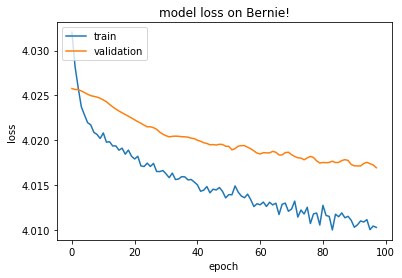

In [47]:
plot(era_models[100][1])

Get the validation set and predict for each sample which era model is the best to use

In [48]:
%%time
#Get validation set

XV = data.x[ data.region=='validation' ]
YV = data.y[:][data.region=='validation']

# which era model to use per sample
M = np.argmax( model_dense.predict( data.x[ data.region=='validation' ] ), axis=1 )

Wall time: 5.19 s


Compute predictions for all samples and eras in the validation set, due to vectorisation this is likely faster. Note that we are predicting all 5 target variables in one model!! 

In [86]:
%%time

# precompute predictions + losses for every example in the validation set for all eras
# seems inefficient but due to vectorization of prediction this is likely much faster
# seems to take about 6 seconds per era for 56084 signals in validation

num_val = XV.shape[0]
num_eras = len(era_models)
era_preds = np.zeros( (num_val, num_eras, 5 ) )

for era in range(num_eras):
    
    preds = era_models[era][0].predict( XV )
    
    era_preds[:, era] = preds
    
    print('computed era: %d' % era )
    

computed era: 0
computed era: 1
computed era: 2
computed era: 3
computed era: 4
computed era: 5
computed era: 6
computed era: 7
computed era: 8
computed era: 9
computed era: 10
computed era: 11
computed era: 12
computed era: 13
computed era: 14
computed era: 15
computed era: 16
computed era: 17
computed era: 18
computed era: 19
computed era: 20
computed era: 21
computed era: 22
computed era: 23
computed era: 24
computed era: 25
computed era: 26
computed era: 27
computed era: 29
computed era: 30
computed era: 31
computed era: 32
computed era: 33
computed era: 34
computed era: 35
computed era: 36
computed era: 37
computed era: 38
computed era: 39
computed era: 40
computed era: 41
computed era: 42
computed era: 43
computed era: 44
computed era: 45
computed era: 46
computed era: 47
computed era: 48
computed era: 49
computed era: 50
computed era: 51
computed era: 52
computed era: 53
computed era: 54
computed era: 55
computed era: 56
computed era: 57
computed era: 58
computed era: 59
compute

We now have a prediction for every era, for every sample, for every target 

In [88]:
era_preds.shape

(56084, 120, 5)

How do we perform on the validation set for our 5 target variables?

In [121]:
%%time

# which target label in 0..4
label = 3

best_preds = era_preds[ list(range(era_preds.shape[0])), list(M-1), label]

# calculate loss from the best PREDICTED era model
losses = log_loss( YV[:,label], best_preds )

print( losses )

0.7063133415776944
Wall time: 46 ms


The performance here is not that impressive... I would guess because the era prediction is not good enough. Let's see how good our score would have been if we used the best era model each time

The main concept here is that if we knew a priori which era was best and then predicted with the corresponding era model, we would perform way better. So let's run that thought experiment and use the best predictions from the best eras and lets visualise for the validation set which eras performed best. Note you can set the target variable to be 0..4

0.32844546055641816
Wall time: 473 ms


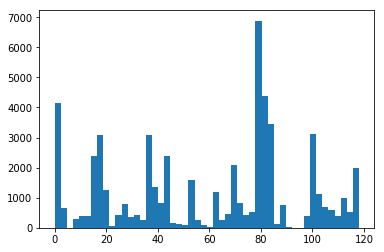

In [119]:
%%time

target = 4 # /in 0..4

# compute squared deviations
c = np.power( era_preds[:,:,target] - np.transpose( np.tile(YV[:,target], (120,1)) ), 2 )

# which ones are the lowest per example?
best_actual = np.argmin(sqlosses, axis=1)

best_preds_actual = era_preds[ list(range(era_preds.shape[0])), list(best_actual)]

# calculate loss from the best PREDICTED era model
losses = log_loss( YV[:,target], best_preds_actual[:,target] )

print( losses )

x=pyplot.hist(best_actual, bins=50)

Note; this shows that we can score exceptionally well if we know the best era model. This might not be saying anything though because when we plot all the predictions from the era models...

Wall time: 44 ms


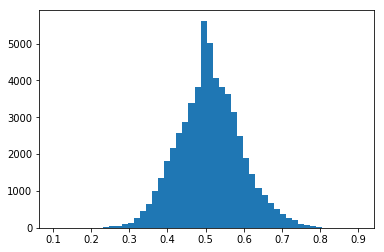

In [123]:
%%time

x=pyplot.hist(best_preds, bins=50)

We are getting a pretty random PDF anyway, but there is a bit of a bias here on positive labels. Note that this is for target 3 i.e. from above

Todo: 
* generate best preds for live dataset and submit to Numer.ai
* Come up with a better way of predicting which era model to use